<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке." data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке.</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменений-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Анализ-изменений-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменений концентрации металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Анализ-суммарной-концентрации-веществ" data-toc-modified-id="Анализ-суммарной-концентрации-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ суммарной концентрации веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение модели</a></span></li><li><span><a href="#Показатели-на-тестовой-выборке" data-toc-modified-id="Показатели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Показатели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Изучение данных

Импорт библиотек

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import  make_scorer
from scipy import stats as st
import warnings

from sklearn.multioutput import MultiOutputRegressor

from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import Pool, CatBoostRegressor, cv

Константы

In [115]:
RANDOM_ST = 12345

Скрытие предупреждений

In [116]:
pd.options.mode.chained_assignment = None

warnings.filterwarnings('ignore')

Прочитаем данные

In [117]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col = 0)
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col = 0)
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col = 0)

Сперва посмотрим на полный файл:

In [118]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

И он действительно полный, колонка даты и 85  заполненных колоноке цифр. Дата  была в неверном формате. Плюс она нужна была для заполнения пропусков - переоткрыла файлы с датой как индексом.

1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.
Описание данных
жащей руды.
Эффективность обогащения рассчитывается по формуле

Технологический процесс
Rougher feed — исходное сырье
Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
Xanthate **— ксантогенат (промотер, или активатор флотации);
Sulphate — сульфат (на данном производстве сульфид натрия);
Depressant — депрессант (силикат натрия).
Rougher process (англ. «грубый процесс») — флотация
Rougher tails — отвальные хвосты
Float banks — флотационная установка
Cleaner process — очистка
Rougher Au — черновой концентрат золота
Final Au — финальный концентрат золота
Параметры этапов
air amount — объём воздуха
fluid levels — уровень жидкости
feed size — размер гранул сырья
feed rate — скорость подачи
Наименование признаков
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag
Возможные значения для блока [этап]:
rougher — флотация
primary_cleaner — первичная очистка
secondary_cleaner — вторичная очистка
final — финальные характеристики
Возможные значения для блока [тип_параметра]:
input — параметры сырья
output — параметры продукта
state — параметры, характеризующие текущее состояние этапа
calculation — расчётные характеристики
Расчёт эффективности
Вам нужно смоделировать процесс восстановления золота из золотосодер

In [119]:
full_df.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


В колонке с датой - дата и время. Химики из фармацевтики говорили мне, что иногда на реакцию влияет даже фаза луны (по крайней мере иначе отличия в протекании не объяснить). Химики из золотообогащения - суровые люди, они явно собрали по часам.

In [120]:
full_df.isna().sum().head(43)

final.output.concentrate_ag                             1
final.output.concentrate_pb                             1
final.output.concentrate_sol                          211
final.output.concentrate_au                             0
final.output.recovery                                   0
final.output.tail_ag                                    1
final.output.tail_pb                                  101
final.output.tail_sol                                   6
final.output.tail_au                                    0
primary_cleaner.input.sulfate                          24
primary_cleaner.input.depressant                       37
primary_cleaner.input.feed_size                         0
primary_cleaner.input.xanthate                        104
primary_cleaner.output.concentrate_ag                   0
primary_cleaner.output.concentrate_pb                 116
primary_cleaner.output.concentrate_sol                370
primary_cleaner.output.concentrate_au                   0
primary_cleane

In [121]:
full_df.isna().sum().tail(43)

rougher.output.concentrate_ag                    0
rougher.output.concentrate_pb                    0
rougher.output.concentrate_sol                  23
rougher.output.concentrate_au                    0
rougher.output.recovery                          0
rougher.output.tail_ag                           1
rougher.output.tail_pb                           0
rougher.output.tail_sol                          0
rougher.output.tail_au                           0
rougher.state.floatbank10_a_air                  1
rougher.state.floatbank10_a_level                1
rougher.state.floatbank10_b_air                  1
rougher.state.floatbank10_b_level                1
rougher.state.floatbank10_c_air                  1
rougher.state.floatbank10_c_level                1
rougher.state.floatbank10_d_air                  0
rougher.state.floatbank10_d_level                0
rougher.state.floatbank10_e_air                436
rougher.state.floatbank10_e_level                0
rougher.state.floatbank10_f_air

Итак, у нас от 0 до 1605 пропусков в столбцах. Самая большая доля пропусков с втолбце secondary_cleaner.output.tail_sol.и

In [122]:
full_df['secondary_cleaner.output.tail_sol'].isna().sum()/full_df.shape[0]*100

8.992232110705284

Почти 9% пропусков... многовато. И встаёт извечный вопрос, удалять или заполнять. Ответим на него позже. Сперва посмотрим на 2 оставшихся датасета

In [123]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

И столбцов осталось 52, не все данные одинаково важны.

In [124]:
test_df.isna().sum().head(52)

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

В тестовой базе почти нет пропусков. Часть данных потерялась до разбиения.

И тренировочная база (атлеты-аналитики, собраться!)

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [126]:
train_df.isna().sum().head(43)

final.output.concentrate_ag                             1
final.output.concentrate_pb                             1
final.output.concentrate_sol                          211
final.output.concentrate_au                             0
final.output.recovery                                   0
final.output.tail_ag                                    0
final.output.tail_pb                                  100
final.output.tail_sol                                   5
final.output.tail_au                                    0
primary_cleaner.input.sulfate                          20
primary_cleaner.input.depressant                       32
primary_cleaner.input.feed_size                         0
primary_cleaner.input.xanthate                        100
primary_cleaner.output.concentrate_ag                   0
primary_cleaner.output.concentrate_pb                  86
primary_cleaner.output.concentrate_sol                286
primary_cleaner.output.concentrate_au                   0
primary_cleane

In [127]:
train_df.isna().sum().tail(43)

rougher.output.concentrate_ag                    0
rougher.output.concentrate_pb                    0
rougher.output.concentrate_sol                  22
rougher.output.concentrate_au                    0
rougher.output.recovery                          0
rougher.output.tail_ag                           1
rougher.output.tail_pb                           0
rougher.output.tail_sol                          0
rougher.output.tail_au                           0
rougher.state.floatbank10_a_air                  1
rougher.state.floatbank10_a_level                1
rougher.state.floatbank10_b_air                  1
rougher.state.floatbank10_b_level                1
rougher.state.floatbank10_c_air                  1
rougher.state.floatbank10_c_level                1
rougher.state.floatbank10_d_air                  0
rougher.state.floatbank10_d_level                0
rougher.state.floatbank10_e_air                436
rougher.state.floatbank10_e_level                0
rougher.state.floatbank10_f_air

Сперва приведем в порядок столбцы -  оставим лишь те, что есть в тестовой выборке test_df, Но сначала посмотрим, что будем выбрасывать.

### Анализ признаков, недоступных в тестовой выборке. 

In [128]:
droplist_train_df = set(train_df.columns).difference(set(test_df.columns))

In [129]:
droplist_train_df

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Мы видим, что в перечень попали выходные данные по процессам: 

расчетные признаки
флотация, калькуляция коэффициента соотношения au pb; 
флотация, калькуляция сульфид в золото гранулы, установка 10; 
флотация, калькуляция сульфид в золото гранулы, установка 11; 
флотация, калькуляция сульфид в золото гранулы; 
флотация, характеристики концентрации выходного продукта (ag, au, pb, sol); 
флотация, характеристики параметров выходного продукта (ag, au, pb, sol); 
характеристики концентрации продукта первичной очистки (ag, au, pb, sol); 
характеристики параметров продукта первичной очистки (ag, au, pb, sol); 
вторичная очистка, характеристики параметров выходного продукта (ag, au, pb, sol); 

финальные характеристики концентрации выходного продукта (ag, au, pb, sol); 
финальные характеристики параметров выходного продукта (ag, au, pb, sol); 

И два наших целевых показателя: 
rougher.output.recovery'
final.output.recovery



Видимо, на этапе прогнозирования все эти параметры не доступны. Можно подбирать только  входные параметры сырья, реагентов и параметры этапов. 

**Вернемся к удалению столбцов**

<div class="alert alert-info"> <b>2 Комментарий студента:</b> Здесь я меняю порядок удаления столбцов - я их выкидывала по списку, теперь просто устанавливаю точно как  в тесте</div>

In [130]:
columns_test =  test_df.columns
train_df_features = train_df[columns_test]

In [131]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14129 non-null  float64
 1   primary_cleaner.input.depressant            14117 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14049 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14148 non-nu

In [132]:
(train_df_features.columns == test_df.columns).all()


True

In [134]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14129 non-null  float64
 1   primary_cleaner.input.depressant            14117 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14049 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14145 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14148 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14147 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14148 non-nu

Тренировочная база сокращена по столбцам. А что с пропусками?

In [135]:
train_df.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

Лучше, конечно, тысячные пропуски ушли. Но вообще, конечно, пропуске в столбцах input - это возмутительно, что у них там с лабораторной дисциплиной? Запросить мы не сможем, принимаем решение заполнять. Сперва займёмся полным датафреймом, поскольку именно в нём строки идут в хронологическом порядке, а в остальных - выборочно. У нас в тексте задания есть подсказка - "Соседние по времени параметры часто похожи". Используем для заполнения метод fillna() 'ffill', который заполнит пропуск предыдущим значением.

In [136]:
full_df = full_df.fillna(axis = 0, method="ffill")

In [137]:
full_df.isna().sum().sum()   #.sort_values()

0

Теперь займёмся тренировочной базой:

In [138]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [139]:
train_df.isna().sum().sum()

4100

Пропусков стало меньше. 

Список столбцов с пропусками готов, заполняем по нужным столбцам:

In [140]:
train_df_features = full_df.loc[train_df.index, columns_test]
train_df = full_df.loc[train_df.index, set(train_df.columns)] # Полный обучающий датасет тоже заполним - нам ещё считать эффективность


In [141]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               14149 non-null  float64
 1   primary_cleaner.input.depressant            14149 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.xanthate              14149 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    14149 non-nu

In [142]:
train_df_features.isna().sum().sum()

0

In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.state.floatbank8_c_level            14149 non-null  float64
 1   secondary_cleaner.state.floatbank5_b_level          14149 non-null  float64
 2   secondary_cleaner.state.floatbank2_a_air            14149 non-null  float64
 3   rougher.input.feed_rate                             14149 non-null  float64
 4   secondary_cleaner.state.floatbank4_a_air            14149 non-null  float64
 5   rougher.input.feed_pb                               14149 non-null  float64
 6   rougher.output.tail_ag                              14149 non-null  float64
 7   rougher.input.floatbank11_xanthate                  14149 non-null  float64
 8   rougher.state.floatbank10_d_level                

Теперь по тестовой базе:

In [144]:
test_df_features = full_df.loc[test_df.index, columns_test]
test_df = full_df.loc[test_df.index, columns_test] # Полный тестовый датасет тоже заполним - нам ещё считать эффективность


In [145]:
test_df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [146]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

Отлично, пропусков больше нет, проверим эффективность обогащения.

### Проверка расчета эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. 

Эффективность обогащения рассчитывается по формуле

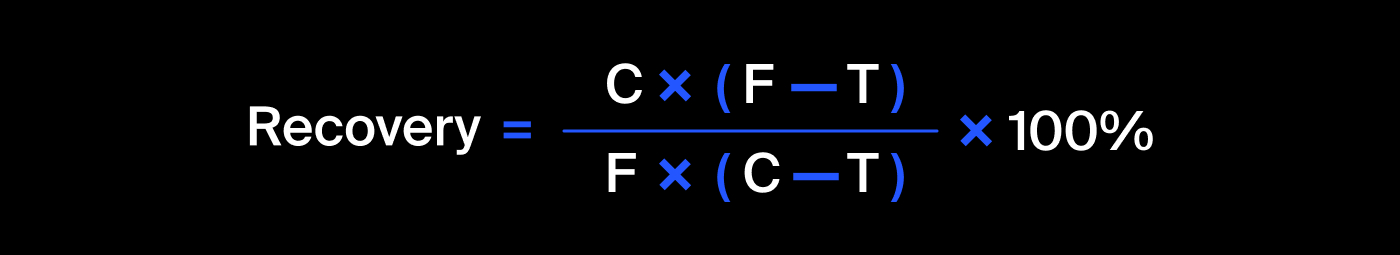

где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

И мы сталкиваемся с тем, что входной концентрации золота у нас нет. Есть только rougher.input.feed_au

F-rougher.input.feed_au
С-rougher.output.concentrate_au
T-rougher.output.tail_au


In [147]:
train_df['rougher.input.feed_au'].describe()

count    14149.000000
mean         7.866577
std          1.919506
min          0.010000
25%          6.596217
50%          7.649138
75%          9.066976
max         13.126043
Name: rougher.input.feed_au, dtype: float64

In [148]:
train_df['rougher.output.concentrate_au'].describe()

count    14149.000000
mean        19.439958
std          3.765192
min          0.000000
25%         18.432161
50%         19.947312
75%         21.392714
max         28.146838
Name: rougher.output.concentrate_au, dtype: float64

In [149]:
train_df['rougher.output.tail_au'].describe()

count    14149.000000
mean         1.757473
std          0.713187
min          0.020676
25%          1.310800
50%          1.745513
75%          2.186790
max          9.688980
Name: rougher.output.tail_au, dtype: float64

Концентрация выражается в долях и процентах. Судя по всему, здесь у нас процентное содержание.

In [150]:
def rougher_recovery_calculation(row):
    rougher_recovery = (row['rougher.output.concentrate_au'] * 
             (row['rougher.input.feed_au'] - row['rougher.output.tail_au'] ) / 
             (row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])
             )) * 100
    return rougher_recovery

In [151]:
train_df['rougher_recovery'] = train_df.apply(rougher_recovery_calculation, axis=1)
train_df['rougher_recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher_recovery, dtype: float64

И у нас выбивающийся минимум. Он отрицательный - значит, у нас есть экстремумы по отвальным концентрациям.

Попробуем их отрезать

In [152]:
train_df['rougher_au_differences_input'] = train_df['rougher.input.feed_au'] - train_df['rougher.output.tail_au']

In [153]:
train_df['rougher_au_differences_output'] = train_df['final.output.concentrate_au'] - train_df['rougher.output.tail_au']

In [154]:
train_df['rougher_au_differences_input'].describe()

count    14149.000000
mean         6.109104
std          1.789698
min         -3.300565
25%          4.863762
50%          5.846227
75%          7.297777
max         11.575835
Name: rougher_au_differences_input, dtype: float64

In [155]:
train_df['rougher_au_differences_output'].describe()

count    14149.000000
mean        42.246318
std          5.081442
min         -8.783082
25%         41.333543
50%         43.116547
75%         44.614924
max         52.447438
Name: rougher_au_differences_output, dtype: float64

Ну... не такие уж и экстремумы. Может же быть, что процент золота в отвале меньше, чем в выходе? Запросто. Ситуация нежелательная, но возможная вполне. Как раз чтобы избежать их в будущем мы и ведём наши изыскания. Тогда отправляемся за МАЕ

In [156]:
mean_absolute_error(train_df['rougher.output.recovery'], train_df['rougher_recovery'])

9.745418284091104e-15

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5343f53940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5343f89700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5343f53e50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5343f89910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5343f891c0>,
 'means': []}

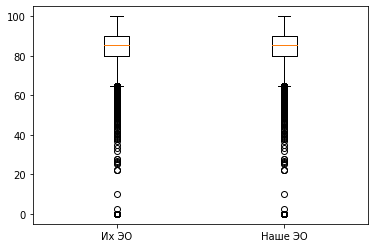

In [157]:
plt.boxplot([train_df['rougher.output.recovery'], train_df['rougher_recovery']], labels=['Их ЭО','Наше ЭО'])#.set_title('Эффективность обогащения')


Всё-таки подозрительно выглядит, явный выброс. По-правильному - нужно разбираться в причинах. Но мы сегодня неправильные аналитики и сделаем неправильный мёд - мы отбросим экстремальные значения.

<div class="alert alert-info"> <b>Комментарий студента:</b> И выглядит теперь сопоставимо! </div>

In [158]:
train_df['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [159]:
train_df['rougher_recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher_recovery, dtype: float64

In [160]:
#train_df = train_df[train_df['rougher_recovery'] > 0]

И снова сравним

In [161]:
train_df['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [162]:
train_df['rougher_recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher_recovery, dtype: float64

Ещё раз найдём MAE между нашими расчётами и значением признака

In [163]:
mean_absolute_error(train_df['rougher.output.recovery'], train_df['rougher_recovery'])

9.745418284091104e-15

И посмотрим на график, поскольку будет другой масштаб:

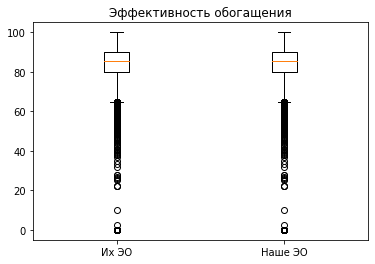

In [164]:
plt.boxplot([train_df['rougher.output.recovery'], train_df['rougher_recovery']], labels=['Их ЭО','Наше ЭО'])
plt.title('Эффективность обогащения')
plt.show()

Вывод: наш расчет МАЕ показывает близкие, но далеко не идентичные значения эффективности обогащения после флотации. В реальности нужно особенно пристрастно изучить выбросы - данные, где золота в отвале больше, чем золота в продукте. Мы видим, что наша расчетная величина хоть и близка, но явно ниже, чем считают те, кто представил данные.

Перезапишем наши признаки по новым индексам test_df

In [165]:
test_df_features = test_df_features.loc[test_df.index]

и приступаем к аналитической части.

## Анализ данных

###  Анализ изменений концентрации металлов (Au, Ag, Pb) на различных этапах очистки. 

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

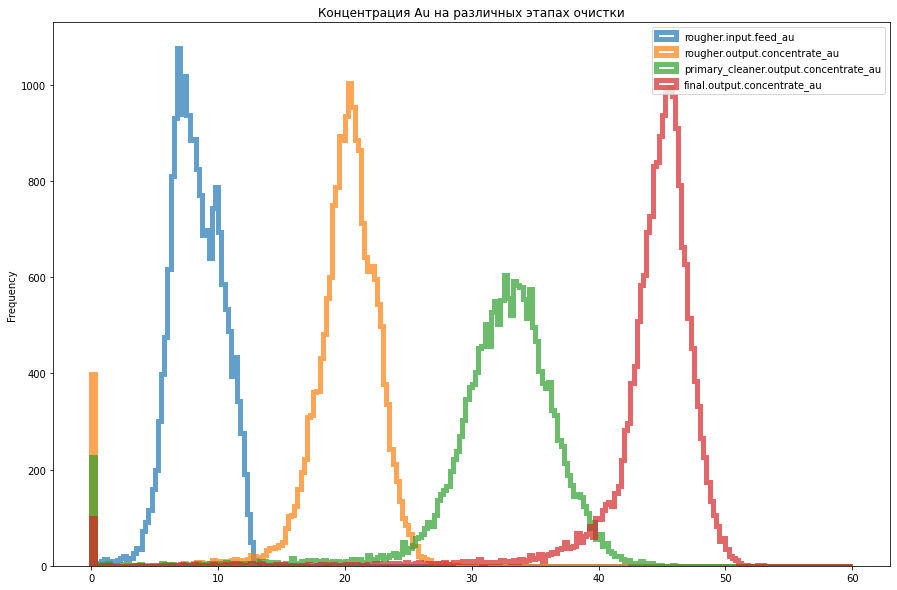

In [166]:
full_df[['rougher.input.feed_au', 'rougher.output.concentrate_au' ,  'primary_cleaner.output.concentrate_au', 
                 'final.output.concentrate_au']].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 60),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 10))
plt.title('Концентрация Au на различных этапах очистки')
plt.show()

Итак, мы видим на гистограмме распределения концентраций золота на четырех этапах (до флотации, после флотации, после первой очистки и в финальном продукте). Они выглядят как четыре шага. Явно видно нормальное распределение частоты величин. С каждым шагом концентрация становится выше. До флотации среднее около 8, после - около 20, после первой очистки - примерно 33, после финальной стадии -  45. Как нам пояснили, на стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости). Посмотрим на числовые значения и проверим наши выводы на цифрах.

In [167]:
full_df[['rougher.input.feed_au', 'rougher.output.concentrate_au' ,  'primary_cleaner.output.concentrate_au', 
                 'final.output.concentrate_au']].describe()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


Да, цифры обращают внимание ещё и на разброс, заметный на графике - два узких пика до и после флотации и более размазанный - после первой очистки - разброс 1.9, 3.75, и 5.6 соответственно. Значит ли это, что очистка "дотягивает" даже пульпу с показателями ниже среднего до почти среднего и она эффективна? или наоборот более обогащенная смесь становится середнячком? Посмотрим ради интереса на хвосты.

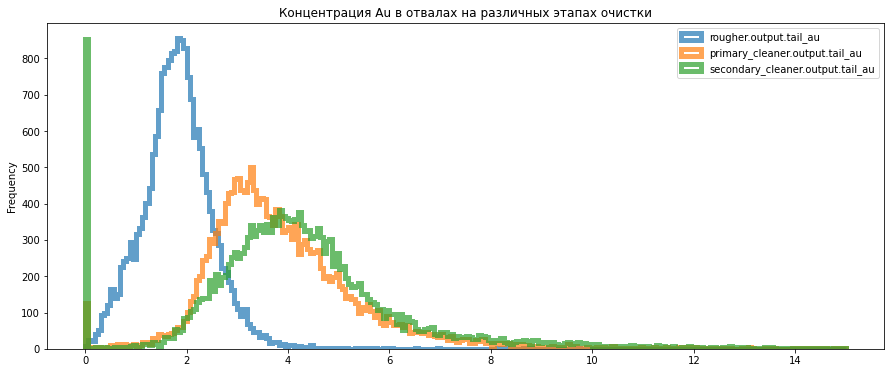

In [168]:
full_df[['rougher.output.tail_au' , 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au' ]].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 15),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 6))
plt.title('Концентрация Au в отвалах на различных этапах очистки')
plt.show()

In [169]:
full_df[['rougher.output.tail_au' , 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au' ]].describe()

,rougher.output.tail_au,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au
count,19439.000000,19439.000000,19439.000000
mean,1.816391,3.914179,4.339625
std,0.680046,1.593034,2.326751
min,0.020676,0.000000,0.000000
25%,1.404207,2.924844,3.182770
50%,1.808170,3.623234,4.072412
75%,2.211861,4.585705,5.063081
max,9.688980,17.788925,26.811643


Снова три шага, три пика с нормальным распределением.И снова с  каждым шагом концентрация становится выше. После флотации среднее около 2, после первой очистки - около 4, после второй очистки - примерно 5. Да у нас в первоначальной руде первый квантиль до 6,85. Мы выливаем младенца вместе с водой, ох, не хватало DS золотодобычи (надеюсь, есть и повторные циклы и Цифра давно решила эту проблему).

Перейдём к серебру:

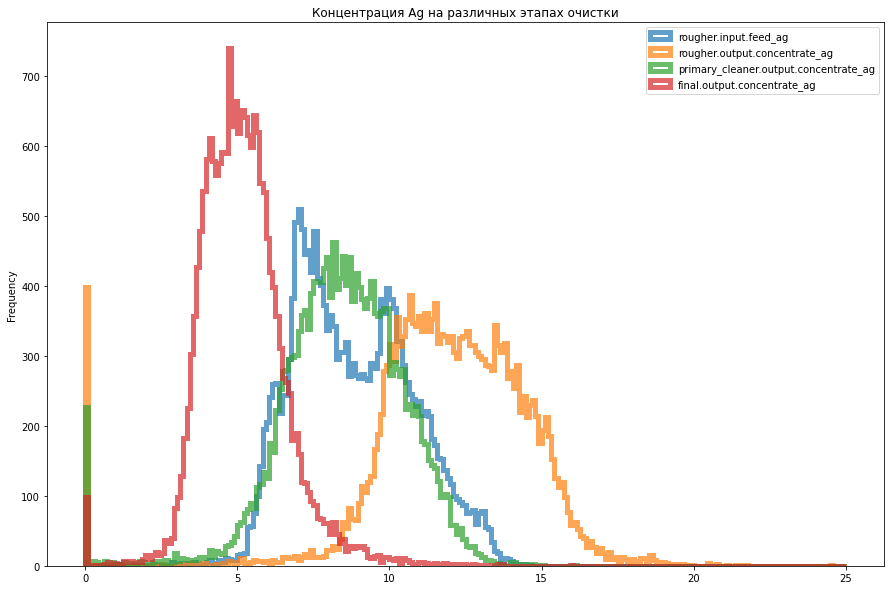

In [170]:
full_df[['rougher.input.feed_ag', 'rougher.output.concentrate_ag' ,  'primary_cleaner.output.concentrate_ag',
                 'final.output.concentrate_ag']].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 25),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 10))
plt.title('Концентрация Ag на различных этапах очистки')
plt.show()

In [171]:
full_df[['rougher.input.feed_ag', 'rougher.output.concentrate_ag' ,  'primary_cleaner.output.concentrate_ag',
                 'final.output.concentrate_ag']].describe()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.794927,11.994759,8.442408,5.168387
std,1.936847,2.733862,2.054465,1.372362
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251000
50%,8.593574,12.098115,8.507298,5.066039
75%,10.213771,13.736996,9.809001,5.895401
max,14.596026,24.480271,16.081632,16.001945


На гистограмме распределение концентраций серебра. По графику можно также увидеть четыре близких к нормальному распределения. В отличие от золота - есть пик на нулевых значениях. С каждым шагом концентрация становится выше, но опять есть отличие от золота - концентрация серебра до и после флотации почти совпадают, если смотреть на график,  и после первой очистки немного растет а по цифрам - до флотации среднее около 8.8, после - около 12, после первой очистки - снова снижается до 8.4, а в финальном концентрате среднее 5.2!!!. Мы обогащали - и потеряли серебро! Может быть, правда, это побочный продукт, а в приоритете - золото, всё-таки его цена за тройскую унцию куда выше, настолько выше, что потерей 3 процентов серебра можно пренебречь - или вернуться к этому позже, поработав по хвостам:

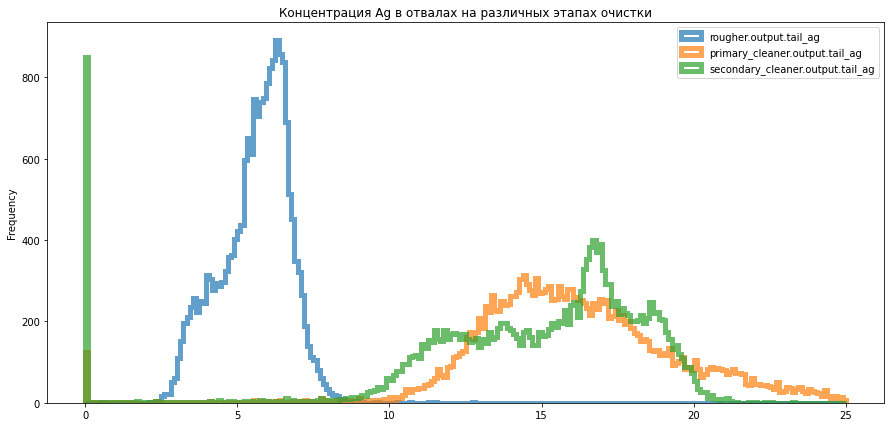

In [172]:
full_df[['rougher.output.tail_ag' , 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag' ]].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 25),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 7))
plt.title('Концентрация Ag в отвалах на различных этапах очистки')
plt.show()

Даааа, вот и наше серебронашлось - обогащенный концентрат готов!

In [173]:
full_df[['rougher.output.tail_ag' , 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag']].describe()

,rougher.output.tail_ag,primary_cleaner.output.tail_ag,secondary_cleaner.output.tail_ag
count,19439.000000,19439.000000,19439.000000
mean,5.589064,16.145888,14.586720
std,1.111318,3.548485,4.264998
min,0.594562,0.000000,0.000000
25%,4.889934,14.017185,12.640359
50%,5.765829,15.842836,15.640668
75%,6.389399,18.014169,17.358101
max,12.719177,29.459575,23.264738


После первой очистки средняя концентрация вырастает до 16, после второй несного падает, но это всё ещё приличные 14.6%.
И, наконец, свинец:

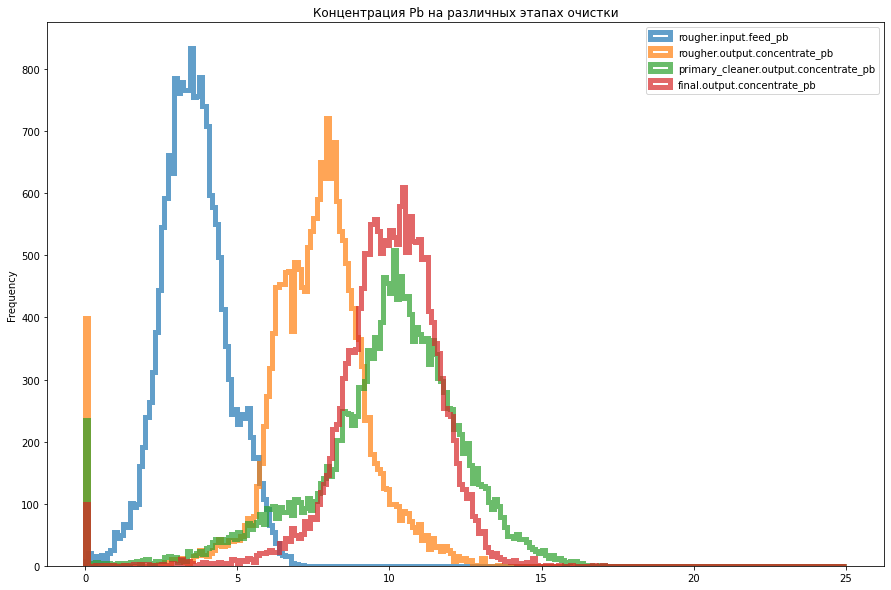

In [174]:
full_df[['rougher.input.feed_pb', 'rougher.output.concentrate_pb' ,  'primary_cleaner.output.concentrate_pb',
                 'final.output.concentrate_pb']].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 25),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 10))
plt.title('Концентрация Pb на различных этапах очистки')
plt.show()

In [175]:
full_df[['rougher.input.feed_pb', 'rougher.output.concentrate_pb' ,  'primary_cleaner.output.concentrate_pb',
                 'final.output.concentrate_pb']].describe()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,3.585096,7.606272,9.810317,9.978821
std,1.062972,1.796757,2.572253,1.669228
min,0.010000,0.000000,0.000000,0.000000
25%,2.872178,6.725987,8.676500,9.137225
50%,3.528235,7.742580,10.142270,10.102264
75%,4.241005,8.565199,11.416298,11.035644
max,7.142594,13.617072,17.081278,17.031899


На гистограмме распределение концентраций свинца опять похоже на нормальное распределение. До флотации среднее около 4 (в два раза меньше, чем золота, но всё-таки много), после - 7.6 (напомню, золота стало 20), после первой очистки - примерно 9.8, после финальной стадии -  9.97. С каждым шагом концентрация становится выше, но незначительно. Для порядка посмотрим хвосты

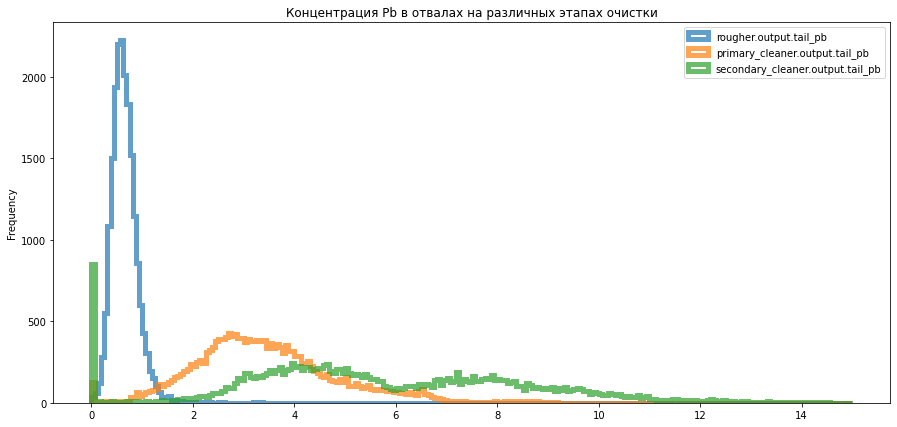

In [176]:
full_df[['rougher.output.tail_pb' , 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_pb' ]].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 15),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 7))
plt.title('Концентрация Pb в отвалах на различных этапах очистки')
plt.show()

In [177]:
full_df[['rougher.output.tail_pb' , 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_pb']].describe()

,rougher.output.tail_pb,primary_cleaner.output.tail_pb,secondary_cleaner.output.tail_pb
count,19439.000000,19439.000000,19439.000000
mean,0.645782,3.433558,5.776428
std,0.251526,1.393875,2.774913
min,0.007566,0.000000,0.000000
25%,0.477728,2.503417,3.863993
50%,0.617465,3.269958,5.343407
75%,0.778271,4.180490,7.787610
max,3.778064,9.634565,17.042505


Свинца в отвалах не так много, как серебра, но больше, чем в первоначальной смеси. Ну что же, может быть, и до него дойтёт. Но мотом.

По гистограммам распределения концентрации металлов на различных этапах очистки можно увидеть, что больше всего растёт концентрация золота, явно именно она является основной целью. Серебра много в побочных продуктах -хвостах каждого передела, а его концентрация к финальному продукту снижается. Свинец контролируют, но он явно не в приоритете.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

 Если распределение размеров гранул сырья в выборках сильно отличается друг от друга, оценка модели будет неправильной. Наша нулевая гипотеза - среднее распределение размеров гранул сырья на обучающей и тестовой выборках одинаково.

Сравним наши выборки для того, чтобы понять как отличается их среднее и является ли это случайностью. Выборки достаточно большие для проведения статистического теста на равенство среднего совокупности некоторому числу. В нулевой гипотезе мы предполагаем равенство сравниваемых средних двух совокупностей, то есть что средние распределения размеров гранул сырья на обучающей и тестовой выборках равны. Выбираем двустороннюю альтернативную гипотезу, так как мы не знаем, увеличится или уменьшится среднее. 
Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind. Так как выборки у нас разного размера и дисперсии у совокупностей не одинаковые (см. ниже), при проверке гипотезы t-тестом установим параметр equal_var как False, чтобы тест посчитал дисперсии выборок по отдельности.

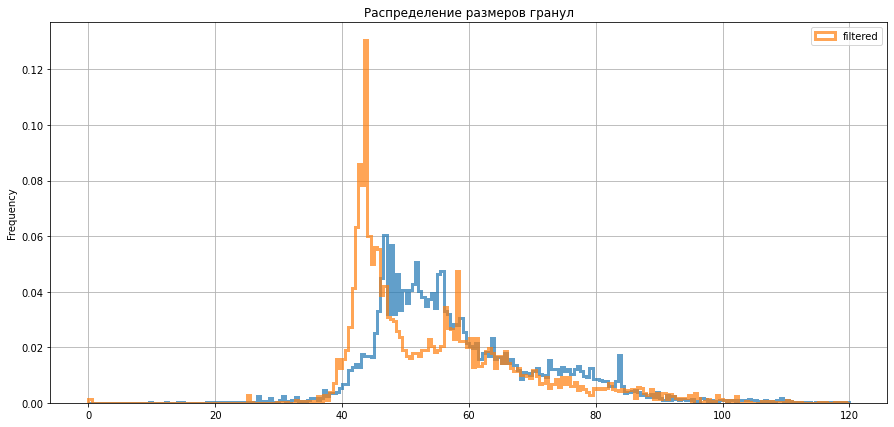

In [178]:
ax = train_df['rougher.input.feed_size'].plot(
    kind='hist',
    histtype='step',
    range=(0, 120),
    bins=240,
    linewidth=3,
    alpha=0.7,
    label='raw',
    density=True,

    figsize = (15, 7))
test_df['rougher.input.feed_size'].plot(
    kind='hist',
    histtype='step',
    range=(0, 120),
    bins=240,
    linewidth=3,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    density=True,
    legend=True,
)
plt.title('Распределение размеров гранул')
plt.show()

In [179]:
train_df['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [180]:
test_df['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [181]:
alpha = .05 # критический уровень статистической значимости для немедицинских совокупностей
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    train_df['rougher.input.feed_size'], 
    test_df['rougher.input.feed_size'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.134338776805464e-39
Отвергаем нулевую гипотезу


p-значение: 3.134338776805464e-39, что равно 0.003134, отвергаем нулевую гипотезу. Средние наших совокупностей не равны. Собственно, так как массивы небольшие, мы подсчитали среднее раньше в таблице выше: обучающая выборка - 60.2, тестовая - 55.9.

Но, может быть, ситуация стала лучше после флотации? Проверим:

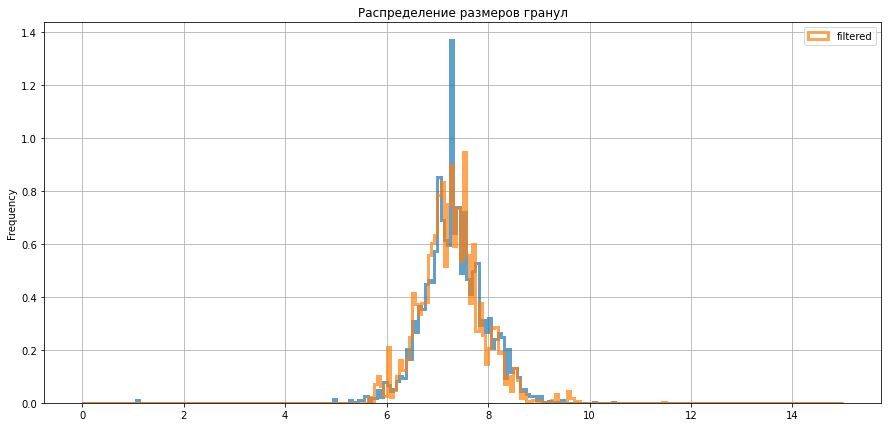

In [182]:
ax = train_df['primary_cleaner.input.feed_size'].plot(
    kind='hist',
    histtype='step',
    range=(0, 15),
    bins=240,
    linewidth=3,
    alpha=0.7,
    label='raw',
    density=True,

    figsize = (15, 7))
test_df['primary_cleaner.input.feed_size'].plot(
    kind='hist',
    histtype='step',
    range=(0, 15),
    bins=240,
    linewidth=3,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    density=True,
    legend=True,
)
plt.title('Распределение размеров гранул')
plt.show()

In [183]:
train_df['primary_cleaner.input.feed_size'].describe()

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [184]:
test_df['primary_cleaner.input.feed_size'].describe()

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

Вы только посмотрите, Т - значит Технология! Размер частич стал более однородным, нам больше не нужно строить график от 0 до 120  - достаточно до 15. Средние очень близки. Проверим нашу гипотезу. Параметр equal_var установим как True,так как дисперсии близки по значению.

In [185]:
results = st.ttest_ind(
    train_df['primary_cleaner.input.feed_size'], 
    test_df['primary_cleaner.input.feed_size'],
    equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4864182925957636e-08
Отвергаем нулевую гипотезу


Визуально - всё прекрасно и можно сравнивать, но статистика неумолима, только с вероятностью 0.0000000137* наши средние совпадут. Отвергаем нулевую гипотезу.

Вывод: нам нельзя сравнивать эти две совокупности, данные будут нерелевантными, обучение модели и предсказание - бессмысленными.

*0.0000000089 после пересчета

### Анализ суммарной концентрации веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого вычислим сумму концентраций наших составляющих: Au, Ag, Pb и Sol. Для начала - перед флотацией


In [186]:
train_df['rougher_input_total'] = (train_df['rougher.input.feed_ag'] + train_df['rougher.input.feed_pb'] 
                                + train_df['rougher.input.feed_sol'] + train_df['rougher.input.feed_au'])
train_df['rougher_input_total'].describe()



count    14149.000000
mean        56.242170
std          7.029808
min          0.040000
25%         52.573579
50%         56.627635
75%         60.763234
max         74.458253
Name: rougher_input_total, dtype: float64

И у нас есть значения, близкие к 0. Превышающих 100% нет. Посмотрим, много ли их:

In [187]:
train_df[train_df['rougher_input_total'] < 1]['rougher_input_total'].count()

5

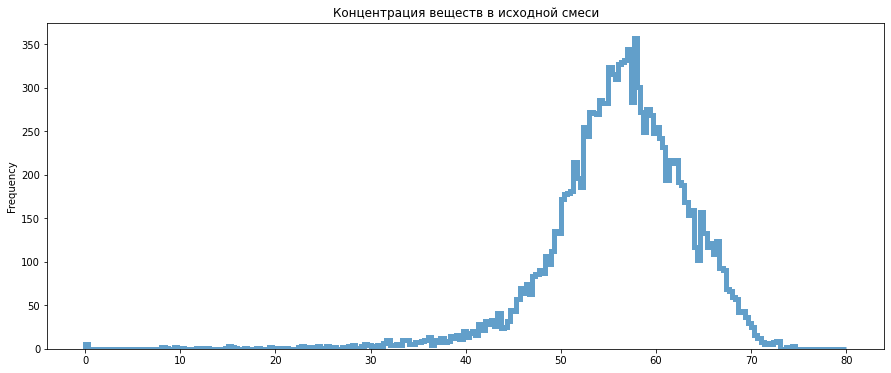

In [188]:
train_df['rougher_input_total'].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 80),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 6))
plt.title('Концентрация веществ в исходной смеси')
plt.show()

Всего пять значений, да и на гистограмме они не выбиваются. Оставляем без изменений.
Проверим выход после флотации

In [189]:
train_df['rougher_output_total'] = (train_df['rougher.output.concentrate_ag'] + train_df['rougher.output.concentrate_pb'] 
                                + train_df['rougher.output.concentrate_sol'] + train_df['rougher.output.concentrate_au'])
train_df['rougher_output_total'].describe()


count    14149.000000
mean        67.173145
std         12.713129
min          0.000000
25%         64.914390
50%         69.175663
75%         73.429261
max         88.140119
Name: rougher_output_total, dtype: float64

In [190]:
train_df[train_df['rougher_output_total'] < 1]['rougher_output_total'].count()

302

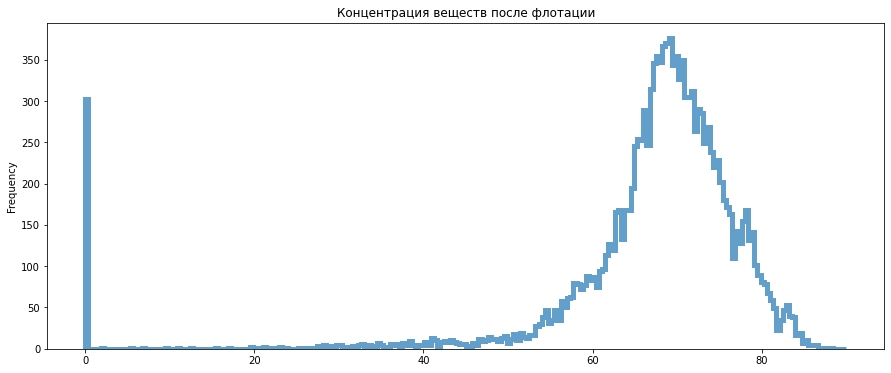

In [191]:
train_df['rougher_output_total'].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 90),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 6))
plt.title('Концентрация веществ после флотации')
plt.show()

А вот тут уже пик. Опять - таки нужно разбираться в причинах возникновения, но полностью нулевые значения без ошибки - маловероятны. Возможно, сбой замеров иди их записи в систему. Принимаем решение очистить такие значения.

In [192]:
train_df[train_df['rougher_output_total'] < 1]['rougher_output_total'].value_counts()

0.00    297
0.04      5
Name: rougher_output_total, dtype: int64

Наши 5 значений 0.04 по-прежнему с нами, а вот полностью нулевые - фильтруем.

In [193]:
train_df = train_df[train_df['rougher_output_total'] > 0]

Проверяем следующий этап - выход после первичной очистки:

In [194]:
train_df['primary_cleaner_output_total'] = (train_df['primary_cleaner.output.concentrate_ag'] + train_df['primary_cleaner.output.concentrate_pb'] 
                                + train_df['primary_cleaner.output.concentrate_sol'] + train_df['primary_cleaner.output.concentrate_au'])
train_df['primary_cleaner_output_total'].describe()


count    13852.000000
mean        60.091546
std         10.425384
min          0.000000
25%         58.019068
50%         61.715732
75%         65.293815
max         76.918076
Name: primary_cleaner_output_total, dtype: float64

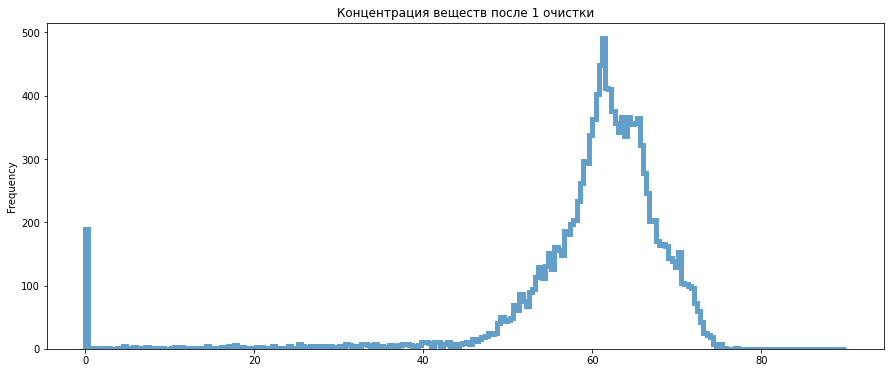

In [195]:
train_df['primary_cleaner_output_total'].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 90),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 6))
plt.title('Концентрация веществ после 1 очистки')
plt.show()

In [196]:
train_df[train_df['primary_cleaner_output_total'] < 1]['primary_cleaner_output_total'].count()

191

In [197]:
train_df[train_df['primary_cleaner_output_total'] < 1]['primary_cleaner_output_total'].value_counts()

0.040000    117
0.000000     71
0.113023      1
0.282661      1
0.774000      1
Name: primary_cleaner_output_total, dtype: int64

71 дополнительный ноль. фильтруем

In [198]:
train_df = train_df[train_df['primary_cleaner_output_total'] > 0]

И последняя итерация - концентрация после финальной очистки:

In [199]:
train_df['final_output_total'] = (train_df['final.output.concentrate_ag'] + train_df['final.output.concentrate_pb'] 
                                + train_df['final.output.concentrate_sol'] + train_df['final.output.concentrate_au'])
train_df['final_output_total'].describe()


count    13781.000000
mean        68.399022
std          6.926748
min          0.000000
25%         67.546452
50%         69.127140
75%         70.943138
max         80.210644
Name: final_output_total, dtype: float64

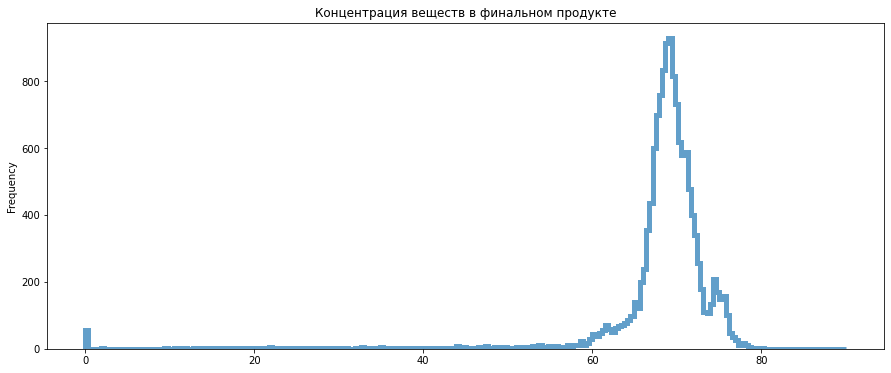

In [200]:
train_df['final_output_total'].plot( 
    kind='hist',
#    y='time_spent',
    histtype='step',
    range=(0, 90),
    bins=240,
    linewidth=5,
    alpha=0.7,
    label='raw',

    figsize = (15, 6))
plt.title('Концентрация веществ в финальном продукте')
plt.show()

и снова маленький всплеск нулей.

In [201]:
train_df = train_df[train_df['final_output_total'] > 0]

А давайте-ка еще раз проверим средние после удаления выбросов!

In [203]:
results = st.ttest_ind(
    train_df['primary_cleaner.input.feed_size'], 
    test_df['primary_cleaner.input.feed_size'],
    equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  6.574388038633315e-09
Отвергаем нулевую гипотезу


Нет, лучше не стало. В реальности нужно сделать переразбиение обучающей выборки и теста, чтобы была соответствующая стратификация размера гранул. В нашем проекте - отправляемся на следующий уровень - обучать модель

## Модель

Подготовим данные и целевые признаки для обучения модели.

Для прогноза коэффициента эффективности обогащения (ЭО) нам  нужно найти долю золота в концентратах и хвостах. Поэтому мы создадим 2 целевых признака. 
эффективность обогащения чернового концентрата rougher.output.recovery;
эффективность обогащения финального концентрата final.output.recovery.


In [204]:
train_df_features = train_df_features.loc[train_df.index]


In [205]:
train_target_both = full_df.loc[train_df.index, ['rougher.output.recovery', 'final.output.recovery']]
train_target_final = full_df.loc[train_df.index, 'final.output.recovery']

test_target_both = full_df.loc[test_df.index, ['rougher.output.recovery', 'final.output.recovery']]
test_target_final = full_df.loc[test_df.index, 'final.output.recovery']


In [206]:
train_df_features = train_df_features.reset_index(drop=True)
test_df_features = test_df_features.reset_index(drop=True)
train_target_both = train_target_both.reset_index(drop=True)
test_target_both = test_target_both.reset_index(drop=True)

ПРоверим, сохранились ли колонки у тренировочной базы

In [207]:
train_df_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [208]:
train_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13725 non-null  float64
 1   primary_cleaner.input.depressant            13725 non-null  float64
 2   primary_cleaner.input.feed_size             13725 non-null  float64
 3   primary_cleaner.input.xanthate              13725 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13725 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13725 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13725 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13725 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13725 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13725 non-null  float64
 10  primary_cl

In [209]:
test_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5290 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null   float64
 10  primary_clea

In [210]:
(train_df_features.columns == test_df_features.columns).all()

True

In [211]:
column_features = np.column_stack((np.array(train_df_features.columns), np.array(test_df_features.columns)))
pd.DataFrame(column_features,columns = ('train', 'test'))

,train,test
0,primary_cleaner.input.sulfate,primary_cleaner.input.sulfate
1,primary_cleaner.input.depressant,primary_cleaner.input.depressant
2,primary_cleaner.input.feed_size,primary_cleaner.input.feed_size
3,primary_cleaner.input.xanthate,primary_cleaner.input.xanthate
4,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_air
5,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_a_level
6,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_air
7,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_b_level
8,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_air
9,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_c_level


In [212]:
#sns.pairplot(train_df, hue="final.output.recovery")

In [213]:
#train_df.corr()
train_target_both.corr()

,rougher.output.recovery,final.output.recovery
rougher.output.recovery,1.00000,0.61419
final.output.recovery,0.61419,1.00000


In [214]:
test_target_both.corr()

,rougher.output.recovery,final.output.recovery
rougher.output.recovery,1.000000,0.305622
final.output.recovery,0.305622,1.000000


Между показателями эффективности обогащения флотации и финальным - сильная прямая корреляция. Как идея - использовать конечный показатель с бОльшим весом для обучения, посмотрим на эффективность далее.

Метрика качества

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.
Метрика sMAPE вычисляется так:

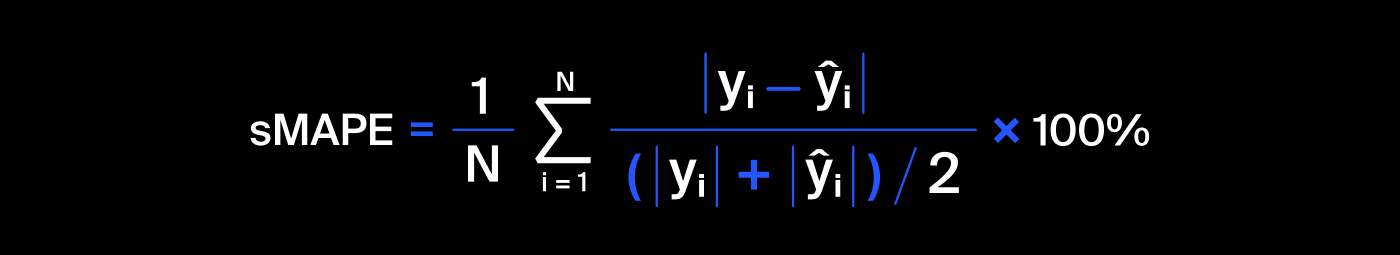

Мы суммируем и находим среднее значений выражения, где в числителе модуль разности целевого признака и  значения предсказания, а в знаменателе -их среднее. 

Нужно спрогнозировать сразу две величины:
эффективность обогащения чернового концентрата rougher.output.recovery;
эффективность обогащения финального концентрата final.output.recovery.
Итоговая метрика складывается из двух величин:

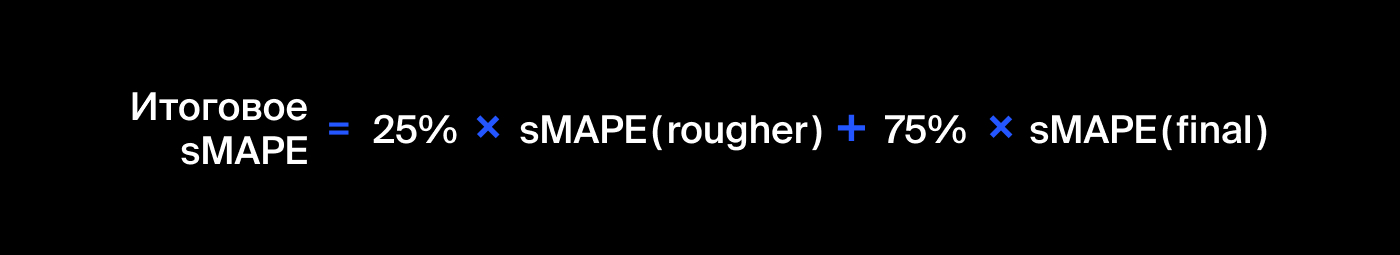

### Функция для вычисления sMAPE

Создадим функцию для вычисления нашего особого показателя качества - sMAPE

In [215]:
def smape_2 ( target, predictions): 
 

    predictions =  pd.DataFrame(data = predictions, columns = ['rougher.output.recovery', "final.output.recovery"])
    predictions = predictions.reset_index(drop=True)
    
    target = target.reset_index(drop=True)
    
    predictions = predictions[(predictions['rougher.output.recovery'] + predictions["final.output.recovery"]) > 0]
    target = target.loc[predictions.index]
    N =  predictions['rougher.output.recovery'].count()
    N1 = predictions['final.output.recovery'].count()
    #print(N- N1) Код для поиска ошибки
    smape_rougher =  (((abs(target['rougher.output.recovery'] - predictions['rougher.output.recovery']))*100 /
                     (abs(target['rougher.output.recovery'] + predictions['rougher.output.recovery'])/2)).sum())/ N
                     
    smape_final =      (((abs(target["final.output.recovery"] - predictions["final.output.recovery"]))*100 / 
                       (abs(target["final.output.recovery"] + predictions["final.output.recovery"])/2)).sum()) / N1
    smape_total = smape_rougher * .25 + smape_final * .75
    print(smape_total)
    return smape_total


<div class="alert alert-info"> <b>Комментарий студента:</b> У нас в знаменателе сумма. Сумма абсолютных, следовательно, положительных, значений. Если одно из них > 0, то и сумма будет больше. Нужно иначе? О, проверю, как будет если таргет > 0! </div>

И смапе модели с одним параметром:

In [216]:
def smape_t ( target, predictions): 
 

    predictions =  pd.DataFrame(data = predictions, columns = ['rougher.output.recovery', "final.output.recovery"])
    predictions = predictions.reset_index(drop=True)
    
    target = target.reset_index(drop=True)
    data.query('studio == True & kitchen_area != kitchen_area ')['total_area'].count()
    predictions = predictions[(predictions['rougher.output.recovery'] + predictions["final.output.recovery"])|(predictions['rougher.output.recovery'] + predictions["final.output.recovery"]) > 0]
    target = target.loc[predictions.index]
    N =  predictions['rougher.output.recovery'].count()
    N1 = predictions['final.output.recovery'].count()
    #print(N- N1) Код для поиска ошибки
    smape_rougher =  (((abs(target['rougher.output.recovery'] - predictions['rougher.output.recovery']))*100 /
                     (abs(target['rougher.output.recovery'] + predictions['rougher.output.recovery'])/2)).sum())/ N
                     
    smape_final =      (((abs(target["final.output.recovery"] - predictions["final.output.recovery"]))*100 / 
                       (abs(target["final.output.recovery"] + predictions["final.output.recovery"])/2)).sum()) / N1
    smape_total = smape_rougher * .25 + smape_final * .75
    print(smape_total)
    return smape_total

    nonzero['rougher.output.recovery'] = nonzero['rougher.output.recovery'] + target['rougher.output.recovery']
    nonzero['final.output.recovery'] = nonzero['final.output.recovery'] + target['final.output.recovery']
    nonzero = nonzero[(nonzero['rougher.output.recovery'] + nonzero["final.output.recovery"]) > 0]


### Построение модели

In [218]:
scorer = make_scorer(smape_2, greater_is_better=False)

И первым делом мы создадим дамми модель:

In [228]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_df_features, train_target_both)
cross_dm = cross_val_score(dummy_regr, train_df_features, train_target_both, cv=5, scoring = scorer) 
cross_dm.mean()
dummy_predictions = dummy_regr.predict(train_df_features)
dummy_predictions 

array([[84.50869977, 66.80892714],
       [84.50869977, 66.80892714],
       [84.50869977, 66.80892714],
       ...,
       [84.50869977, 66.80892714],
       [84.50869977, 66.80892714],
       [84.50869977, 66.80892714]])

In [236]:
dummy_predictions_df = pd.DataFrame(data = dummy_predictions, columns = ['rougher.output.recovery', "final.output.recovery"])
dummy_predictions_df.reset_index(drop = True)

,rougher.output.recovery,final.output.recovery
0,84.5087,66.808927
1,84.5087,66.808927
2,84.5087,66.808927
3,84.5087,66.808927
4,84.5087,66.808927
...,...,...
13720,84.5087,66.808927
13721,84.5087,66.808927
13722,84.5087,66.808927
13723,84.5087,66.808927


Сравним с расчетным средним:

In [230]:
train_target_both.mean()

rougher.output.recovery    84.508700
final.output.recovery      66.808927
dtype: float64

In [237]:
train_target_both.reset_index(drop = True)

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
13720,89.574376,73.755150
13721,87.724007,69.049291
13722,88.890579,67.002189
13723,89.858126,65.523246


In [235]:
test_target_both.reset_index(drop = True)

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5285,95.172585,68.919891
5286,94.575036,68.440582
5287,93.018138,67.092759
5288,92.599042,68.061186


Да, это оно. Вычислим sMAPE нашей эталонной модели:

In [239]:
dummy_smape = smape_2( train_target_both, dummy_predictions_df)


In [240]:
print("sMAPE dummy модели:", dummy_smape)

sMAPE dummy модели: 9.49


9.8322 станет нашей отправной точкой в мир  предсказаний лучших параметров золотообогащения. Всё перемешаем:

**Дерево решений**

In [ ]:
ss = StandardScaler()
train_features_scaled = ss.fit_transform(train_df_features)
test_features_scaled = ss.transform(test_df_features)


In [137]:
# обучение модели Дерева решений

best_model = None
best_result = - 20
for depth in range(1, 5):  #был диапазон (1, 20), сокращён до близкого к лучшим значениям
    model_ft = DecisionTreeRegressor( max_depth=depth, random_state=RANDOM_ST) 
    model_ft.fit(train_df_features, train_target_both)
    prediction_ft = model_ft.predict(train_df_features)
    cross = cross_val_score(model_ft, train_df_features, train_target_both, cv=5, scoring = scorer) 
    if  cross.mean() > best_result :
        best_depth = depth
        best_result = cross.mean()
        best_model = model_ft
        print(cross.mean(), depth )
print(best_result, 'Лучшие гиперпараметры: глубина - ', best_depth)
print("sMAPE лучшей модели:", best_result)
print("Лучшая модель:", best_model)

-8.956 1
-8.956 Лучшие гиперпараметры: глубина -  1
sMAPE лучшей модели: -8.956
Лучшая модель: DecisionTreeRegressor(max_depth=1, random_state=12345)


<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо! Исправлено, удален "хвост" проверочной ячейки</div>

И мы получили первую лучшую модель. Не то, чтобы прямо замечательную, но наш основной показатель улучшился.
sMAPE лучшей модели: 9.325693995411207
Лучшая модель: DecisionTreeRegressor(max_depth=1, random_state=RANDOM_ST)

<div class="alert alert-info"> <b>Комментарий студента:</b> На кросс валидации получен результат: Лучшие гиперпараметры: глубина -  14, sMAPE лучшей модели: -6.4845 </div>

<div class="alert alert-info"> <b>2 Комментарий студента:</b> И на кросс валидации дерева мы вернулись к глубине 1.  получен результат:Лучшие гиперпараметры: глубина -  1
sMAPE лучшей модели: -8.956
</div>

In [138]:
model_ft = DecisionTreeRegressor( max_depth=best_depth, random_state=RANDOM_ST) 
model_ft.fit(train_df_features, train_target_both)
prediction_ft = model_ft.predict(test_df_features)
smape_ft = smape_2( test_target_both, prediction_ft)
print("sMAPE лучшего Дерева решений:", smape_ft)



sMAPE лучшего Дерева решений: 9.33


Двигаемся дальше, следующая у нас по плану - **линейная регрессия**

In [115]:
model_1 = LinearRegression() # инициализируем модель LinearRegression

model_1.fit(train_df_features, train_target_both)# обучим модель на тренировочной выборке
cross_lr = cross_val_score(model_1, train_df_features, train_target_both, cv=5, scoring = scorer) 
cross_lr.mean()
print("sMAPE линейной регрессии:", cross_lr.mean())



sMAPE линейной регрессии: -10.028


In [116]:


predictions_lr = model_1.predict(test_df_features) # получим предсказания модели на тестовой выборке
result_lr = smape_2(test_target_both, predictions_lr) # посчитаем значение метрики sMAPE
print("sMAPE модели линейной регрессии на тестовой выборке :", result_lr)



sMAPE модели линейной регрессии на тестовой выборке : 9.34


sMAPE модели линейной регрессии на тестовой выборке : 9.34

**Случайный лес**

Поиск велся на всём диапазоне, для сокращения времени при проверке - неужное убираю, сокращая диапазон и увеличивая шаг.

Мы получили новую лучшую модель. **I итерация** Снова немного улучшили наш основной показатель. sMAPE лучшей модели: 9.31867551562283 Количество деревьев: 49 Максимальная глубина: 1
Лучшая модель RFR: RandomForestRegressor(max_depth=1, n_estimators=49, random_state=12345)
Так как она на минимальной глубине, но зато близка к потолку границы диапазона по n_estimators, посмотрим другие диапазоны на глубине 1. **II итерация** Проверено: n_estimators (50, 201, 10). sMAPE наилучшей модели на валидационной выборке: 9.302796871591086 Количество деревьев: 200 Максимальная глубина: 1 Лучшая модель RFR: RandomForestRegressor(max_depth=1, n_estimators=200, random_state=12345). Опять близко к границе просмотров. **III итерация** Расширим диапазон до (200, 500, 10). На этом диапазоне наша лучшая модель - RandomForestRegressor(max_depth=1, n_estimators=380, random_state=12345), sMAPE 9.297885 **IV итерация** Проверяем рядом с нашим лучшим значением 380 - от 371 до 385, лучшая модель по-прежнему на 380. 

<div class="alert alert-info"> <b>2 Комментарий студента:</b> Повторный подбор параметров. Добавлено масштабирование. </div>

In [118]:
best_model = None
best_est = 0 
best_depth = 0 
best_cross = -15
best_split = 0
best_leaf = 0
for est in range(25, 31, 5): #был диапазон (10, 101, 5), сокращён до близкого к лучшим значениям
    for depth in range(3,5): #был диапазон (1, 18), сокращён до близкого к лучшим значениям
        for split in range(1,2): 
            for leaf in range(1,2): 
                model_f = RandomForestRegressor(n_estimators=est, 
                                                max_depth=depth, 
                                                random_state=RANDOM_ST,  
                                                min_samples_split=split/10,
                                                min_samples_leaf=leaf) 
                model_f.fit(train_features_scaled, train_target_both)
                prediction_f = model_f.predict(train_features_scaled)
                scorer = make_scorer(smape_2, greater_is_better=False)
                cross = cross_val_score(model_f, train_df_features, train_target_both, cv=5, scoring = scorer) 
                if  cross.mean()>best_cross:
                    best_est = est
                    best_depth = depth
                    best_cross = cross.mean()
                    best_split = split
                    best_leaf = leaf
                    best_model = model_f
                    print(cross.mean(), est, depth, split, leaf)
print(best_cross, 'Лучшие гиперпараметры:', best_est,  best_depth, best_split, best_leaf)


-8.632 25 3 1 1
-8.454 25 4 1 1
-8.454 Лучшие гиперпараметры: 25 4 0 1


In [119]:
model_rfr = RandomForestRegressor(n_estimators=24,  max_depth=4,  random_state=RANDOM_ST )#bootstrap=True, 
#n_scores = cross_val_score(model_rfr, train_df_features, train_target_both, scoring= smape, cv=cv, n_jobs=-1, error_score='raise')

best_model.fit(train_features_scaled, train_target_both)
# предсказываем

predictions_rfr = best_model.predict(test_features_scaled)
smape_rfr = smape_2( test_target_both, predictions_rfr)
print("sMAPE RFR:", smape_rfr)
print("Лучшая модель RFR:", model_rfr)


sMAPE RFR: 8.92
Лучшая модель RFR: RandomForestRegressor(max_depth=4, n_estimators=24, random_state=12345)


И показатель стал лучше - смотрим ещё раз (результаты вычислений и параметры - в цикле выше. И все-таки цифры крутятся вокруг 9.3, немногим превосходя среднее. Вряд ли золотодобытчики будут так уж рады средним показателям - они и так имеются.

<div class="alert alert-info"> <b>2 Комментарий студента:</b>Новый результат </div>

Попробуем бустинг. Первым будет **градиентный бустинг с CatBoost**


In [120]:
cat = CatBoostRegressor(random_state=RANDOM_ST)
model_cat = MultiOutputRegressor(cat)
model_cat.fit(train_df_features, train_target_both,verbose=False, plot=True)
display(model_cat.predict(train_df_features))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

array([[86.82378377, 65.80022947],
       [85.52032448, 66.90135857],
       [85.55969369, 67.30096004],
       ...,
       [88.94835307, 67.93569676],
       [88.92321553, 65.74941504],
       [88.22861406, 65.36126978]])

In [121]:
cross_cat = cross_val_score(model_cat, train_df_features, train_target_both, cv=5, scoring = scorer) 

print("sMAPE градиентного бустинга с CatBoost:", cross_cat.mean())

Learning rate set to 0.059785
0:	learn: 7.0783724	total: 27.9ms	remaining: 27.9s
1:	learn: 6.8805374	total: 46.1ms	remaining: 23s
2:	learn: 6.6957122	total: 64.2ms	remaining: 21.3s
3:	learn: 6.5430550	total: 82.6ms	remaining: 20.6s
4:	learn: 6.3854325	total: 99.5ms	remaining: 19.8s
5:	learn: 6.2403401	total: 118ms	remaining: 19.6s
6:	learn: 6.0950039	total: 139ms	remaining: 19.7s
7:	learn: 5.9707667	total: 159ms	remaining: 19.7s
8:	learn: 5.8540613	total: 174ms	remaining: 19.2s
9:	learn: 5.7508756	total: 189ms	remaining: 18.7s
10:	learn: 5.6500018	total: 204ms	remaining: 18.3s
11:	learn: 5.5587069	total: 218ms	remaining: 17.9s
12:	learn: 5.4718824	total: 233ms	remaining: 17.7s
13:	learn: 5.3879326	total: 247ms	remaining: 17.4s
14:	learn: 5.3136911	total: 262ms	remaining: 17.2s
15:	learn: 5.2400809	total: 277ms	remaining: 17s
16:	learn: 5.1775344	total: 291ms	remaining: 16.8s
17:	learn: 5.1122167	total: 305ms	remaining: 16.6s
18:	learn: 5.0552194	total: 319ms	remaining: 16.5s
19:	learn:

170:	learn: 3.1892434	total: 2.47s	remaining: 12s
171:	learn: 3.1840209	total: 2.48s	remaining: 12s
172:	learn: 3.1793701	total: 2.5s	remaining: 11.9s
173:	learn: 3.1746923	total: 2.51s	remaining: 11.9s
174:	learn: 3.1702697	total: 2.52s	remaining: 11.9s
175:	learn: 3.1660332	total: 2.54s	remaining: 11.9s
176:	learn: 3.1621669	total: 2.55s	remaining: 11.9s
177:	learn: 3.1583865	total: 2.56s	remaining: 11.8s
178:	learn: 3.1538411	total: 2.58s	remaining: 11.8s
179:	learn: 3.1500998	total: 2.59s	remaining: 11.8s
180:	learn: 3.1433053	total: 2.6s	remaining: 11.8s
181:	learn: 3.1365852	total: 2.62s	remaining: 11.8s
182:	learn: 3.1326487	total: 2.63s	remaining: 11.7s
183:	learn: 3.1250884	total: 2.64s	remaining: 11.7s
184:	learn: 3.1209588	total: 2.65s	remaining: 11.7s
185:	learn: 3.1161287	total: 2.67s	remaining: 11.7s
186:	learn: 3.1094304	total: 2.68s	remaining: 11.7s
187:	learn: 3.1040382	total: 2.7s	remaining: 11.6s
188:	learn: 3.0988426	total: 2.71s	remaining: 11.6s
189:	learn: 3.09417

341:	learn: 2.5661214	total: 4.87s	remaining: 9.36s
342:	learn: 2.5637567	total: 4.88s	remaining: 9.35s
343:	learn: 2.5613985	total: 4.89s	remaining: 9.33s
344:	learn: 2.5588897	total: 4.91s	remaining: 9.32s
345:	learn: 2.5569909	total: 4.92s	remaining: 9.3s
346:	learn: 2.5548589	total: 4.94s	remaining: 9.29s
347:	learn: 2.5524543	total: 4.95s	remaining: 9.27s
348:	learn: 2.5507134	total: 4.96s	remaining: 9.26s
349:	learn: 2.5474313	total: 4.98s	remaining: 9.24s
350:	learn: 2.5457976	total: 4.99s	remaining: 9.22s
351:	learn: 2.5442071	total: 5s	remaining: 9.21s
352:	learn: 2.5408409	total: 5.01s	remaining: 9.19s
353:	learn: 2.5388028	total: 5.03s	remaining: 9.18s
354:	learn: 2.5368239	total: 5.04s	remaining: 9.16s
355:	learn: 2.5350494	total: 5.06s	remaining: 9.15s
356:	learn: 2.5333139	total: 5.07s	remaining: 9.14s
357:	learn: 2.5317863	total: 5.09s	remaining: 9.12s
358:	learn: 2.5281287	total: 5.1s	remaining: 9.11s
359:	learn: 2.5266965	total: 5.12s	remaining: 9.1s
360:	learn: 2.5242

500:	learn: 2.2608513	total: 7.09s	remaining: 7.06s
501:	learn: 2.2585717	total: 7.1s	remaining: 7.05s
502:	learn: 2.2567336	total: 7.12s	remaining: 7.03s
503:	learn: 2.2549894	total: 7.13s	remaining: 7.02s
504:	learn: 2.2530989	total: 7.14s	remaining: 7s
505:	learn: 2.2500322	total: 7.16s	remaining: 6.99s
506:	learn: 2.2482723	total: 7.17s	remaining: 6.97s
507:	learn: 2.2471105	total: 7.18s	remaining: 6.96s
508:	learn: 2.2459093	total: 7.2s	remaining: 6.94s
509:	learn: 2.2449881	total: 7.21s	remaining: 6.93s
510:	learn: 2.2432555	total: 7.22s	remaining: 6.91s
511:	learn: 2.2416390	total: 7.24s	remaining: 6.9s
512:	learn: 2.2400464	total: 7.25s	remaining: 6.88s
513:	learn: 2.2387806	total: 7.26s	remaining: 6.87s
514:	learn: 2.2366687	total: 7.28s	remaining: 6.85s
515:	learn: 2.2356109	total: 7.29s	remaining: 6.84s
516:	learn: 2.2343592	total: 7.3s	remaining: 6.82s
517:	learn: 2.2318630	total: 7.32s	remaining: 6.81s
518:	learn: 2.2309153	total: 7.33s	remaining: 6.8s
519:	learn: 2.228459

663:	learn: 2.0393444	total: 9.47s	remaining: 4.79s
664:	learn: 2.0376713	total: 9.49s	remaining: 4.78s
665:	learn: 2.0365975	total: 9.5s	remaining: 4.77s
666:	learn: 2.0351398	total: 9.52s	remaining: 4.75s
667:	learn: 2.0341757	total: 9.54s	remaining: 4.74s
668:	learn: 2.0327445	total: 9.56s	remaining: 4.73s
669:	learn: 2.0316770	total: 9.58s	remaining: 4.72s
670:	learn: 2.0307376	total: 9.6s	remaining: 4.71s
671:	learn: 2.0299662	total: 9.62s	remaining: 4.7s
672:	learn: 2.0289858	total: 9.64s	remaining: 4.69s
673:	learn: 2.0281230	total: 9.67s	remaining: 4.68s
674:	learn: 2.0271445	total: 9.69s	remaining: 4.67s
675:	learn: 2.0253613	total: 9.71s	remaining: 4.65s
676:	learn: 2.0237821	total: 9.73s	remaining: 4.64s
677:	learn: 2.0222903	total: 9.75s	remaining: 4.63s
678:	learn: 2.0212754	total: 9.77s	remaining: 4.62s
679:	learn: 2.0199032	total: 9.79s	remaining: 4.61s
680:	learn: 2.0186090	total: 9.8s	remaining: 4.59s
681:	learn: 2.0177302	total: 9.82s	remaining: 4.58s
682:	learn: 2.01

828:	learn: 1.8561653	total: 12.3s	remaining: 2.53s
829:	learn: 1.8551709	total: 12.3s	remaining: 2.51s
830:	learn: 1.8545523	total: 12.3s	remaining: 2.5s
831:	learn: 1.8531573	total: 12.3s	remaining: 2.48s
832:	learn: 1.8522634	total: 12.3s	remaining: 2.47s
833:	learn: 1.8515918	total: 12.3s	remaining: 2.45s
834:	learn: 1.8509036	total: 12.3s	remaining: 2.44s
835:	learn: 1.8495739	total: 12.3s	remaining: 2.42s
836:	learn: 1.8486171	total: 12.4s	remaining: 2.41s
837:	learn: 1.8476804	total: 12.4s	remaining: 2.39s
838:	learn: 1.8464704	total: 12.4s	remaining: 2.38s
839:	learn: 1.8452767	total: 12.4s	remaining: 2.36s
840:	learn: 1.8444280	total: 12.4s	remaining: 2.35s
841:	learn: 1.8435060	total: 12.4s	remaining: 2.33s
842:	learn: 1.8424013	total: 12.4s	remaining: 2.32s
843:	learn: 1.8416899	total: 12.5s	remaining: 2.3s
844:	learn: 1.8407599	total: 12.5s	remaining: 2.29s
845:	learn: 1.8396448	total: 12.5s	remaining: 2.27s
846:	learn: 1.8389463	total: 12.5s	remaining: 2.26s
847:	learn: 1.

998:	learn: 1.7015461	total: 14.7s	remaining: 14.7ms
999:	learn: 1.7007422	total: 14.7s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 9.0554001	total: 15ms	remaining: 15s
1:	learn: 8.8827095	total: 29ms	remaining: 14.5s
2:	learn: 8.7354957	total: 43.5ms	remaining: 14.4s
3:	learn: 8.5981221	total: 56.9ms	remaining: 14.2s
4:	learn: 8.4594786	total: 70.9ms	remaining: 14.1s
5:	learn: 8.3377259	total: 85ms	remaining: 14.1s
6:	learn: 8.2166751	total: 98.7ms	remaining: 14s
7:	learn: 8.1079879	total: 112ms	remaining: 13.9s
8:	learn: 8.0048541	total: 126ms	remaining: 13.9s
9:	learn: 7.9121655	total: 140ms	remaining: 13.9s
10:	learn: 7.8308692	total: 154ms	remaining: 13.9s
11:	learn: 7.7605441	total: 168ms	remaining: 13.9s
12:	learn: 7.6875016	total: 182ms	remaining: 13.8s
13:	learn: 7.6174702	total: 197ms	remaining: 13.9s
14:	learn: 7.5505795	total: 211ms	remaining: 13.8s
15:	learn: 7.4997375	total: 224ms	remaining: 13.8s
16:	learn: 7.4434577	total: 238ms	remaining: 13.7s
17:	learn: 7.

171:	learn: 5.5265905	total: 2.44s	remaining: 11.7s
172:	learn: 5.5194745	total: 2.45s	remaining: 11.7s
173:	learn: 5.5107225	total: 2.46s	remaining: 11.7s
174:	learn: 5.5044511	total: 2.48s	remaining: 11.7s
175:	learn: 5.4976287	total: 2.49s	remaining: 11.7s
176:	learn: 5.4912675	total: 2.51s	remaining: 11.7s
177:	learn: 5.4859336	total: 2.52s	remaining: 11.7s
178:	learn: 5.4803902	total: 2.54s	remaining: 11.7s
179:	learn: 5.4731451	total: 2.56s	remaining: 11.7s
180:	learn: 5.4668743	total: 2.57s	remaining: 11.6s
181:	learn: 5.4621181	total: 2.59s	remaining: 11.6s
182:	learn: 5.4559457	total: 2.6s	remaining: 11.6s
183:	learn: 5.4516755	total: 2.61s	remaining: 11.6s
184:	learn: 5.4459733	total: 2.63s	remaining: 11.6s
185:	learn: 5.4397807	total: 2.64s	remaining: 11.6s
186:	learn: 5.4338901	total: 2.65s	remaining: 11.5s
187:	learn: 5.4268773	total: 2.67s	remaining: 11.5s
188:	learn: 5.4203815	total: 2.68s	remaining: 11.5s
189:	learn: 5.4137830	total: 2.7s	remaining: 11.5s
190:	learn: 5.

331:	learn: 4.7553707	total: 4.86s	remaining: 9.78s
332:	learn: 4.7525267	total: 4.88s	remaining: 9.77s
333:	learn: 4.7505365	total: 4.89s	remaining: 9.75s
334:	learn: 4.7478419	total: 4.9s	remaining: 9.73s
335:	learn: 4.7431423	total: 4.92s	remaining: 9.72s
336:	learn: 4.7391926	total: 4.93s	remaining: 9.7s
337:	learn: 4.7354487	total: 4.94s	remaining: 9.68s
338:	learn: 4.7335912	total: 4.96s	remaining: 9.67s
339:	learn: 4.7300164	total: 4.97s	remaining: 9.65s
340:	learn: 4.7263524	total: 4.99s	remaining: 9.63s
341:	learn: 4.7217486	total: 5s	remaining: 9.62s
342:	learn: 4.7193035	total: 5.01s	remaining: 9.6s
343:	learn: 4.7151469	total: 5.02s	remaining: 9.58s
344:	learn: 4.7109285	total: 5.04s	remaining: 9.57s
345:	learn: 4.7075358	total: 5.05s	remaining: 9.55s
346:	learn: 4.7037932	total: 5.07s	remaining: 9.54s
347:	learn: 4.6995621	total: 5.08s	remaining: 9.52s
348:	learn: 4.6951088	total: 5.09s	remaining: 9.5s
349:	learn: 4.6924536	total: 5.11s	remaining: 9.48s
350:	learn: 4.68953

490:	learn: 4.2666317	total: 7.07s	remaining: 7.33s
491:	learn: 4.2647361	total: 7.08s	remaining: 7.32s
492:	learn: 4.2629921	total: 7.1s	remaining: 7.3s
493:	learn: 4.2609865	total: 7.11s	remaining: 7.29s
494:	learn: 4.2586844	total: 7.13s	remaining: 7.27s
495:	learn: 4.2556939	total: 7.14s	remaining: 7.26s
496:	learn: 4.2519234	total: 7.16s	remaining: 7.24s
497:	learn: 4.2489223	total: 7.17s	remaining: 7.23s
498:	learn: 4.2463209	total: 7.18s	remaining: 7.21s
499:	learn: 4.2445486	total: 7.2s	remaining: 7.2s
500:	learn: 4.2421909	total: 7.21s	remaining: 7.18s
501:	learn: 4.2400962	total: 7.22s	remaining: 7.17s
502:	learn: 4.2381711	total: 7.24s	remaining: 7.15s
503:	learn: 4.2344443	total: 7.25s	remaining: 7.14s
504:	learn: 4.2319288	total: 7.27s	remaining: 7.12s
505:	learn: 4.2295269	total: 7.28s	remaining: 7.11s
506:	learn: 4.2274470	total: 7.3s	remaining: 7.1s
507:	learn: 4.2247691	total: 7.32s	remaining: 7.09s
508:	learn: 4.2223247	total: 7.33s	remaining: 7.07s
509:	learn: 4.2189

660:	learn: 3.8778375	total: 9.47s	remaining: 4.86s
661:	learn: 3.8762234	total: 9.49s	remaining: 4.84s
662:	learn: 3.8744017	total: 9.5s	remaining: 4.83s
663:	learn: 3.8728780	total: 9.51s	remaining: 4.81s
664:	learn: 3.8713693	total: 9.53s	remaining: 4.8s
665:	learn: 3.8693801	total: 9.54s	remaining: 4.79s
666:	learn: 3.8674304	total: 9.55s	remaining: 4.77s
667:	learn: 3.8644044	total: 9.57s	remaining: 4.75s
668:	learn: 3.8626749	total: 9.58s	remaining: 4.74s
669:	learn: 3.8618390	total: 9.59s	remaining: 4.72s
670:	learn: 3.8601566	total: 9.61s	remaining: 4.71s
671:	learn: 3.8586797	total: 9.62s	remaining: 4.7s
672:	learn: 3.8574089	total: 9.63s	remaining: 4.68s
673:	learn: 3.8555440	total: 9.65s	remaining: 4.67s
674:	learn: 3.8537033	total: 9.66s	remaining: 4.65s
675:	learn: 3.8526642	total: 9.67s	remaining: 4.64s
676:	learn: 3.8513142	total: 9.69s	remaining: 4.62s
677:	learn: 3.8492304	total: 9.7s	remaining: 4.61s
678:	learn: 3.8476665	total: 9.71s	remaining: 4.59s
679:	learn: 3.84

823:	learn: 3.5746819	total: 11.7s	remaining: 2.5s
824:	learn: 3.5734908	total: 11.7s	remaining: 2.48s
825:	learn: 3.5717044	total: 11.7s	remaining: 2.47s
826:	learn: 3.5697799	total: 11.7s	remaining: 2.45s
827:	learn: 3.5679948	total: 11.7s	remaining: 2.44s
828:	learn: 3.5666374	total: 11.8s	remaining: 2.42s
829:	learn: 3.5655283	total: 11.8s	remaining: 2.41s
830:	learn: 3.5638215	total: 11.8s	remaining: 2.4s
831:	learn: 3.5617454	total: 11.8s	remaining: 2.38s
832:	learn: 3.5599013	total: 11.8s	remaining: 2.37s
833:	learn: 3.5580124	total: 11.8s	remaining: 2.35s
834:	learn: 3.5564654	total: 11.8s	remaining: 2.34s
835:	learn: 3.5554758	total: 11.9s	remaining: 2.33s
836:	learn: 3.5538540	total: 11.9s	remaining: 2.31s
837:	learn: 3.5510340	total: 11.9s	remaining: 2.3s
838:	learn: 3.5483252	total: 11.9s	remaining: 2.28s
839:	learn: 3.5460185	total: 11.9s	remaining: 2.27s
840:	learn: 3.5447481	total: 11.9s	remaining: 2.25s
841:	learn: 3.5424528	total: 11.9s	remaining: 2.24s
842:	learn: 3.5

991:	learn: 3.3017312	total: 14.1s	remaining: 114ms
992:	learn: 3.2995926	total: 14.1s	remaining: 99.7ms
993:	learn: 3.2979371	total: 14.2s	remaining: 85.5ms
994:	learn: 3.2970504	total: 14.2s	remaining: 71.2ms
995:	learn: 3.2963448	total: 14.2s	remaining: 57ms
996:	learn: 3.2952911	total: 14.2s	remaining: 42.7ms
997:	learn: 3.2938820	total: 14.2s	remaining: 28.5ms
998:	learn: 3.2922214	total: 14.2s	remaining: 14.2ms
999:	learn: 3.2910940	total: 14.2s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 7.6328585	total: 14.8ms	remaining: 14.8s
1:	learn: 7.4395108	total: 28.4ms	remaining: 14.2s
2:	learn: 7.2482144	total: 42ms	remaining: 13.9s
3:	learn: 7.0790768	total: 55.7ms	remaining: 13.9s
4:	learn: 6.9202520	total: 69.3ms	remaining: 13.8s
5:	learn: 6.7804788	total: 84.1ms	remaining: 13.9s
6:	learn: 6.6382323	total: 98.9ms	remaining: 14s
7:	learn: 6.5125658	total: 113ms	remaining: 14s
8:	learn: 6.3767433	total: 127ms	remaining: 14s
9:	learn: 6.2621461	total: 141ms	remaining: 14s
10

162:	learn: 3.5558254	total: 2.29s	remaining: 11.8s
163:	learn: 3.5462642	total: 2.3s	remaining: 11.7s
164:	learn: 3.5388918	total: 2.31s	remaining: 11.7s
165:	learn: 3.5316838	total: 2.33s	remaining: 11.7s
166:	learn: 3.5294160	total: 2.34s	remaining: 11.7s
167:	learn: 3.5225578	total: 2.36s	remaining: 11.7s
168:	learn: 3.5175993	total: 2.37s	remaining: 11.7s
169:	learn: 3.5126847	total: 2.38s	remaining: 11.6s
170:	learn: 3.5076635	total: 2.4s	remaining: 11.6s
171:	learn: 3.5039048	total: 2.41s	remaining: 11.6s
172:	learn: 3.4976566	total: 2.42s	remaining: 11.6s
173:	learn: 3.4910661	total: 2.43s	remaining: 11.6s
174:	learn: 3.4844823	total: 2.45s	remaining: 11.5s
175:	learn: 3.4790812	total: 2.46s	remaining: 11.5s
176:	learn: 3.4743951	total: 2.47s	remaining: 11.5s
177:	learn: 3.4692645	total: 2.49s	remaining: 11.5s
178:	learn: 3.4637606	total: 2.5s	remaining: 11.5s
179:	learn: 3.4585303	total: 2.52s	remaining: 11.5s
180:	learn: 3.4508874	total: 2.53s	remaining: 11.4s
181:	learn: 3.4

329:	learn: 2.8522436	total: 4.71s	remaining: 9.56s
330:	learn: 2.8488919	total: 4.72s	remaining: 9.54s
331:	learn: 2.8467424	total: 4.73s	remaining: 9.53s
332:	learn: 2.8444522	total: 4.75s	remaining: 9.51s
333:	learn: 2.8416786	total: 4.76s	remaining: 9.5s
334:	learn: 2.8385666	total: 4.78s	remaining: 9.49s
335:	learn: 2.8365670	total: 4.79s	remaining: 9.47s
336:	learn: 2.8350488	total: 4.81s	remaining: 9.46s
337:	learn: 2.8300384	total: 4.82s	remaining: 9.44s
338:	learn: 2.8274911	total: 4.83s	remaining: 9.43s
339:	learn: 2.8238670	total: 4.85s	remaining: 9.41s
340:	learn: 2.8211864	total: 4.86s	remaining: 9.4s
341:	learn: 2.8196000	total: 4.88s	remaining: 9.38s
342:	learn: 2.8167220	total: 4.89s	remaining: 9.37s
343:	learn: 2.8136642	total: 4.91s	remaining: 9.36s
344:	learn: 2.8110898	total: 4.92s	remaining: 9.34s
345:	learn: 2.8070126	total: 4.93s	remaining: 9.33s
346:	learn: 2.8042443	total: 4.95s	remaining: 9.31s
347:	learn: 2.8015747	total: 4.96s	remaining: 9.3s
348:	learn: 2.7

496:	learn: 2.4870263	total: 7.08s	remaining: 7.17s
497:	learn: 2.4842742	total: 7.1s	remaining: 7.16s
498:	learn: 2.4822580	total: 7.11s	remaining: 7.14s
499:	learn: 2.4810160	total: 7.13s	remaining: 7.13s
500:	learn: 2.4798307	total: 7.14s	remaining: 7.11s
501:	learn: 2.4762323	total: 7.16s	remaining: 7.1s
502:	learn: 2.4741865	total: 7.17s	remaining: 7.08s
503:	learn: 2.4725988	total: 7.18s	remaining: 7.07s
504:	learn: 2.4698121	total: 7.2s	remaining: 7.06s
505:	learn: 2.4684059	total: 7.21s	remaining: 7.04s
506:	learn: 2.4666250	total: 7.23s	remaining: 7.03s
507:	learn: 2.4645800	total: 7.24s	remaining: 7.01s
508:	learn: 2.4623202	total: 7.26s	remaining: 7s
509:	learn: 2.4604257	total: 7.27s	remaining: 6.99s
510:	learn: 2.4593825	total: 7.29s	remaining: 6.97s
511:	learn: 2.4570090	total: 7.3s	remaining: 6.96s
512:	learn: 2.4557524	total: 7.32s	remaining: 6.95s
513:	learn: 2.4546767	total: 7.33s	remaining: 6.93s
514:	learn: 2.4530548	total: 7.35s	remaining: 6.92s
515:	learn: 2.45100

658:	learn: 2.2266186	total: 9.52s	remaining: 4.92s
659:	learn: 2.2252668	total: 9.53s	remaining: 4.91s
660:	learn: 2.2242783	total: 9.54s	remaining: 4.89s
661:	learn: 2.2223330	total: 9.56s	remaining: 4.88s
662:	learn: 2.2212937	total: 9.57s	remaining: 4.86s
663:	learn: 2.2203138	total: 9.58s	remaining: 4.85s
664:	learn: 2.2193502	total: 9.6s	remaining: 4.83s
665:	learn: 2.2180470	total: 9.61s	remaining: 4.82s
666:	learn: 2.2167673	total: 9.63s	remaining: 4.81s
667:	learn: 2.2158004	total: 9.64s	remaining: 4.79s
668:	learn: 2.2143393	total: 9.66s	remaining: 4.78s
669:	learn: 2.2123687	total: 9.67s	remaining: 4.76s
670:	learn: 2.2109509	total: 9.69s	remaining: 4.75s
671:	learn: 2.2090418	total: 9.71s	remaining: 4.74s
672:	learn: 2.2079720	total: 9.72s	remaining: 4.72s
673:	learn: 2.2071484	total: 9.73s	remaining: 4.71s
674:	learn: 2.2058775	total: 9.75s	remaining: 4.69s
675:	learn: 2.2045124	total: 9.76s	remaining: 4.68s
676:	learn: 2.2029320	total: 9.78s	remaining: 4.66s
677:	learn: 2

828:	learn: 2.0237661	total: 11.9s	remaining: 2.46s
829:	learn: 2.0227926	total: 11.9s	remaining: 2.45s
830:	learn: 2.0214760	total: 12s	remaining: 2.43s
831:	learn: 2.0205394	total: 12s	remaining: 2.42s
832:	learn: 2.0198851	total: 12s	remaining: 2.4s
833:	learn: 2.0190092	total: 12s	remaining: 2.39s
834:	learn: 2.0177260	total: 12s	remaining: 2.37s
835:	learn: 2.0165666	total: 12s	remaining: 2.36s
836:	learn: 2.0158178	total: 12s	remaining: 2.35s
837:	learn: 2.0143874	total: 12.1s	remaining: 2.33s
838:	learn: 2.0132083	total: 12.1s	remaining: 2.32s
839:	learn: 2.0125633	total: 12.1s	remaining: 2.3s
840:	learn: 2.0116526	total: 12.1s	remaining: 2.29s
841:	learn: 2.0110777	total: 12.1s	remaining: 2.27s
842:	learn: 2.0105497	total: 12.1s	remaining: 2.26s
843:	learn: 2.0094911	total: 12.1s	remaining: 2.24s
844:	learn: 2.0087434	total: 12.2s	remaining: 2.23s
845:	learn: 2.0076656	total: 12.2s	remaining: 2.21s
846:	learn: 2.0067192	total: 12.2s	remaining: 2.2s
847:	learn: 2.0060974	total: 

Learning rate set to 0.059785
0:	learn: 9.4017937	total: 14.9ms	remaining: 14.9s
1:	learn: 9.2228254	total: 29.1ms	remaining: 14.5s
2:	learn: 9.0616899	total: 43.4ms	remaining: 14.4s
3:	learn: 8.9159263	total: 57.8ms	remaining: 14.4s
4:	learn: 8.7748851	total: 71.9ms	remaining: 14.3s
5:	learn: 8.6439840	total: 86.6ms	remaining: 14.3s
6:	learn: 8.5224467	total: 103ms	remaining: 14.6s
7:	learn: 8.4099422	total: 118ms	remaining: 14.6s
8:	learn: 8.3141630	total: 131ms	remaining: 14.5s
9:	learn: 8.2218389	total: 147ms	remaining: 14.5s
10:	learn: 8.1382119	total: 162ms	remaining: 14.6s
11:	learn: 8.0586058	total: 176ms	remaining: 14.5s
12:	learn: 7.9846282	total: 189ms	remaining: 14.4s
13:	learn: 7.9152526	total: 203ms	remaining: 14.3s
14:	learn: 7.8526062	total: 216ms	remaining: 14.2s
15:	learn: 7.7904073	total: 231ms	remaining: 14.2s
16:	learn: 7.7292236	total: 245ms	remaining: 14.1s
17:	learn: 7.6693132	total: 259ms	remaining: 14.1s
18:	learn: 7.6214000	total: 274ms	remaining: 14.1s
19:	l

165:	learn: 5.8005129	total: 2.29s	remaining: 11.5s
166:	learn: 5.7918490	total: 2.31s	remaining: 11.5s
167:	learn: 5.7859873	total: 2.32s	remaining: 11.5s
168:	learn: 5.7800140	total: 2.33s	remaining: 11.5s
169:	learn: 5.7749523	total: 2.35s	remaining: 11.5s
170:	learn: 5.7681097	total: 2.36s	remaining: 11.4s
171:	learn: 5.7605752	total: 2.37s	remaining: 11.4s
172:	learn: 5.7563559	total: 2.39s	remaining: 11.4s
173:	learn: 5.7495293	total: 2.4s	remaining: 11.4s
174:	learn: 5.7420909	total: 2.41s	remaining: 11.4s
175:	learn: 5.7356363	total: 2.42s	remaining: 11.4s
176:	learn: 5.7295713	total: 2.44s	remaining: 11.3s
177:	learn: 5.7228588	total: 2.45s	remaining: 11.3s
178:	learn: 5.7178859	total: 2.47s	remaining: 11.3s
179:	learn: 5.7121746	total: 2.48s	remaining: 11.3s
180:	learn: 5.7081101	total: 2.5s	remaining: 11.3s
181:	learn: 5.7012505	total: 2.51s	remaining: 11.3s
182:	learn: 5.6962624	total: 2.52s	remaining: 11.3s
183:	learn: 5.6900734	total: 2.54s	remaining: 11.3s
184:	learn: 5.

338:	learn: 4.9336845	total: 4.72s	remaining: 9.21s
339:	learn: 4.9305193	total: 4.74s	remaining: 9.2s
340:	learn: 4.9269778	total: 4.75s	remaining: 9.18s
341:	learn: 4.9242339	total: 4.76s	remaining: 9.17s
342:	learn: 4.9215624	total: 4.78s	remaining: 9.15s
343:	learn: 4.9177170	total: 4.79s	remaining: 9.14s
344:	learn: 4.9139615	total: 4.81s	remaining: 9.12s
345:	learn: 4.9074253	total: 4.82s	remaining: 9.11s
346:	learn: 4.9044982	total: 4.83s	remaining: 9.1s
347:	learn: 4.9015315	total: 4.85s	remaining: 9.08s
348:	learn: 4.8991806	total: 4.86s	remaining: 9.07s
349:	learn: 4.8970179	total: 4.88s	remaining: 9.06s
350:	learn: 4.8940597	total: 4.89s	remaining: 9.04s
351:	learn: 4.8905488	total: 4.9s	remaining: 9.02s
352:	learn: 4.8872985	total: 4.92s	remaining: 9.01s
353:	learn: 4.8840045	total: 4.93s	remaining: 8.99s
354:	learn: 4.8797979	total: 4.94s	remaining: 8.98s
355:	learn: 4.8752511	total: 4.96s	remaining: 8.97s
356:	learn: 4.8731338	total: 4.97s	remaining: 8.96s
357:	learn: 4.8

497:	learn: 4.4214550	total: 6.93s	remaining: 6.99s
498:	learn: 4.4185081	total: 6.95s	remaining: 6.97s
499:	learn: 4.4146296	total: 6.96s	remaining: 6.96s
500:	learn: 4.4108230	total: 6.97s	remaining: 6.95s
501:	learn: 4.4084452	total: 6.99s	remaining: 6.93s
502:	learn: 4.4072353	total: 7s	remaining: 6.92s
503:	learn: 4.4035971	total: 7.01s	remaining: 6.9s
504:	learn: 4.4004778	total: 7.03s	remaining: 6.89s
505:	learn: 4.3984955	total: 7.04s	remaining: 6.88s
506:	learn: 4.3961547	total: 7.06s	remaining: 6.86s
507:	learn: 4.3937584	total: 7.07s	remaining: 6.85s
508:	learn: 4.3911914	total: 7.08s	remaining: 6.83s
509:	learn: 4.3869909	total: 7.1s	remaining: 6.82s
510:	learn: 4.3845251	total: 7.11s	remaining: 6.8s
511:	learn: 4.3806671	total: 7.12s	remaining: 6.79s
512:	learn: 4.3769632	total: 7.14s	remaining: 6.78s
513:	learn: 4.3740466	total: 7.15s	remaining: 6.76s
514:	learn: 4.3716753	total: 7.17s	remaining: 6.75s
515:	learn: 4.3689328	total: 7.18s	remaining: 6.74s
516:	learn: 4.3665

664:	learn: 4.0227342	total: 9.31s	remaining: 4.69s
665:	learn: 4.0207204	total: 9.32s	remaining: 4.67s
666:	learn: 4.0184836	total: 9.33s	remaining: 4.66s
667:	learn: 4.0150488	total: 9.35s	remaining: 4.65s
668:	learn: 4.0121635	total: 9.36s	remaining: 4.63s
669:	learn: 4.0101244	total: 9.38s	remaining: 4.62s
670:	learn: 4.0086417	total: 9.39s	remaining: 4.6s
671:	learn: 4.0070687	total: 9.4s	remaining: 4.59s
672:	learn: 4.0041943	total: 9.42s	remaining: 4.58s
673:	learn: 4.0020765	total: 9.43s	remaining: 4.56s
674:	learn: 3.9987565	total: 9.45s	remaining: 4.55s
675:	learn: 3.9967010	total: 9.46s	remaining: 4.53s
676:	learn: 3.9945668	total: 9.47s	remaining: 4.52s
677:	learn: 3.9907849	total: 9.49s	remaining: 4.51s
678:	learn: 3.9884980	total: 9.5s	remaining: 4.49s
679:	learn: 3.9870589	total: 9.52s	remaining: 4.48s
680:	learn: 3.9844139	total: 9.53s	remaining: 4.46s
681:	learn: 3.9816109	total: 9.55s	remaining: 4.45s
682:	learn: 3.9795336	total: 9.56s	remaining: 4.44s
683:	learn: 3.9

831:	learn: 3.6897540	total: 11.7s	remaining: 2.36s
832:	learn: 3.6885957	total: 11.7s	remaining: 2.35s
833:	learn: 3.6869025	total: 11.7s	remaining: 2.33s
834:	learn: 3.6852454	total: 11.8s	remaining: 2.32s
835:	learn: 3.6834612	total: 11.8s	remaining: 2.31s
836:	learn: 3.6820648	total: 11.8s	remaining: 2.29s
837:	learn: 3.6805426	total: 11.8s	remaining: 2.28s
838:	learn: 3.6780729	total: 11.8s	remaining: 2.27s
839:	learn: 3.6765558	total: 11.8s	remaining: 2.25s
840:	learn: 3.6747709	total: 11.8s	remaining: 2.24s
841:	learn: 3.6732899	total: 11.9s	remaining: 2.22s
842:	learn: 3.6715404	total: 11.9s	remaining: 2.21s
843:	learn: 3.6693148	total: 11.9s	remaining: 2.2s
844:	learn: 3.6677453	total: 11.9s	remaining: 2.18s
845:	learn: 3.6666517	total: 11.9s	remaining: 2.17s
846:	learn: 3.6641566	total: 11.9s	remaining: 2.15s
847:	learn: 3.6618475	total: 11.9s	remaining: 2.14s
848:	learn: 3.6594620	total: 12s	remaining: 2.13s
849:	learn: 3.6580672	total: 12s	remaining: 2.11s
850:	learn: 3.655

995:	learn: 3.4228953	total: 14.1s	remaining: 56.8ms
996:	learn: 3.4212799	total: 14.2s	remaining: 42.6ms
997:	learn: 3.4195010	total: 14.2s	remaining: 28.4ms
998:	learn: 3.4188262	total: 14.2s	remaining: 14.2ms
999:	learn: 3.4172674	total: 14.2s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 8.1947076	total: 14.9ms	remaining: 14.9s
1:	learn: 7.9596540	total: 28.4ms	remaining: 14.2s
2:	learn: 7.7425477	total: 48.1ms	remaining: 16s
3:	learn: 7.5612450	total: 65.9ms	remaining: 16.4s
4:	learn: 7.3772349	total: 80.2ms	remaining: 16s
5:	learn: 7.1977944	total: 95.5ms	remaining: 15.8s
6:	learn: 7.0426944	total: 110ms	remaining: 15.6s
7:	learn: 6.8952121	total: 124ms	remaining: 15.4s
8:	learn: 6.7596530	total: 138ms	remaining: 15.2s
9:	learn: 6.6282737	total: 152ms	remaining: 15.1s
10:	learn: 6.5075387	total: 166ms	remaining: 15s
11:	learn: 6.3913732	total: 182ms	remaining: 15s
12:	learn: 6.2961791	total: 197ms	remaining: 15s
13:	learn: 6.1989080	total: 212ms	remaining: 15s
14:	learn:

156:	learn: 3.7814477	total: 2.25s	remaining: 12.1s
157:	learn: 3.7762355	total: 2.26s	remaining: 12.1s
158:	learn: 3.7697630	total: 2.28s	remaining: 12.1s
159:	learn: 3.7649097	total: 2.29s	remaining: 12s
160:	learn: 3.7604268	total: 2.31s	remaining: 12s
161:	learn: 3.7545283	total: 2.32s	remaining: 12s
162:	learn: 3.7487161	total: 2.33s	remaining: 12s
163:	learn: 3.7418157	total: 2.35s	remaining: 12s
164:	learn: 3.7344724	total: 2.36s	remaining: 11.9s
165:	learn: 3.7273214	total: 2.37s	remaining: 11.9s
166:	learn: 3.7219569	total: 2.39s	remaining: 11.9s
167:	learn: 3.7168711	total: 2.4s	remaining: 11.9s
168:	learn: 3.7142208	total: 2.41s	remaining: 11.9s
169:	learn: 3.7074205	total: 2.43s	remaining: 11.9s
170:	learn: 3.6990924	total: 2.44s	remaining: 11.8s
171:	learn: 3.6913016	total: 2.46s	remaining: 11.8s
172:	learn: 3.6826862	total: 2.47s	remaining: 11.8s
173:	learn: 3.6762652	total: 2.49s	remaining: 11.8s
174:	learn: 3.6703427	total: 2.5s	remaining: 11.8s
175:	learn: 3.6649586	to

321:	learn: 3.0406267	total: 4.63s	remaining: 9.75s
322:	learn: 3.0368195	total: 4.64s	remaining: 9.73s
323:	learn: 3.0329371	total: 4.66s	remaining: 9.71s
324:	learn: 3.0310659	total: 4.67s	remaining: 9.7s
325:	learn: 3.0288749	total: 4.68s	remaining: 9.69s
326:	learn: 3.0254368	total: 4.7s	remaining: 9.67s
327:	learn: 3.0224634	total: 4.72s	remaining: 9.66s
328:	learn: 3.0181735	total: 4.73s	remaining: 9.65s
329:	learn: 3.0149966	total: 4.74s	remaining: 9.63s
330:	learn: 3.0113314	total: 4.76s	remaining: 9.62s
331:	learn: 3.0095724	total: 4.77s	remaining: 9.6s
332:	learn: 3.0077203	total: 4.79s	remaining: 9.58s
333:	learn: 3.0038439	total: 4.8s	remaining: 9.57s
334:	learn: 3.0014478	total: 4.81s	remaining: 9.55s
335:	learn: 2.9987863	total: 4.83s	remaining: 9.54s
336:	learn: 2.9949036	total: 4.84s	remaining: 9.52s
337:	learn: 2.9903473	total: 4.85s	remaining: 9.51s
338:	learn: 2.9864854	total: 4.87s	remaining: 9.49s
339:	learn: 2.9830744	total: 4.88s	remaining: 9.48s
340:	learn: 2.98

492:	learn: 2.6356479	total: 7.02s	remaining: 7.22s
493:	learn: 2.6331218	total: 7.04s	remaining: 7.21s
494:	learn: 2.6313526	total: 7.06s	remaining: 7.2s
495:	learn: 2.6298227	total: 7.08s	remaining: 7.19s
496:	learn: 2.6277634	total: 7.09s	remaining: 7.18s
497:	learn: 2.6256950	total: 7.11s	remaining: 7.17s
498:	learn: 2.6238829	total: 7.13s	remaining: 7.16s
499:	learn: 2.6228783	total: 7.14s	remaining: 7.14s
500:	learn: 2.6218248	total: 7.16s	remaining: 7.13s
501:	learn: 2.6196370	total: 7.18s	remaining: 7.12s
502:	learn: 2.6185072	total: 7.19s	remaining: 7.11s
503:	learn: 2.6168283	total: 7.21s	remaining: 7.1s
504:	learn: 2.6147389	total: 7.23s	remaining: 7.09s
505:	learn: 2.6120635	total: 7.25s	remaining: 7.08s
506:	learn: 2.6105986	total: 7.26s	remaining: 7.06s
507:	learn: 2.6089503	total: 7.28s	remaining: 7.05s
508:	learn: 2.6074728	total: 7.29s	remaining: 7.03s
509:	learn: 2.6055096	total: 7.3s	remaining: 7.02s
510:	learn: 2.6031556	total: 7.32s	remaining: 7s
511:	learn: 2.6013

661:	learn: 2.3426660	total: 9.42s	remaining: 4.81s
662:	learn: 2.3420374	total: 9.43s	remaining: 4.79s
663:	learn: 2.3401007	total: 9.45s	remaining: 4.78s
664:	learn: 2.3383392	total: 9.46s	remaining: 4.77s
665:	learn: 2.3368395	total: 9.48s	remaining: 4.75s
666:	learn: 2.3351836	total: 9.5s	remaining: 4.74s
667:	learn: 2.3339358	total: 9.51s	remaining: 4.73s
668:	learn: 2.3319431	total: 9.53s	remaining: 4.71s
669:	learn: 2.3303883	total: 9.54s	remaining: 4.7s
670:	learn: 2.3289249	total: 9.55s	remaining: 4.68s
671:	learn: 2.3276655	total: 9.57s	remaining: 4.67s
672:	learn: 2.3265063	total: 9.58s	remaining: 4.66s
673:	learn: 2.3249819	total: 9.59s	remaining: 4.64s
674:	learn: 2.3238031	total: 9.61s	remaining: 4.63s
675:	learn: 2.3217197	total: 9.62s	remaining: 4.61s
676:	learn: 2.3212823	total: 9.64s	remaining: 4.6s
677:	learn: 2.3200388	total: 9.65s	remaining: 4.58s
678:	learn: 2.3186898	total: 9.67s	remaining: 4.57s
679:	learn: 2.3168548	total: 9.68s	remaining: 4.56s
680:	learn: 2.3

833:	learn: 2.1256398	total: 11.8s	remaining: 2.36s
834:	learn: 2.1243831	total: 11.9s	remaining: 2.34s
835:	learn: 2.1232744	total: 11.9s	remaining: 2.33s
836:	learn: 2.1221801	total: 11.9s	remaining: 2.31s
837:	learn: 2.1211818	total: 11.9s	remaining: 2.3s
838:	learn: 2.1207227	total: 11.9s	remaining: 2.28s
839:	learn: 2.1199194	total: 11.9s	remaining: 2.27s
840:	learn: 2.1187411	total: 11.9s	remaining: 2.26s
841:	learn: 2.1174711	total: 11.9s	remaining: 2.24s
842:	learn: 2.1154777	total: 12s	remaining: 2.23s
843:	learn: 2.1142514	total: 12s	remaining: 2.21s
844:	learn: 2.1129867	total: 12s	remaining: 2.2s
845:	learn: 2.1115942	total: 12s	remaining: 2.19s
846:	learn: 2.1105145	total: 12s	remaining: 2.17s
847:	learn: 2.1091926	total: 12s	remaining: 2.16s
848:	learn: 2.1076911	total: 12s	remaining: 2.14s
849:	learn: 2.1069848	total: 12.1s	remaining: 2.13s
850:	learn: 2.1060464	total: 12.1s	remaining: 2.11s
851:	learn: 2.1038661	total: 12.1s	remaining: 2.1s
852:	learn: 2.1031736	total: 

Learning rate set to 0.059785
0:	learn: 9.1203747	total: 14.9ms	remaining: 14.8s
1:	learn: 8.9551970	total: 29.6ms	remaining: 14.8s
2:	learn: 8.8167092	total: 44.3ms	remaining: 14.7s
3:	learn: 8.6805701	total: 58.5ms	remaining: 14.6s
4:	learn: 8.5473036	total: 73.4ms	remaining: 14.6s
5:	learn: 8.4308737	total: 87.8ms	remaining: 14.5s
6:	learn: 8.3208203	total: 102ms	remaining: 14.4s
7:	learn: 8.2149640	total: 115ms	remaining: 14.3s
8:	learn: 8.1180672	total: 130ms	remaining: 14.3s
9:	learn: 8.0296887	total: 145ms	remaining: 14.3s
10:	learn: 7.9479250	total: 159ms	remaining: 14.3s
11:	learn: 7.8648855	total: 174ms	remaining: 14.3s
12:	learn: 7.7976231	total: 188ms	remaining: 14.3s
13:	learn: 7.7302203	total: 203ms	remaining: 14.3s
14:	learn: 7.6572337	total: 217ms	remaining: 14.2s
15:	learn: 7.6003113	total: 230ms	remaining: 14.2s
16:	learn: 7.5481889	total: 245ms	remaining: 14.1s
17:	learn: 7.4991597	total: 258ms	remaining: 14.1s
18:	learn: 7.4464821	total: 272ms	remaining: 14.1s
19:	l

169:	learn: 5.6691540	total: 2.43s	remaining: 11.9s
170:	learn: 5.6631131	total: 2.44s	remaining: 11.9s
171:	learn: 5.6565299	total: 2.46s	remaining: 11.8s
172:	learn: 5.6514687	total: 2.47s	remaining: 11.8s
173:	learn: 5.6439331	total: 2.48s	remaining: 11.8s
174:	learn: 5.6357163	total: 2.5s	remaining: 11.8s
175:	learn: 5.6279950	total: 2.51s	remaining: 11.8s
176:	learn: 5.6222909	total: 2.52s	remaining: 11.7s
177:	learn: 5.6176974	total: 2.54s	remaining: 11.7s
178:	learn: 5.6126999	total: 2.55s	remaining: 11.7s
179:	learn: 5.6061580	total: 2.56s	remaining: 11.7s
180:	learn: 5.6017133	total: 2.58s	remaining: 11.7s
181:	learn: 5.5959138	total: 2.59s	remaining: 11.6s
182:	learn: 5.5906934	total: 2.6s	remaining: 11.6s
183:	learn: 5.5835092	total: 2.62s	remaining: 11.6s
184:	learn: 5.5755527	total: 2.63s	remaining: 11.6s
185:	learn: 5.5652276	total: 2.65s	remaining: 11.6s
186:	learn: 5.5575188	total: 2.66s	remaining: 11.6s
187:	learn: 5.5511710	total: 2.67s	remaining: 11.5s
188:	learn: 5.

331:	learn: 4.8870945	total: 4.65s	remaining: 9.36s
332:	learn: 4.8823990	total: 4.66s	remaining: 9.34s
333:	learn: 4.8788772	total: 4.68s	remaining: 9.34s
334:	learn: 4.8735390	total: 4.7s	remaining: 9.34s
335:	learn: 4.8678011	total: 4.72s	remaining: 9.32s
336:	learn: 4.8618864	total: 4.73s	remaining: 9.31s
337:	learn: 4.8587873	total: 4.75s	remaining: 9.29s
338:	learn: 4.8564538	total: 4.76s	remaining: 9.28s
339:	learn: 4.8513948	total: 4.77s	remaining: 9.26s
340:	learn: 4.8474134	total: 4.79s	remaining: 9.25s
341:	learn: 4.8447678	total: 4.8s	remaining: 9.23s
342:	learn: 4.8419999	total: 4.81s	remaining: 9.22s
343:	learn: 4.8395607	total: 4.82s	remaining: 9.2s
344:	learn: 4.8350034	total: 4.84s	remaining: 9.19s
345:	learn: 4.8317358	total: 4.85s	remaining: 9.17s
346:	learn: 4.8284605	total: 4.87s	remaining: 9.16s
347:	learn: 4.8245578	total: 4.88s	remaining: 9.14s
348:	learn: 4.8219994	total: 4.89s	remaining: 9.12s
349:	learn: 4.8196830	total: 4.91s	remaining: 9.11s
350:	learn: 4.8

501:	learn: 4.3412049	total: 7.06s	remaining: 7s
502:	learn: 4.3374894	total: 7.08s	remaining: 6.99s
503:	learn: 4.3335556	total: 7.09s	remaining: 6.98s
504:	learn: 4.3307737	total: 7.1s	remaining: 6.96s
505:	learn: 4.3281684	total: 7.12s	remaining: 6.95s
506:	learn: 4.3247733	total: 7.13s	remaining: 6.93s
507:	learn: 4.3230550	total: 7.14s	remaining: 6.92s
508:	learn: 4.3204633	total: 7.16s	remaining: 6.91s
509:	learn: 4.3181048	total: 7.17s	remaining: 6.89s
510:	learn: 4.3156185	total: 7.19s	remaining: 6.88s
511:	learn: 4.3128427	total: 7.2s	remaining: 6.86s
512:	learn: 4.3096765	total: 7.21s	remaining: 6.85s
513:	learn: 4.3072579	total: 7.23s	remaining: 6.83s
514:	learn: 4.3048181	total: 7.24s	remaining: 6.82s
515:	learn: 4.3030659	total: 7.26s	remaining: 6.81s
516:	learn: 4.3011160	total: 7.27s	remaining: 6.79s
517:	learn: 4.2990529	total: 7.29s	remaining: 6.78s
518:	learn: 4.2957232	total: 7.3s	remaining: 6.77s
519:	learn: 4.2933956	total: 7.31s	remaining: 6.75s
520:	learn: 4.2909

667:	learn: 3.9413039	total: 9.45s	remaining: 4.7s
668:	learn: 3.9384333	total: 9.47s	remaining: 4.68s
669:	learn: 3.9358402	total: 9.48s	remaining: 4.67s
670:	learn: 3.9339221	total: 9.49s	remaining: 4.66s
671:	learn: 3.9326166	total: 9.51s	remaining: 4.64s
672:	learn: 3.9310485	total: 9.52s	remaining: 4.63s
673:	learn: 3.9296920	total: 9.53s	remaining: 4.61s
674:	learn: 3.9282887	total: 9.55s	remaining: 4.6s
675:	learn: 3.9255246	total: 9.56s	remaining: 4.58s
676:	learn: 3.9229440	total: 9.57s	remaining: 4.57s
677:	learn: 3.9212219	total: 9.59s	remaining: 4.55s
678:	learn: 3.9202521	total: 9.6s	remaining: 4.54s
679:	learn: 3.9175460	total: 9.61s	remaining: 4.52s
680:	learn: 3.9154746	total: 9.63s	remaining: 4.51s
681:	learn: 3.9126276	total: 9.64s	remaining: 4.5s
682:	learn: 3.9105970	total: 9.66s	remaining: 4.48s
683:	learn: 3.9078530	total: 9.68s	remaining: 4.47s
684:	learn: 3.9051098	total: 9.69s	remaining: 4.46s
685:	learn: 3.9026571	total: 9.7s	remaining: 4.44s
686:	learn: 3.900

828:	learn: 3.6236130	total: 11.9s	remaining: 2.45s
829:	learn: 3.6215142	total: 11.9s	remaining: 2.43s
830:	learn: 3.6196752	total: 11.9s	remaining: 2.42s
831:	learn: 3.6180845	total: 11.9s	remaining: 2.4s
832:	learn: 3.6163189	total: 11.9s	remaining: 2.39s
833:	learn: 3.6148914	total: 11.9s	remaining: 2.38s
834:	learn: 3.6124878	total: 12s	remaining: 2.36s
835:	learn: 3.6102217	total: 12s	remaining: 2.35s
836:	learn: 3.6080273	total: 12s	remaining: 2.33s
837:	learn: 3.6071138	total: 12s	remaining: 2.32s
838:	learn: 3.6062394	total: 12s	remaining: 2.31s
839:	learn: 3.6040552	total: 12s	remaining: 2.29s
840:	learn: 3.6028133	total: 12s	remaining: 2.28s
841:	learn: 3.6013583	total: 12.1s	remaining: 2.26s
842:	learn: 3.5998033	total: 12.1s	remaining: 2.25s
843:	learn: 3.5982130	total: 12.1s	remaining: 2.23s
844:	learn: 3.5961201	total: 12.1s	remaining: 2.22s
845:	learn: 3.5942167	total: 12.1s	remaining: 2.21s
846:	learn: 3.5932117	total: 12.1s	remaining: 2.19s
847:	learn: 3.5916108	total

993:	learn: 3.3558217	total: 14.3s	remaining: 86.1ms
994:	learn: 3.3542491	total: 14.3s	remaining: 71.8ms
995:	learn: 3.3527748	total: 14.3s	remaining: 57.4ms
996:	learn: 3.3503705	total: 14.3s	remaining: 43.1ms
997:	learn: 3.3487584	total: 14.3s	remaining: 28.7ms
998:	learn: 3.3468823	total: 14.3s	remaining: 14.3ms
999:	learn: 3.3463035	total: 14.3s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 7.8894256	total: 14.5ms	remaining: 14.5s
1:	learn: 7.6790631	total: 29ms	remaining: 14.5s
2:	learn: 7.4750091	total: 42.9ms	remaining: 14.3s
3:	learn: 7.2940652	total: 57ms	remaining: 14.2s
4:	learn: 7.1248141	total: 71.8ms	remaining: 14.3s
5:	learn: 6.9725019	total: 85.6ms	remaining: 14.2s
6:	learn: 6.8202796	total: 99.1ms	remaining: 14.1s
7:	learn: 6.6899476	total: 112ms	remaining: 13.9s
8:	learn: 6.5617070	total: 129ms	remaining: 14.2s
9:	learn: 6.4473358	total: 143ms	remaining: 14.2s
10:	learn: 6.3391632	total: 158ms	remaining: 14.2s
11:	learn: 6.2260443	total: 173ms	remaining: 14.

158:	learn: 3.7044906	total: 2.25s	remaining: 11.9s
159:	learn: 3.6950742	total: 2.26s	remaining: 11.9s
160:	learn: 3.6907600	total: 2.27s	remaining: 11.8s
161:	learn: 3.6816864	total: 2.28s	remaining: 11.8s
162:	learn: 3.6788644	total: 2.3s	remaining: 11.8s
163:	learn: 3.6695820	total: 2.31s	remaining: 11.8s
164:	learn: 3.6641910	total: 2.33s	remaining: 11.8s
165:	learn: 3.6592982	total: 2.34s	remaining: 11.8s
166:	learn: 3.6514782	total: 2.36s	remaining: 11.8s
167:	learn: 3.6446647	total: 2.37s	remaining: 11.8s
168:	learn: 3.6398700	total: 2.39s	remaining: 11.7s
169:	learn: 3.6349214	total: 2.4s	remaining: 11.7s
170:	learn: 3.6290254	total: 2.41s	remaining: 11.7s
171:	learn: 3.6221016	total: 2.43s	remaining: 11.7s
172:	learn: 3.6185211	total: 2.44s	remaining: 11.7s
173:	learn: 3.6106032	total: 2.45s	remaining: 11.7s
174:	learn: 3.6067648	total: 2.47s	remaining: 11.6s
175:	learn: 3.5995600	total: 2.48s	remaining: 11.6s
176:	learn: 3.5961414	total: 2.5s	remaining: 11.6s
177:	learn: 3.5

318:	learn: 2.9973862	total: 4.46s	remaining: 9.53s
319:	learn: 2.9932428	total: 4.48s	remaining: 9.51s
320:	learn: 2.9906046	total: 4.49s	remaining: 9.5s
321:	learn: 2.9875395	total: 4.5s	remaining: 9.48s
322:	learn: 2.9837561	total: 4.52s	remaining: 9.47s
323:	learn: 2.9820451	total: 4.53s	remaining: 9.46s
324:	learn: 2.9779162	total: 4.54s	remaining: 9.44s
325:	learn: 2.9752485	total: 4.56s	remaining: 9.43s
326:	learn: 2.9741705	total: 4.57s	remaining: 9.41s
327:	learn: 2.9704045	total: 4.59s	remaining: 9.4s
328:	learn: 2.9663977	total: 4.6s	remaining: 9.38s
329:	learn: 2.9642277	total: 4.62s	remaining: 9.38s
330:	learn: 2.9618709	total: 4.64s	remaining: 9.37s
331:	learn: 2.9587962	total: 4.65s	remaining: 9.36s
332:	learn: 2.9552606	total: 4.67s	remaining: 9.34s
333:	learn: 2.9528504	total: 4.68s	remaining: 9.33s
334:	learn: 2.9494856	total: 4.69s	remaining: 9.32s
335:	learn: 2.9466018	total: 4.71s	remaining: 9.3s
336:	learn: 2.9431609	total: 4.72s	remaining: 9.29s
337:	learn: 2.939

486:	learn: 2.5875422	total: 6.89s	remaining: 7.25s
487:	learn: 2.5865475	total: 6.9s	remaining: 7.24s
488:	learn: 2.5844879	total: 6.92s	remaining: 7.23s
489:	learn: 2.5826768	total: 6.93s	remaining: 7.21s
490:	learn: 2.5815689	total: 6.94s	remaining: 7.2s
491:	learn: 2.5799986	total: 6.96s	remaining: 7.18s
492:	learn: 2.5782930	total: 6.97s	remaining: 7.17s
493:	learn: 2.5768887	total: 6.98s	remaining: 7.15s
494:	learn: 2.5749516	total: 7s	remaining: 7.14s
495:	learn: 2.5713041	total: 7.01s	remaining: 7.13s
496:	learn: 2.5695609	total: 7.03s	remaining: 7.11s
497:	learn: 2.5680980	total: 7.04s	remaining: 7.1s
498:	learn: 2.5654785	total: 7.05s	remaining: 7.08s
499:	learn: 2.5638754	total: 7.07s	remaining: 7.07s
500:	learn: 2.5620162	total: 7.08s	remaining: 7.05s
501:	learn: 2.5609604	total: 7.1s	remaining: 7.04s
502:	learn: 2.5591982	total: 7.11s	remaining: 7.03s
503:	learn: 2.5571811	total: 7.13s	remaining: 7.01s
504:	learn: 2.5556714	total: 7.14s	remaining: 7s
505:	learn: 2.5528894	

652:	learn: 2.3061309	total: 9.29s	remaining: 4.94s
653:	learn: 2.3051270	total: 9.31s	remaining: 4.92s
654:	learn: 2.3043312	total: 9.32s	remaining: 4.91s
655:	learn: 2.3033077	total: 9.34s	remaining: 4.9s
656:	learn: 2.3024767	total: 9.36s	remaining: 4.88s
657:	learn: 2.3011717	total: 9.37s	remaining: 4.87s
658:	learn: 2.2997505	total: 9.38s	remaining: 4.86s
659:	learn: 2.2985660	total: 9.4s	remaining: 4.84s
660:	learn: 2.2977441	total: 9.41s	remaining: 4.83s
661:	learn: 2.2963828	total: 9.42s	remaining: 4.81s
662:	learn: 2.2946978	total: 9.44s	remaining: 4.8s
663:	learn: 2.2929733	total: 9.45s	remaining: 4.78s
664:	learn: 2.2911475	total: 9.47s	remaining: 4.77s
665:	learn: 2.2902355	total: 9.48s	remaining: 4.75s
666:	learn: 2.2886004	total: 9.49s	remaining: 4.74s
667:	learn: 2.2875315	total: 9.51s	remaining: 4.73s
668:	learn: 2.2853668	total: 9.52s	remaining: 4.71s
669:	learn: 2.2844403	total: 9.54s	remaining: 4.7s
670:	learn: 2.2827788	total: 9.55s	remaining: 4.68s
671:	learn: 2.28

821:	learn: 2.0864195	total: 11.9s	remaining: 2.58s
822:	learn: 2.0851284	total: 11.9s	remaining: 2.57s
823:	learn: 2.0842853	total: 11.9s	remaining: 2.55s
824:	learn: 2.0833864	total: 12s	remaining: 2.54s
825:	learn: 2.0821392	total: 12s	remaining: 2.52s
826:	learn: 2.0801764	total: 12s	remaining: 2.51s
827:	learn: 2.0786505	total: 12s	remaining: 2.5s
828:	learn: 2.0777820	total: 12s	remaining: 2.48s
829:	learn: 2.0765738	total: 12s	remaining: 2.47s
830:	learn: 2.0752710	total: 12.1s	remaining: 2.45s
831:	learn: 2.0742713	total: 12.1s	remaining: 2.44s
832:	learn: 2.0729187	total: 12.1s	remaining: 2.42s
833:	learn: 2.0716902	total: 12.1s	remaining: 2.41s
834:	learn: 2.0706388	total: 12.1s	remaining: 2.4s
835:	learn: 2.0695349	total: 12.1s	remaining: 2.38s
836:	learn: 2.0684627	total: 12.2s	remaining: 2.37s
837:	learn: 2.0677768	total: 12.2s	remaining: 2.35s
838:	learn: 2.0670257	total: 12.2s	remaining: 2.34s
839:	learn: 2.0660271	total: 12.2s	remaining: 2.32s
840:	learn: 2.0647443	tota

984:	learn: 1.9117581	total: 14.5s	remaining: 221ms
985:	learn: 1.9113835	total: 14.6s	remaining: 207ms
986:	learn: 1.9105065	total: 14.6s	remaining: 192ms
987:	learn: 1.9096798	total: 14.6s	remaining: 177ms
988:	learn: 1.9089132	total: 14.6s	remaining: 163ms
989:	learn: 1.9075755	total: 14.6s	remaining: 148ms
990:	learn: 1.9069571	total: 14.7s	remaining: 133ms
991:	learn: 1.9059349	total: 14.7s	remaining: 118ms
992:	learn: 1.9055311	total: 14.7s	remaining: 103ms
993:	learn: 1.9047000	total: 14.7s	remaining: 88.7ms
994:	learn: 1.9041936	total: 14.7s	remaining: 73.9ms
995:	learn: 1.9029949	total: 14.7s	remaining: 59.1ms
996:	learn: 1.9014974	total: 14.7s	remaining: 44.4ms
997:	learn: 1.9005179	total: 14.8s	remaining: 29.6ms
998:	learn: 1.8998235	total: 14.8s	remaining: 14.8ms
999:	learn: 1.8988169	total: 14.8s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 8.9438977	total: 18ms	remaining: 18s
1:	learn: 8.7956597	total: 36.2ms	remaining: 18.1s
2:	learn: 8.6531959	total: 56ms	rema

145:	learn: 5.7194074	total: 2.23s	remaining: 13.1s
146:	learn: 5.7127358	total: 2.25s	remaining: 13s
147:	learn: 5.7073296	total: 2.26s	remaining: 13s
148:	learn: 5.7020914	total: 2.28s	remaining: 13s
149:	learn: 5.6956393	total: 2.3s	remaining: 13s
150:	learn: 5.6888579	total: 2.32s	remaining: 13s
151:	learn: 5.6830038	total: 2.33s	remaining: 13s
152:	learn: 5.6740693	total: 2.34s	remaining: 13s
153:	learn: 5.6690809	total: 2.36s	remaining: 13s
154:	learn: 5.6622174	total: 2.38s	remaining: 13s
155:	learn: 5.6556366	total: 2.39s	remaining: 12.9s
156:	learn: 5.6478351	total: 2.41s	remaining: 12.9s
157:	learn: 5.6427247	total: 2.42s	remaining: 12.9s
158:	learn: 5.6373159	total: 2.43s	remaining: 12.9s
159:	learn: 5.6310064	total: 2.45s	remaining: 12.8s
160:	learn: 5.6230016	total: 2.46s	remaining: 12.8s
161:	learn: 5.6166728	total: 2.48s	remaining: 12.8s
162:	learn: 5.6100983	total: 2.49s	remaining: 12.8s
163:	learn: 5.6045414	total: 2.5s	remaining: 12.8s
164:	learn: 5.5989271	total: 2.5

318:	learn: 4.8300554	total: 4.84s	remaining: 10.3s
319:	learn: 4.8273559	total: 4.86s	remaining: 10.3s
320:	learn: 4.8233081	total: 4.87s	remaining: 10.3s
321:	learn: 4.8203390	total: 4.88s	remaining: 10.3s
322:	learn: 4.8161077	total: 4.9s	remaining: 10.3s
323:	learn: 4.8112320	total: 4.92s	remaining: 10.3s
324:	learn: 4.8085492	total: 4.93s	remaining: 10.2s
325:	learn: 4.8013658	total: 4.95s	remaining: 10.2s
326:	learn: 4.7977086	total: 4.96s	remaining: 10.2s
327:	learn: 4.7956107	total: 4.97s	remaining: 10.2s
328:	learn: 4.7926598	total: 4.99s	remaining: 10.2s
329:	learn: 4.7875458	total: 5s	remaining: 10.2s
330:	learn: 4.7821875	total: 5.01s	remaining: 10.1s
331:	learn: 4.7776589	total: 5.03s	remaining: 10.1s
332:	learn: 4.7743540	total: 5.04s	remaining: 10.1s
333:	learn: 4.7714199	total: 5.06s	remaining: 10.1s
334:	learn: 4.7674367	total: 5.07s	remaining: 10.1s
335:	learn: 4.7629575	total: 5.08s	remaining: 10s
336:	learn: 4.7595913	total: 5.1s	remaining: 10s
337:	learn: 4.7555745

482:	learn: 4.3096414	total: 7.22s	remaining: 7.73s
483:	learn: 4.3056831	total: 7.24s	remaining: 7.72s
484:	learn: 4.3028447	total: 7.25s	remaining: 7.7s
485:	learn: 4.3006531	total: 7.27s	remaining: 7.69s
486:	learn: 4.2980145	total: 7.29s	remaining: 7.67s
487:	learn: 4.2955932	total: 7.3s	remaining: 7.66s
488:	learn: 4.2934053	total: 7.31s	remaining: 7.64s
489:	learn: 4.2908236	total: 7.33s	remaining: 7.63s
490:	learn: 4.2871980	total: 7.34s	remaining: 7.61s
491:	learn: 4.2859220	total: 7.36s	remaining: 7.6s
492:	learn: 4.2831563	total: 7.37s	remaining: 7.58s
493:	learn: 4.2810896	total: 7.39s	remaining: 7.57s
494:	learn: 4.2787777	total: 7.4s	remaining: 7.55s
495:	learn: 4.2772548	total: 7.42s	remaining: 7.54s
496:	learn: 4.2752881	total: 7.43s	remaining: 7.52s
497:	learn: 4.2729638	total: 7.44s	remaining: 7.5s
498:	learn: 4.2706979	total: 7.46s	remaining: 7.49s
499:	learn: 4.2680614	total: 7.47s	remaining: 7.47s
500:	learn: 4.2649493	total: 7.49s	remaining: 7.46s
501:	learn: 4.262

645:	learn: 3.9168436	total: 9.65s	remaining: 5.29s
646:	learn: 3.9140929	total: 9.67s	remaining: 5.28s
647:	learn: 3.9108434	total: 9.7s	remaining: 5.27s
648:	learn: 3.9092053	total: 9.72s	remaining: 5.26s
649:	learn: 3.9059794	total: 9.75s	remaining: 5.25s
650:	learn: 3.9049979	total: 9.77s	remaining: 5.24s
651:	learn: 3.9037327	total: 9.78s	remaining: 5.22s
652:	learn: 3.8997457	total: 9.8s	remaining: 5.21s
653:	learn: 3.8984572	total: 9.81s	remaining: 5.19s
654:	learn: 3.8967461	total: 9.83s	remaining: 5.18s
655:	learn: 3.8949630	total: 9.84s	remaining: 5.16s
656:	learn: 3.8931796	total: 9.86s	remaining: 5.14s
657:	learn: 3.8910081	total: 9.87s	remaining: 5.13s
658:	learn: 3.8892047	total: 9.88s	remaining: 5.12s
659:	learn: 3.8869741	total: 9.9s	remaining: 5.1s
660:	learn: 3.8855150	total: 9.91s	remaining: 5.08s
661:	learn: 3.8837109	total: 9.93s	remaining: 5.07s
662:	learn: 3.8822863	total: 9.94s	remaining: 5.05s
663:	learn: 3.8805396	total: 9.95s	remaining: 5.04s
664:	learn: 3.87

812:	learn: 3.5875579	total: 12.1s	remaining: 2.77s
813:	learn: 3.5859750	total: 12.1s	remaining: 2.76s
814:	learn: 3.5843234	total: 12.1s	remaining: 2.74s
815:	learn: 3.5819749	total: 12.1s	remaining: 2.73s
816:	learn: 3.5801366	total: 12.1s	remaining: 2.71s
817:	learn: 3.5780624	total: 12.1s	remaining: 2.7s
818:	learn: 3.5767840	total: 12.1s	remaining: 2.68s
819:	learn: 3.5748098	total: 12.2s	remaining: 2.67s
820:	learn: 3.5734630	total: 12.2s	remaining: 2.65s
821:	learn: 3.5718248	total: 12.2s	remaining: 2.64s
822:	learn: 3.5700646	total: 12.2s	remaining: 2.62s
823:	learn: 3.5674940	total: 12.2s	remaining: 2.61s
824:	learn: 3.5650977	total: 12.2s	remaining: 2.59s
825:	learn: 3.5630929	total: 12.2s	remaining: 2.58s
826:	learn: 3.5621547	total: 12.3s	remaining: 2.56s
827:	learn: 3.5608222	total: 12.3s	remaining: 2.55s
828:	learn: 3.5584848	total: 12.3s	remaining: 2.53s
829:	learn: 3.5568935	total: 12.3s	remaining: 2.52s
830:	learn: 3.5548330	total: 12.3s	remaining: 2.5s
831:	learn: 3.

983:	learn: 3.3065046	total: 14.5s	remaining: 236ms
984:	learn: 3.3047878	total: 14.5s	remaining: 221ms
985:	learn: 3.3038916	total: 14.5s	remaining: 206ms
986:	learn: 3.3026578	total: 14.5s	remaining: 191ms
987:	learn: 3.3016635	total: 14.6s	remaining: 177ms
988:	learn: 3.3001845	total: 14.6s	remaining: 162ms
989:	learn: 3.2981062	total: 14.6s	remaining: 147ms
990:	learn: 3.2961641	total: 14.6s	remaining: 133ms
991:	learn: 3.2944292	total: 14.6s	remaining: 118ms
992:	learn: 3.2929299	total: 14.6s	remaining: 103ms
993:	learn: 3.2923472	total: 14.7s	remaining: 88.5ms
994:	learn: 3.2913454	total: 14.7s	remaining: 73.7ms
995:	learn: 3.2900591	total: 14.7s	remaining: 59ms
996:	learn: 3.2888119	total: 14.7s	remaining: 44.2ms
997:	learn: 3.2874073	total: 14.7s	remaining: 29.5ms
998:	learn: 3.2865182	total: 14.7s	remaining: 14.7ms
999:	learn: 3.2853729	total: 14.7s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 7.6276971	total: 16.3ms	remaining: 16.3s
1:	learn: 7.4266498	total: 31.4ms

153:	learn: 3.6204771	total: 2.29s	remaining: 12.6s
154:	learn: 3.6159993	total: 2.31s	remaining: 12.6s
155:	learn: 3.6072661	total: 2.32s	remaining: 12.6s
156:	learn: 3.6015522	total: 2.33s	remaining: 12.5s
157:	learn: 3.5956907	total: 2.35s	remaining: 12.5s
158:	learn: 3.5904303	total: 2.36s	remaining: 12.5s
159:	learn: 3.5846230	total: 2.38s	remaining: 12.5s
160:	learn: 3.5781671	total: 2.39s	remaining: 12.5s
161:	learn: 3.5732688	total: 2.41s	remaining: 12.5s
162:	learn: 3.5691987	total: 2.42s	remaining: 12.4s
163:	learn: 3.5649720	total: 2.44s	remaining: 12.4s
164:	learn: 3.5604541	total: 2.45s	remaining: 12.4s
165:	learn: 3.5545989	total: 2.46s	remaining: 12.4s
166:	learn: 3.5495203	total: 2.48s	remaining: 12.4s
167:	learn: 3.5461446	total: 2.49s	remaining: 12.3s
168:	learn: 3.5394561	total: 2.51s	remaining: 12.3s
169:	learn: 3.5355417	total: 2.52s	remaining: 12.3s
170:	learn: 3.5282385	total: 2.54s	remaining: 12.3s
171:	learn: 3.5213832	total: 2.55s	remaining: 12.3s
172:	learn: 

316:	learn: 2.9355192	total: 4.95s	remaining: 10.7s
317:	learn: 2.9340240	total: 4.96s	remaining: 10.6s
318:	learn: 2.9301495	total: 4.98s	remaining: 10.6s
319:	learn: 2.9269303	total: 4.99s	remaining: 10.6s
320:	learn: 2.9240104	total: 5.01s	remaining: 10.6s
321:	learn: 2.9226866	total: 5.02s	remaining: 10.6s
322:	learn: 2.9201244	total: 5.04s	remaining: 10.6s
323:	learn: 2.9178364	total: 5.05s	remaining: 10.5s
324:	learn: 2.9157485	total: 5.07s	remaining: 10.5s
325:	learn: 2.9116384	total: 5.08s	remaining: 10.5s
326:	learn: 2.9080354	total: 5.1s	remaining: 10.5s
327:	learn: 2.9059973	total: 5.11s	remaining: 10.5s
328:	learn: 2.9040590	total: 5.13s	remaining: 10.5s
329:	learn: 2.9012924	total: 5.14s	remaining: 10.4s
330:	learn: 2.8989302	total: 5.16s	remaining: 10.4s
331:	learn: 2.8963290	total: 5.17s	remaining: 10.4s
332:	learn: 2.8923822	total: 5.18s	remaining: 10.4s
333:	learn: 2.8875677	total: 5.2s	remaining: 10.4s
334:	learn: 2.8832783	total: 5.24s	remaining: 10.4s
335:	learn: 2.

482:	learn: 2.5308094	total: 7.73s	remaining: 8.27s
483:	learn: 2.5284672	total: 7.74s	remaining: 8.25s
484:	learn: 2.5267051	total: 7.76s	remaining: 8.24s
485:	learn: 2.5258847	total: 7.77s	remaining: 8.22s
486:	learn: 2.5245875	total: 7.78s	remaining: 8.2s
487:	learn: 2.5226472	total: 7.8s	remaining: 8.18s
488:	learn: 2.5204257	total: 7.81s	remaining: 8.16s
489:	learn: 2.5191819	total: 7.82s	remaining: 8.14s
490:	learn: 2.5164795	total: 7.84s	remaining: 8.13s
491:	learn: 2.5154369	total: 7.85s	remaining: 8.11s
492:	learn: 2.5129406	total: 7.87s	remaining: 8.09s
493:	learn: 2.5116480	total: 7.88s	remaining: 8.07s
494:	learn: 2.5105187	total: 7.89s	remaining: 8.05s
495:	learn: 2.5092159	total: 7.91s	remaining: 8.04s
496:	learn: 2.5084938	total: 7.92s	remaining: 8.02s
497:	learn: 2.5068614	total: 7.94s	remaining: 8s
498:	learn: 2.5056203	total: 7.95s	remaining: 7.98s
499:	learn: 2.5047838	total: 7.97s	remaining: 7.97s
500:	learn: 2.5028146	total: 7.98s	remaining: 7.95s
501:	learn: 2.500

649:	learn: 2.2709265	total: 10.1s	remaining: 5.44s
650:	learn: 2.2691428	total: 10.1s	remaining: 5.42s
651:	learn: 2.2679529	total: 10.1s	remaining: 5.41s
652:	learn: 2.2654415	total: 10.1s	remaining: 5.39s
653:	learn: 2.2636142	total: 10.2s	remaining: 5.37s
654:	learn: 2.2625727	total: 10.2s	remaining: 5.36s
655:	learn: 2.2613767	total: 10.2s	remaining: 5.34s
656:	learn: 2.2602647	total: 10.2s	remaining: 5.32s
657:	learn: 2.2592307	total: 10.2s	remaining: 5.31s
658:	learn: 2.2583025	total: 10.2s	remaining: 5.29s
659:	learn: 2.2573739	total: 10.2s	remaining: 5.27s
660:	learn: 2.2562520	total: 10.3s	remaining: 5.26s
661:	learn: 2.2548686	total: 10.3s	remaining: 5.24s
662:	learn: 2.2542965	total: 10.3s	remaining: 5.22s
663:	learn: 2.2532043	total: 10.3s	remaining: 5.21s
664:	learn: 2.2520846	total: 10.3s	remaining: 5.19s
665:	learn: 2.2502828	total: 10.3s	remaining: 5.18s
666:	learn: 2.2491008	total: 10.3s	remaining: 5.16s
667:	learn: 2.2479290	total: 10.4s	remaining: 5.15s
668:	learn: 

808:	learn: 2.0798476	total: 12.5s	remaining: 2.95s
809:	learn: 2.0787627	total: 12.5s	remaining: 2.93s
810:	learn: 2.0779238	total: 12.5s	remaining: 2.92s
811:	learn: 2.0766980	total: 12.5s	remaining: 2.9s
812:	learn: 2.0756179	total: 12.6s	remaining: 2.89s
813:	learn: 2.0749880	total: 12.6s	remaining: 2.87s
814:	learn: 2.0738135	total: 12.6s	remaining: 2.86s
815:	learn: 2.0732420	total: 12.6s	remaining: 2.84s
816:	learn: 2.0721553	total: 12.6s	remaining: 2.83s
817:	learn: 2.0711556	total: 12.6s	remaining: 2.81s
818:	learn: 2.0706049	total: 12.6s	remaining: 2.79s
819:	learn: 2.0698303	total: 12.7s	remaining: 2.78s
820:	learn: 2.0681568	total: 12.7s	remaining: 2.76s
821:	learn: 2.0674484	total: 12.7s	remaining: 2.75s
822:	learn: 2.0665321	total: 12.7s	remaining: 2.73s
823:	learn: 2.0657649	total: 12.7s	remaining: 2.71s
824:	learn: 2.0644839	total: 12.7s	remaining: 2.7s
825:	learn: 2.0631114	total: 12.7s	remaining: 2.68s
826:	learn: 2.0620122	total: 12.8s	remaining: 2.67s
827:	learn: 2.

974:	learn: 1.9134890	total: 15.1s	remaining: 387ms
975:	learn: 1.9125429	total: 15.1s	remaining: 371ms
976:	learn: 1.9119130	total: 15.1s	remaining: 356ms
977:	learn: 1.9112292	total: 15.1s	remaining: 340ms
978:	learn: 1.9102487	total: 15.1s	remaining: 325ms
979:	learn: 1.9087439	total: 15.2s	remaining: 309ms
980:	learn: 1.9081875	total: 15.2s	remaining: 294ms
981:	learn: 1.9067723	total: 15.2s	remaining: 278ms
982:	learn: 1.9061978	total: 15.2s	remaining: 263ms
983:	learn: 1.9050275	total: 15.2s	remaining: 247ms
984:	learn: 1.9044124	total: 15.2s	remaining: 232ms
985:	learn: 1.9036850	total: 15.2s	remaining: 216ms
986:	learn: 1.9024352	total: 15.3s	remaining: 201ms
987:	learn: 1.9010722	total: 15.3s	remaining: 185ms
988:	learn: 1.9001337	total: 15.3s	remaining: 170ms
989:	learn: 1.8992999	total: 15.3s	remaining: 155ms
990:	learn: 1.8980006	total: 15.3s	remaining: 139ms
991:	learn: 1.8972930	total: 15.3s	remaining: 124ms
992:	learn: 1.8965687	total: 15.3s	remaining: 108ms
993:	learn: 

141:	learn: 5.5054381	total: 2.07s	remaining: 12.5s
142:	learn: 5.4985131	total: 2.08s	remaining: 12.5s
143:	learn: 5.4914157	total: 2.1s	remaining: 12.5s
144:	learn: 5.4845835	total: 2.11s	remaining: 12.4s
145:	learn: 5.4795660	total: 2.12s	remaining: 12.4s
146:	learn: 5.4748291	total: 2.14s	remaining: 12.4s
147:	learn: 5.4725623	total: 2.15s	remaining: 12.4s
148:	learn: 5.4671895	total: 2.17s	remaining: 12.4s
149:	learn: 5.4619284	total: 2.18s	remaining: 12.4s
150:	learn: 5.4568240	total: 2.19s	remaining: 12.3s
151:	learn: 5.4470589	total: 2.21s	remaining: 12.3s
152:	learn: 5.4432554	total: 2.22s	remaining: 12.3s
153:	learn: 5.4356366	total: 2.24s	remaining: 12.3s
154:	learn: 5.4280165	total: 2.25s	remaining: 12.3s
155:	learn: 5.4221543	total: 2.27s	remaining: 12.3s
156:	learn: 5.4146889	total: 2.28s	remaining: 12.3s
157:	learn: 5.4106438	total: 2.3s	remaining: 12.2s
158:	learn: 5.4060764	total: 2.31s	remaining: 12.2s
159:	learn: 5.4002157	total: 2.33s	remaining: 12.2s
160:	learn: 5.

301:	learn: 4.6833897	total: 4.3s	remaining: 9.94s
302:	learn: 4.6804095	total: 4.31s	remaining: 9.93s
303:	learn: 4.6767936	total: 4.33s	remaining: 9.91s
304:	learn: 4.6723905	total: 4.34s	remaining: 9.89s
305:	learn: 4.6697223	total: 4.36s	remaining: 9.88s
306:	learn: 4.6677210	total: 4.37s	remaining: 9.87s
307:	learn: 4.6634717	total: 4.38s	remaining: 9.85s
308:	learn: 4.6591367	total: 4.4s	remaining: 9.83s
309:	learn: 4.6563147	total: 4.41s	remaining: 9.82s
310:	learn: 4.6506612	total: 4.43s	remaining: 9.81s
311:	learn: 4.6455191	total: 4.44s	remaining: 9.8s
312:	learn: 4.6430265	total: 4.46s	remaining: 9.79s
313:	learn: 4.6405444	total: 4.48s	remaining: 9.78s
314:	learn: 4.6376747	total: 4.49s	remaining: 9.77s
315:	learn: 4.6325219	total: 4.5s	remaining: 9.75s
316:	learn: 4.6289212	total: 4.52s	remaining: 9.74s
317:	learn: 4.6245532	total: 4.53s	remaining: 9.72s
318:	learn: 4.6210565	total: 4.55s	remaining: 9.7s
319:	learn: 4.6178261	total: 4.56s	remaining: 9.69s
320:	learn: 4.614

469:	learn: 4.1558201	total: 6.69s	remaining: 7.55s
470:	learn: 4.1529493	total: 6.71s	remaining: 7.53s
471:	learn: 4.1501547	total: 6.72s	remaining: 7.52s
472:	learn: 4.1470279	total: 6.74s	remaining: 7.51s
473:	learn: 4.1445704	total: 6.75s	remaining: 7.49s
474:	learn: 4.1420803	total: 6.77s	remaining: 7.48s
475:	learn: 4.1401379	total: 6.78s	remaining: 7.46s
476:	learn: 4.1376937	total: 6.79s	remaining: 7.45s
477:	learn: 4.1348391	total: 6.81s	remaining: 7.44s
478:	learn: 4.1317843	total: 6.83s	remaining: 7.42s
479:	learn: 4.1301707	total: 6.84s	remaining: 7.41s
480:	learn: 4.1285994	total: 6.85s	remaining: 7.4s
481:	learn: 4.1257648	total: 6.87s	remaining: 7.38s
482:	learn: 4.1224281	total: 6.88s	remaining: 7.37s
483:	learn: 4.1205806	total: 6.9s	remaining: 7.35s
484:	learn: 4.1191630	total: 6.91s	remaining: 7.34s
485:	learn: 4.1161764	total: 6.92s	remaining: 7.32s
486:	learn: 4.1134273	total: 6.94s	remaining: 7.31s
487:	learn: 4.1120504	total: 6.95s	remaining: 7.29s
488:	learn: 4.

633:	learn: 3.7939109	total: 9.09s	remaining: 5.25s
634:	learn: 3.7921198	total: 9.1s	remaining: 5.23s
635:	learn: 3.7898380	total: 9.12s	remaining: 5.22s
636:	learn: 3.7878363	total: 9.13s	remaining: 5.2s
637:	learn: 3.7861899	total: 9.15s	remaining: 5.19s
638:	learn: 3.7849513	total: 9.16s	remaining: 5.18s
639:	learn: 3.7822755	total: 9.18s	remaining: 5.16s
640:	learn: 3.7810032	total: 9.19s	remaining: 5.15s
641:	learn: 3.7794417	total: 9.21s	remaining: 5.13s
642:	learn: 3.7777236	total: 9.22s	remaining: 5.12s
643:	learn: 3.7754226	total: 9.23s	remaining: 5.1s
644:	learn: 3.7744295	total: 9.24s	remaining: 5.09s
645:	learn: 3.7727649	total: 9.26s	remaining: 5.07s
646:	learn: 3.7703072	total: 9.27s	remaining: 5.06s
647:	learn: 3.7679278	total: 9.29s	remaining: 5.04s
648:	learn: 3.7653382	total: 9.3s	remaining: 5.03s
649:	learn: 3.7625710	total: 9.31s	remaining: 5.02s
650:	learn: 3.7611003	total: 9.33s	remaining: 5s
651:	learn: 3.7585905	total: 9.34s	remaining: 4.99s
652:	learn: 3.75676

797:	learn: 3.5015090	total: 11.5s	remaining: 2.9s
798:	learn: 3.5001305	total: 11.5s	remaining: 2.89s
799:	learn: 3.4981214	total: 11.5s	remaining: 2.88s
800:	learn: 3.4963426	total: 11.5s	remaining: 2.86s
801:	learn: 3.4953834	total: 11.5s	remaining: 2.85s
802:	learn: 3.4942214	total: 11.6s	remaining: 2.83s
803:	learn: 3.4924806	total: 11.6s	remaining: 2.82s
804:	learn: 3.4912580	total: 11.6s	remaining: 2.81s
805:	learn: 3.4890712	total: 11.6s	remaining: 2.79s
806:	learn: 3.4872982	total: 11.6s	remaining: 2.77s
807:	learn: 3.4855166	total: 11.6s	remaining: 2.76s
808:	learn: 3.4836096	total: 11.6s	remaining: 2.75s
809:	learn: 3.4815860	total: 11.6s	remaining: 2.73s
810:	learn: 3.4794558	total: 11.7s	remaining: 2.72s
811:	learn: 3.4781641	total: 11.7s	remaining: 2.7s
812:	learn: 3.4758325	total: 11.7s	remaining: 2.69s
813:	learn: 3.4736180	total: 11.7s	remaining: 2.67s
814:	learn: 3.4705515	total: 11.7s	remaining: 2.66s
815:	learn: 3.4688787	total: 11.7s	remaining: 2.65s
816:	learn: 3.

967:	learn: 3.2412485	total: 14.1s	remaining: 466ms
968:	learn: 3.2398064	total: 14.1s	remaining: 451ms
969:	learn: 3.2386493	total: 14.1s	remaining: 436ms
970:	learn: 3.2370244	total: 14.1s	remaining: 422ms
971:	learn: 3.2357269	total: 14.1s	remaining: 407ms
972:	learn: 3.2343290	total: 14.2s	remaining: 393ms
973:	learn: 3.2335432	total: 14.2s	remaining: 378ms
974:	learn: 3.2325416	total: 14.2s	remaining: 364ms
975:	learn: 3.2312674	total: 14.2s	remaining: 349ms
976:	learn: 3.2292775	total: 14.2s	remaining: 335ms
977:	learn: 3.2288817	total: 14.2s	remaining: 320ms
978:	learn: 3.2274778	total: 14.2s	remaining: 306ms
979:	learn: 3.2262647	total: 14.3s	remaining: 291ms
980:	learn: 3.2249468	total: 14.3s	remaining: 277ms
981:	learn: 3.2229096	total: 14.3s	remaining: 262ms
982:	learn: 3.2207192	total: 14.3s	remaining: 248ms
983:	learn: 3.2188966	total: 14.3s	remaining: 233ms
984:	learn: 3.2175270	total: 14.3s	remaining: 218ms
985:	learn: 3.2163049	total: 14.4s	remaining: 204ms
986:	learn: 

In [122]:
cross_cat.mean()

-8.536

Бустинговые модели ругались на двойной столбец. Но мы же помним о корреляции 0.6 и бОльшем весе финального sMAPE. Решение принято - проверяем на train_target_final. Ух ты, какая красивая визуализация, процесс пошёл.


<div class="alert alert-info">Проверили, что модель считает, теперь кросс валидация: 
sMAPE градиентного бустинга с CatBoost: -4.9767187. <b>  Новый  лучший результат!!!  </b></div>

In [123]:
prediction_cat = model_cat.predict(test_df_features)
smape_cat = smape_2( test_target_both, prediction_cat)
print("sMAPE градиентного бустинга с CatBoost:", smape_cat)



sMAPE градиентного бустинга с CatBoost: 9.08


<div class="alert alert-info"> <b>2 Комментарий студента:</b>sMAPE градиентного бустинга с CatBoost на тесте теперь: 9.08. Среднячок. Но, может быть, масштабирование поможет? Даёшь равные условия всем моделям!<b>   </b></div>

In [133]:
model_cat.fit(train_df_features, train_target_both,verbose=False, plot=True)
cross_cat = cross_val_score(model_cat, train_features_scaled, train_target_both, cv=5, scoring = scorer) 

print("кросс sMAPE градиентного бустинга с CatBoost:", cross_cat.mean())
prediction_cat_sc = model_cat.predict(test_df_features)
smape_cat_sc = smape_2( test_target_both, prediction_cat_sc)
print("тест sMAPE градиентного бустинга с CatBoost:", smape_cat_sc)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.059785
0:	learn: 7.0783724	total: 16.1ms	remaining: 16.1s
1:	learn: 6.8805374	total: 31.9ms	remaining: 15.9s
2:	learn: 6.6957122	total: 48.9ms	remaining: 16.3s
3:	learn: 6.5430550	total: 67.1ms	remaining: 16.7s
4:	learn: 6.3854325	total: 81.4ms	remaining: 16.2s
5:	learn: 6.2403401	total: 95.7ms	remaining: 15.9s
6:	learn: 6.0949021	total: 110ms	remaining: 15.6s
7:	learn: 5.9706795	total: 124ms	remaining: 15.4s
8:	learn: 5.8538882	total: 141ms	remaining: 15.5s
9:	learn: 5.7506963	total: 159ms	remaining: 15.7s
10:	learn: 5.6498416	total: 174ms	remaining: 15.6s
11:	learn: 5.5585474	total: 188ms	remaining: 15.5s
12:	learn: 5.4707812	total: 202ms	remaining: 15.4s
13:	learn: 5.3891302	total: 217ms	remaining: 15.3s
14:	learn: 5.3141416	total: 235ms	remaining: 15.4s
15:	learn: 5.2457464	total: 253ms	remaining: 15.6s
16:	learn: 5.1819018	total: 269ms	remaining: 15.5s
17:	learn: 5.1224280	total: 283ms	remaining: 15.5s
18:	learn: 5.0631093	total: 298ms	remaining: 15.4s
19:	l

162:	learn: 3.2568283	total: 2.67s	remaining: 13.7s
163:	learn: 3.2519259	total: 2.68s	remaining: 13.7s
164:	learn: 3.2471980	total: 2.7s	remaining: 13.7s
165:	learn: 3.2410171	total: 2.72s	remaining: 13.7s
166:	learn: 3.2368767	total: 2.74s	remaining: 13.7s
167:	learn: 3.2328205	total: 2.75s	remaining: 13.6s
168:	learn: 3.2249228	total: 2.77s	remaining: 13.6s
169:	learn: 3.2194436	total: 2.79s	remaining: 13.6s
170:	learn: 3.2150339	total: 2.8s	remaining: 13.6s
171:	learn: 3.2098430	total: 2.82s	remaining: 13.6s
172:	learn: 3.2043006	total: 2.83s	remaining: 13.5s
173:	learn: 3.1990225	total: 2.85s	remaining: 13.5s
174:	learn: 3.1950454	total: 2.86s	remaining: 13.5s
175:	learn: 3.1895090	total: 2.88s	remaining: 13.5s
176:	learn: 3.1855976	total: 2.89s	remaining: 13.4s
177:	learn: 3.1805529	total: 2.91s	remaining: 13.4s
178:	learn: 3.1745696	total: 2.93s	remaining: 13.4s
179:	learn: 3.1693007	total: 2.94s	remaining: 13.4s
180:	learn: 3.1654053	total: 2.96s	remaining: 13.4s
181:	learn: 3.

327:	learn: 2.6385574	total: 5.29s	remaining: 10.8s
328:	learn: 2.6358730	total: 5.3s	remaining: 10.8s
329:	learn: 2.6333690	total: 5.32s	remaining: 10.8s
330:	learn: 2.6309493	total: 5.33s	remaining: 10.8s
331:	learn: 2.6274098	total: 5.34s	remaining: 10.8s
332:	learn: 2.6245964	total: 5.36s	remaining: 10.7s
333:	learn: 2.6222717	total: 5.37s	remaining: 10.7s
334:	learn: 2.6194914	total: 5.39s	remaining: 10.7s
335:	learn: 2.6164658	total: 5.41s	remaining: 10.7s
336:	learn: 2.6129123	total: 5.42s	remaining: 10.7s
337:	learn: 2.6111310	total: 5.44s	remaining: 10.7s
338:	learn: 2.6096707	total: 5.45s	remaining: 10.6s
339:	learn: 2.6067182	total: 5.47s	remaining: 10.6s
340:	learn: 2.6046498	total: 5.49s	remaining: 10.6s
341:	learn: 2.6025505	total: 5.5s	remaining: 10.6s
342:	learn: 2.5998285	total: 5.51s	remaining: 10.6s
343:	learn: 2.5979479	total: 5.53s	remaining: 10.5s
344:	learn: 2.5949870	total: 5.54s	remaining: 10.5s
345:	learn: 2.5928831	total: 5.56s	remaining: 10.5s
346:	learn: 2.

494:	learn: 2.2725241	total: 7.87s	remaining: 8.03s
495:	learn: 2.2704441	total: 7.88s	remaining: 8.01s
496:	learn: 2.2692436	total: 7.9s	remaining: 7.99s
497:	learn: 2.2679684	total: 7.91s	remaining: 7.97s
498:	learn: 2.2663381	total: 7.92s	remaining: 7.96s
499:	learn: 2.2640559	total: 7.95s	remaining: 7.95s
500:	learn: 2.2632290	total: 7.96s	remaining: 7.93s
501:	learn: 2.2618203	total: 7.97s	remaining: 7.91s
502:	learn: 2.2603128	total: 7.99s	remaining: 7.89s
503:	learn: 2.2588296	total: 8s	remaining: 7.87s
504:	learn: 2.2569743	total: 8.02s	remaining: 7.86s
505:	learn: 2.2558163	total: 8.03s	remaining: 7.84s
506:	learn: 2.2542636	total: 8.05s	remaining: 7.83s
507:	learn: 2.2527413	total: 8.06s	remaining: 7.81s
508:	learn: 2.2513837	total: 8.08s	remaining: 7.79s
509:	learn: 2.2490874	total: 8.09s	remaining: 7.78s
510:	learn: 2.2467682	total: 8.11s	remaining: 7.76s
511:	learn: 2.2443218	total: 8.13s	remaining: 7.74s
512:	learn: 2.2427663	total: 8.14s	remaining: 7.73s
513:	learn: 2.24

662:	learn: 2.0326064	total: 10.5s	remaining: 5.33s
663:	learn: 2.0314291	total: 10.5s	remaining: 5.31s
664:	learn: 2.0302049	total: 10.5s	remaining: 5.3s
665:	learn: 2.0291851	total: 10.5s	remaining: 5.29s
666:	learn: 2.0283395	total: 10.6s	remaining: 5.27s
667:	learn: 2.0267883	total: 10.6s	remaining: 5.26s
668:	learn: 2.0252729	total: 10.6s	remaining: 5.24s
669:	learn: 2.0239791	total: 10.6s	remaining: 5.23s
670:	learn: 2.0230845	total: 10.6s	remaining: 5.21s
671:	learn: 2.0216127	total: 10.6s	remaining: 5.2s
672:	learn: 2.0206584	total: 10.7s	remaining: 5.18s
673:	learn: 2.0197049	total: 10.7s	remaining: 5.17s
674:	learn: 2.0183474	total: 10.7s	remaining: 5.16s
675:	learn: 2.0171587	total: 10.7s	remaining: 5.14s
676:	learn: 2.0160191	total: 10.8s	remaining: 5.13s
677:	learn: 2.0140189	total: 10.8s	remaining: 5.11s
678:	learn: 2.0124539	total: 10.8s	remaining: 5.1s
679:	learn: 2.0113049	total: 10.8s	remaining: 5.08s
680:	learn: 2.0099952	total: 10.8s	remaining: 5.07s
681:	learn: 2.0

822:	learn: 1.8534233	total: 13.1s	remaining: 2.82s
823:	learn: 1.8524393	total: 13.1s	remaining: 2.8s
824:	learn: 1.8515441	total: 13.1s	remaining: 2.78s
825:	learn: 1.8507506	total: 13.1s	remaining: 2.77s
826:	learn: 1.8498375	total: 13.2s	remaining: 2.75s
827:	learn: 1.8483695	total: 13.2s	remaining: 2.73s
828:	learn: 1.8467711	total: 13.2s	remaining: 2.72s
829:	learn: 1.8459174	total: 13.2s	remaining: 2.71s
830:	learn: 1.8452390	total: 13.2s	remaining: 2.69s
831:	learn: 1.8444574	total: 13.2s	remaining: 2.67s
832:	learn: 1.8429887	total: 13.3s	remaining: 2.66s
833:	learn: 1.8421155	total: 13.3s	remaining: 2.64s
834:	learn: 1.8410078	total: 13.3s	remaining: 2.63s
835:	learn: 1.8403485	total: 13.3s	remaining: 2.61s
836:	learn: 1.8392847	total: 13.3s	remaining: 2.59s
837:	learn: 1.8383392	total: 13.3s	remaining: 2.58s
838:	learn: 1.8374772	total: 13.3s	remaining: 2.56s
839:	learn: 1.8365772	total: 13.4s	remaining: 2.55s
840:	learn: 1.8356254	total: 13.4s	remaining: 2.53s
841:	learn: 1

992:	learn: 1.7028536	total: 15.9s	remaining: 112ms
993:	learn: 1.7020453	total: 15.9s	remaining: 96ms
994:	learn: 1.7009458	total: 15.9s	remaining: 80ms
995:	learn: 1.7000177	total: 15.9s	remaining: 64ms
996:	learn: 1.6991541	total: 16s	remaining: 48ms
997:	learn: 1.6981693	total: 16s	remaining: 32ms
998:	learn: 1.6972069	total: 16s	remaining: 16ms
999:	learn: 1.6964354	total: 16s	remaining: 0us
Learning rate set to 0.059785
0:	learn: 9.0554001	total: 24.5ms	remaining: 24.5s
1:	learn: 8.8827095	total: 44.8ms	remaining: 22.4s
2:	learn: 8.7354957	total: 59.7ms	remaining: 19.9s
3:	learn: 8.5981221	total: 73.6ms	remaining: 18.3s
4:	learn: 8.4612121	total: 88.9ms	remaining: 17.7s
5:	learn: 8.3392355	total: 106ms	remaining: 17.5s
6:	learn: 8.2179120	total: 124ms	remaining: 17.6s
7:	learn: 8.1097311	total: 142ms	remaining: 17.6s
8:	learn: 8.0098374	total: 158ms	remaining: 17.4s
9:	learn: 7.9251492	total: 173ms	remaining: 17.1s
10:	learn: 7.8435096	total: 188ms	remaining: 16.9s
11:	learn: 7.7

154:	learn: 5.6322221	total: 2.44s	remaining: 13.3s
155:	learn: 5.6253732	total: 2.46s	remaining: 13.3s
156:	learn: 5.6197489	total: 2.47s	remaining: 13.3s
157:	learn: 5.6109462	total: 2.49s	remaining: 13.3s
158:	learn: 5.6044563	total: 2.51s	remaining: 13.3s
159:	learn: 5.5984518	total: 2.52s	remaining: 13.2s
160:	learn: 5.5920014	total: 2.54s	remaining: 13.2s
161:	learn: 5.5870099	total: 2.55s	remaining: 13.2s
162:	learn: 5.5758528	total: 2.57s	remaining: 13.2s
163:	learn: 5.5706533	total: 2.58s	remaining: 13.2s
164:	learn: 5.5636845	total: 2.6s	remaining: 13.2s
165:	learn: 5.5580176	total: 2.62s	remaining: 13.1s
166:	learn: 5.5518857	total: 2.63s	remaining: 13.1s
167:	learn: 5.5441016	total: 2.64s	remaining: 13.1s
168:	learn: 5.5397143	total: 2.66s	remaining: 13.1s
169:	learn: 5.5331460	total: 2.67s	remaining: 13s
170:	learn: 5.5258220	total: 2.69s	remaining: 13s
171:	learn: 5.5202791	total: 2.71s	remaining: 13s
172:	learn: 5.5140951	total: 2.72s	remaining: 13s
173:	learn: 5.5077344

315:	learn: 4.8125256	total: 5.02s	remaining: 10.9s
316:	learn: 4.8084133	total: 5.04s	remaining: 10.8s
317:	learn: 4.8031330	total: 5.05s	remaining: 10.8s
318:	learn: 4.7971296	total: 5.06s	remaining: 10.8s
319:	learn: 4.7942473	total: 5.08s	remaining: 10.8s
320:	learn: 4.7911909	total: 5.1s	remaining: 10.8s
321:	learn: 4.7872931	total: 5.12s	remaining: 10.8s
322:	learn: 4.7817265	total: 5.13s	remaining: 10.8s
323:	learn: 4.7780522	total: 5.14s	remaining: 10.7s
324:	learn: 4.7745986	total: 5.16s	remaining: 10.7s
325:	learn: 4.7712831	total: 5.17s	remaining: 10.7s
326:	learn: 4.7667950	total: 5.19s	remaining: 10.7s
327:	learn: 4.7635522	total: 5.2s	remaining: 10.7s
328:	learn: 4.7600474	total: 5.21s	remaining: 10.6s
329:	learn: 4.7566956	total: 5.23s	remaining: 10.6s
330:	learn: 4.7544771	total: 5.25s	remaining: 10.6s
331:	learn: 4.7506862	total: 5.27s	remaining: 10.6s
332:	learn: 4.7486900	total: 5.29s	remaining: 10.6s
333:	learn: 4.7449407	total: 5.31s	remaining: 10.6s
334:	learn: 4.

481:	learn: 4.2887888	total: 7.59s	remaining: 8.16s
482:	learn: 4.2855389	total: 7.61s	remaining: 8.14s
483:	learn: 4.2842637	total: 7.62s	remaining: 8.13s
484:	learn: 4.2821694	total: 7.64s	remaining: 8.11s
485:	learn: 4.2778774	total: 7.66s	remaining: 8.1s
486:	learn: 4.2754098	total: 7.67s	remaining: 8.08s
487:	learn: 4.2732212	total: 7.68s	remaining: 8.06s
488:	learn: 4.2705711	total: 7.7s	remaining: 8.04s
489:	learn: 4.2667070	total: 7.71s	remaining: 8.03s
490:	learn: 4.2645932	total: 7.72s	remaining: 8.01s
491:	learn: 4.2621726	total: 7.74s	remaining: 7.99s
492:	learn: 4.2591171	total: 7.76s	remaining: 7.98s
493:	learn: 4.2565823	total: 7.77s	remaining: 7.96s
494:	learn: 4.2524782	total: 7.79s	remaining: 7.94s
495:	learn: 4.2500636	total: 7.8s	remaining: 7.93s
496:	learn: 4.2471186	total: 7.82s	remaining: 7.91s
497:	learn: 4.2450219	total: 7.83s	remaining: 7.9s
498:	learn: 4.2424654	total: 7.85s	remaining: 7.88s
499:	learn: 4.2393306	total: 7.86s	remaining: 7.86s
500:	learn: 4.23

645:	learn: 3.9049092	total: 10.1s	remaining: 5.55s
646:	learn: 3.9027541	total: 10.2s	remaining: 5.54s
647:	learn: 3.9000287	total: 10.2s	remaining: 5.53s
648:	learn: 3.8976607	total: 10.2s	remaining: 5.51s
649:	learn: 3.8950475	total: 10.2s	remaining: 5.49s
650:	learn: 3.8935127	total: 10.2s	remaining: 5.47s
651:	learn: 3.8919178	total: 10.2s	remaining: 5.46s
652:	learn: 3.8901423	total: 10.2s	remaining: 5.44s
653:	learn: 3.8868907	total: 10.3s	remaining: 5.43s
654:	learn: 3.8845745	total: 10.3s	remaining: 5.41s
655:	learn: 3.8825583	total: 10.3s	remaining: 5.39s
656:	learn: 3.8811835	total: 10.3s	remaining: 5.38s
657:	learn: 3.8796391	total: 10.3s	remaining: 5.36s
658:	learn: 3.8775832	total: 10.3s	remaining: 5.34s
659:	learn: 3.8752566	total: 10.3s	remaining: 5.33s
660:	learn: 3.8733248	total: 10.4s	remaining: 5.32s
661:	learn: 3.8718439	total: 10.4s	remaining: 5.3s
662:	learn: 3.8698806	total: 10.4s	remaining: 5.29s
663:	learn: 3.8681295	total: 10.4s	remaining: 5.27s
664:	learn: 3

808:	learn: 3.5971173	total: 12.7s	remaining: 3.01s
809:	learn: 3.5956950	total: 12.8s	remaining: 2.99s
810:	learn: 3.5942391	total: 12.8s	remaining: 2.98s
811:	learn: 3.5923851	total: 12.8s	remaining: 2.96s
812:	learn: 3.5902520	total: 12.8s	remaining: 2.94s
813:	learn: 3.5882394	total: 12.8s	remaining: 2.93s
814:	learn: 3.5871182	total: 12.8s	remaining: 2.91s
815:	learn: 3.5846643	total: 12.8s	remaining: 2.9s
816:	learn: 3.5828567	total: 12.9s	remaining: 2.88s
817:	learn: 3.5806154	total: 12.9s	remaining: 2.86s
818:	learn: 3.5789520	total: 12.9s	remaining: 2.85s
819:	learn: 3.5772249	total: 12.9s	remaining: 2.83s
820:	learn: 3.5745856	total: 12.9s	remaining: 2.82s
821:	learn: 3.5727890	total: 12.9s	remaining: 2.8s
822:	learn: 3.5708846	total: 13s	remaining: 2.79s
823:	learn: 3.5697794	total: 13s	remaining: 2.77s
824:	learn: 3.5686043	total: 13s	remaining: 2.75s
825:	learn: 3.5671418	total: 13s	remaining: 2.74s
826:	learn: 3.5648603	total: 13s	remaining: 2.72s
827:	learn: 3.5628353	to

972:	learn: 3.3375599	total: 15.9s	remaining: 440ms
973:	learn: 3.3363452	total: 15.9s	remaining: 424ms
974:	learn: 3.3347205	total: 15.9s	remaining: 408ms
975:	learn: 3.3333703	total: 15.9s	remaining: 391ms
976:	learn: 3.3315193	total: 15.9s	remaining: 375ms
977:	learn: 3.3306602	total: 15.9s	remaining: 359ms
978:	learn: 3.3287850	total: 16s	remaining: 342ms
979:	learn: 3.3272510	total: 16s	remaining: 326ms
980:	learn: 3.3248324	total: 16s	remaining: 310ms
981:	learn: 3.3234446	total: 16s	remaining: 293ms
982:	learn: 3.3210354	total: 16s	remaining: 277ms
983:	learn: 3.3196340	total: 16s	remaining: 261ms
984:	learn: 3.3181231	total: 16s	remaining: 244ms
985:	learn: 3.3171074	total: 16.1s	remaining: 228ms
986:	learn: 3.3152454	total: 16.1s	remaining: 212ms
987:	learn: 3.3139596	total: 16.1s	remaining: 195ms
988:	learn: 3.3122542	total: 16.1s	remaining: 179ms
989:	learn: 3.3106990	total: 16.1s	remaining: 163ms
990:	learn: 3.3099847	total: 16.1s	remaining: 147ms
991:	learn: 3.3086730	tota

132:	learn: 3.7267597	total: 2.04s	remaining: 13.3s
133:	learn: 3.7231402	total: 2.05s	remaining: 13.3s
134:	learn: 3.7165282	total: 2.07s	remaining: 13.3s
135:	learn: 3.7104386	total: 2.09s	remaining: 13.3s
136:	learn: 3.7070477	total: 2.1s	remaining: 13.2s
137:	learn: 3.7016438	total: 2.11s	remaining: 13.2s
138:	learn: 3.6953407	total: 2.13s	remaining: 13.2s
139:	learn: 3.6895052	total: 2.14s	remaining: 13.2s
140:	learn: 3.6850524	total: 2.15s	remaining: 13.1s
141:	learn: 3.6803245	total: 2.18s	remaining: 13.2s
142:	learn: 3.6734609	total: 2.19s	remaining: 13.1s
143:	learn: 3.6657045	total: 2.2s	remaining: 13.1s
144:	learn: 3.6591953	total: 2.22s	remaining: 13.1s
145:	learn: 3.6509364	total: 2.23s	remaining: 13.1s
146:	learn: 3.6436281	total: 2.25s	remaining: 13s
147:	learn: 3.6389839	total: 2.27s	remaining: 13.1s
148:	learn: 3.6326991	total: 2.28s	remaining: 13s
149:	learn: 3.6276142	total: 2.29s	remaining: 13s
150:	learn: 3.6230826	total: 2.31s	remaining: 13s
151:	learn: 3.6189501	

292:	learn: 2.9731484	total: 4.46s	remaining: 10.8s
293:	learn: 2.9707536	total: 4.47s	remaining: 10.7s
294:	learn: 2.9668974	total: 4.48s	remaining: 10.7s
295:	learn: 2.9624409	total: 4.5s	remaining: 10.7s
296:	learn: 2.9595405	total: 4.51s	remaining: 10.7s
297:	learn: 2.9549191	total: 4.53s	remaining: 10.7s
298:	learn: 2.9521810	total: 4.54s	remaining: 10.6s
299:	learn: 2.9489084	total: 4.55s	remaining: 10.6s
300:	learn: 2.9462244	total: 4.57s	remaining: 10.6s
301:	learn: 2.9421055	total: 4.58s	remaining: 10.6s
302:	learn: 2.9392324	total: 4.59s	remaining: 10.6s
303:	learn: 2.9356785	total: 4.61s	remaining: 10.5s
304:	learn: 2.9333373	total: 4.63s	remaining: 10.5s
305:	learn: 2.9321962	total: 4.65s	remaining: 10.5s
306:	learn: 2.9298810	total: 4.67s	remaining: 10.5s
307:	learn: 2.9268767	total: 4.68s	remaining: 10.5s
308:	learn: 2.9238796	total: 4.7s	remaining: 10.5s
309:	learn: 2.9205928	total: 4.71s	remaining: 10.5s
310:	learn: 2.9163154	total: 4.73s	remaining: 10.5s
311:	learn: 2.

459:	learn: 2.5537610	total: 6.87s	remaining: 8.06s
460:	learn: 2.5517889	total: 6.88s	remaining: 8.04s
461:	learn: 2.5499694	total: 6.89s	remaining: 8.03s
462:	learn: 2.5463537	total: 6.91s	remaining: 8.01s
463:	learn: 2.5430211	total: 6.92s	remaining: 8s
464:	learn: 2.5413712	total: 6.94s	remaining: 7.98s
465:	learn: 2.5398113	total: 6.95s	remaining: 7.97s
466:	learn: 2.5383351	total: 6.97s	remaining: 7.95s
467:	learn: 2.5364054	total: 6.98s	remaining: 7.94s
468:	learn: 2.5346833	total: 7s	remaining: 7.92s
469:	learn: 2.5329337	total: 7.01s	remaining: 7.91s
470:	learn: 2.5301596	total: 7.03s	remaining: 7.89s
471:	learn: 2.5279607	total: 7.04s	remaining: 7.88s
472:	learn: 2.5252153	total: 7.06s	remaining: 7.86s
473:	learn: 2.5233698	total: 7.07s	remaining: 7.85s
474:	learn: 2.5211212	total: 7.09s	remaining: 7.83s
475:	learn: 2.5194925	total: 7.11s	remaining: 7.82s
476:	learn: 2.5174279	total: 7.13s	remaining: 7.81s
477:	learn: 2.5160753	total: 7.14s	remaining: 7.8s
478:	learn: 2.51430

622:	learn: 2.2742599	total: 9.26s	remaining: 5.61s
623:	learn: 2.2727392	total: 9.28s	remaining: 5.59s
624:	learn: 2.2718463	total: 9.29s	remaining: 5.57s
625:	learn: 2.2705220	total: 9.3s	remaining: 5.56s
626:	learn: 2.2687361	total: 9.32s	remaining: 5.54s
627:	learn: 2.2675262	total: 9.33s	remaining: 5.53s
628:	learn: 2.2670236	total: 9.35s	remaining: 5.51s
629:	learn: 2.2654830	total: 9.36s	remaining: 5.5s
630:	learn: 2.2642314	total: 9.38s	remaining: 5.48s
631:	learn: 2.2633853	total: 9.39s	remaining: 5.47s
632:	learn: 2.2621281	total: 9.4s	remaining: 5.45s
633:	learn: 2.2596850	total: 9.42s	remaining: 5.44s
634:	learn: 2.2583258	total: 9.43s	remaining: 5.42s
635:	learn: 2.2567698	total: 9.45s	remaining: 5.41s
636:	learn: 2.2542964	total: 9.46s	remaining: 5.39s
637:	learn: 2.2523185	total: 9.48s	remaining: 5.38s
638:	learn: 2.2510292	total: 9.49s	remaining: 5.36s
639:	learn: 2.2496353	total: 9.51s	remaining: 5.35s
640:	learn: 2.2484571	total: 9.52s	remaining: 5.33s
641:	learn: 2.2

788:	learn: 2.0525739	total: 11.6s	remaining: 3.11s
789:	learn: 2.0516685	total: 11.7s	remaining: 3.1s
790:	learn: 2.0503649	total: 11.7s	remaining: 3.08s
791:	learn: 2.0497410	total: 11.7s	remaining: 3.07s
792:	learn: 2.0487368	total: 11.7s	remaining: 3.05s
793:	learn: 2.0476533	total: 11.7s	remaining: 3.04s
794:	learn: 2.0456680	total: 11.7s	remaining: 3.02s
795:	learn: 2.0443630	total: 11.7s	remaining: 3.01s
796:	learn: 2.0433787	total: 11.8s	remaining: 2.99s
797:	learn: 2.0424121	total: 11.8s	remaining: 2.98s
798:	learn: 2.0412644	total: 11.8s	remaining: 2.96s
799:	learn: 2.0399765	total: 11.8s	remaining: 2.95s
800:	learn: 2.0389799	total: 11.8s	remaining: 2.93s
801:	learn: 2.0375975	total: 11.8s	remaining: 2.92s
802:	learn: 2.0365692	total: 11.8s	remaining: 2.9s
803:	learn: 2.0356334	total: 11.9s	remaining: 2.89s
804:	learn: 2.0342907	total: 11.9s	remaining: 2.87s
805:	learn: 2.0330586	total: 11.9s	remaining: 2.86s
806:	learn: 2.0318479	total: 11.9s	remaining: 2.84s
807:	learn: 2.

959:	learn: 1.8786280	total: 14.1s	remaining: 585ms
960:	learn: 1.8778909	total: 14.1s	remaining: 571ms
961:	learn: 1.8766842	total: 14.1s	remaining: 556ms
962:	learn: 1.8759354	total: 14.1s	remaining: 541ms
963:	learn: 1.8745644	total: 14.1s	remaining: 527ms
964:	learn: 1.8729297	total: 14.1s	remaining: 512ms
965:	learn: 1.8720079	total: 14.1s	remaining: 497ms
966:	learn: 1.8711648	total: 14.1s	remaining: 483ms
967:	learn: 1.8700235	total: 14.2s	remaining: 468ms
968:	learn: 1.8688861	total: 14.2s	remaining: 454ms
969:	learn: 1.8681099	total: 14.2s	remaining: 439ms
970:	learn: 1.8665900	total: 14.2s	remaining: 425ms
971:	learn: 1.8654739	total: 14.2s	remaining: 410ms
972:	learn: 1.8644863	total: 14.3s	remaining: 396ms
973:	learn: 1.8636148	total: 14.3s	remaining: 381ms
974:	learn: 1.8630413	total: 14.3s	remaining: 367ms
975:	learn: 1.8621106	total: 14.3s	remaining: 352ms
976:	learn: 1.8612977	total: 14.3s	remaining: 337ms
977:	learn: 1.8603622	total: 14.3s	remaining: 323ms
978:	learn: 

130:	learn: 6.0112274	total: 1.89s	remaining: 12.5s
131:	learn: 6.0029141	total: 1.91s	remaining: 12.5s
132:	learn: 5.9963844	total: 1.92s	remaining: 12.5s
133:	learn: 5.9887920	total: 1.94s	remaining: 12.5s
134:	learn: 5.9827122	total: 1.95s	remaining: 12.5s
135:	learn: 5.9746251	total: 1.97s	remaining: 12.5s
136:	learn: 5.9689862	total: 1.98s	remaining: 12.5s
137:	learn: 5.9619826	total: 2s	remaining: 12.5s
138:	learn: 5.9552621	total: 2.02s	remaining: 12.5s
139:	learn: 5.9490311	total: 2.03s	remaining: 12.5s
140:	learn: 5.9429285	total: 2.04s	remaining: 12.4s
141:	learn: 5.9384452	total: 2.05s	remaining: 12.4s
142:	learn: 5.9326506	total: 2.07s	remaining: 12.4s
143:	learn: 5.9243033	total: 2.08s	remaining: 12.4s
144:	learn: 5.9185025	total: 2.1s	remaining: 12.4s
145:	learn: 5.9126929	total: 2.12s	remaining: 12.4s
146:	learn: 5.9078676	total: 2.13s	remaining: 12.4s
147:	learn: 5.9029866	total: 2.14s	remaining: 12.3s
148:	learn: 5.8960770	total: 2.16s	remaining: 12.3s
149:	learn: 5.89

299:	learn: 5.0927240	total: 4.3s	remaining: 10s
300:	learn: 5.0889704	total: 4.32s	remaining: 10s
301:	learn: 5.0832790	total: 4.33s	remaining: 10s
302:	learn: 5.0789460	total: 4.35s	remaining: 10s
303:	learn: 5.0762053	total: 4.36s	remaining: 9.99s
304:	learn: 5.0715138	total: 4.38s	remaining: 9.98s
305:	learn: 5.0646540	total: 4.39s	remaining: 9.96s
306:	learn: 5.0605166	total: 4.41s	remaining: 9.95s
307:	learn: 5.0572906	total: 4.42s	remaining: 9.93s
308:	learn: 5.0527697	total: 4.43s	remaining: 9.92s
309:	learn: 5.0489747	total: 4.45s	remaining: 9.9s
310:	learn: 5.0418660	total: 4.46s	remaining: 9.89s
311:	learn: 5.0364635	total: 4.48s	remaining: 9.88s
312:	learn: 5.0308144	total: 4.49s	remaining: 9.86s
313:	learn: 5.0278803	total: 4.51s	remaining: 9.85s
314:	learn: 5.0225942	total: 4.52s	remaining: 9.83s
315:	learn: 5.0193264	total: 4.54s	remaining: 9.82s
316:	learn: 5.0163891	total: 4.55s	remaining: 9.8s
317:	learn: 5.0126947	total: 4.56s	remaining: 9.79s
318:	learn: 5.0091668	t

465:	learn: 4.5061922	total: 6.72s	remaining: 7.71s
466:	learn: 4.5029729	total: 6.74s	remaining: 7.69s
467:	learn: 4.4995244	total: 6.75s	remaining: 7.68s
468:	learn: 4.4972861	total: 6.77s	remaining: 7.66s
469:	learn: 4.4950480	total: 6.78s	remaining: 7.65s
470:	learn: 4.4918147	total: 6.79s	remaining: 7.63s
471:	learn: 4.4899011	total: 6.81s	remaining: 7.62s
472:	learn: 4.4880238	total: 6.82s	remaining: 7.6s
473:	learn: 4.4854572	total: 6.84s	remaining: 7.59s
474:	learn: 4.4827589	total: 6.85s	remaining: 7.57s
475:	learn: 4.4810408	total: 6.86s	remaining: 7.56s
476:	learn: 4.4785708	total: 6.88s	remaining: 7.54s
477:	learn: 4.4752439	total: 6.89s	remaining: 7.53s
478:	learn: 4.4713903	total: 6.91s	remaining: 7.51s
479:	learn: 4.4683039	total: 6.92s	remaining: 7.5s
480:	learn: 4.4663114	total: 6.93s	remaining: 7.48s
481:	learn: 4.4637843	total: 6.95s	remaining: 7.47s
482:	learn: 4.4605839	total: 6.96s	remaining: 7.45s
483:	learn: 4.4565504	total: 6.98s	remaining: 7.44s
484:	learn: 4.

629:	learn: 4.0807660	total: 9.11s	remaining: 5.35s
630:	learn: 4.0790326	total: 9.13s	remaining: 5.34s
631:	learn: 4.0767611	total: 9.14s	remaining: 5.32s
632:	learn: 4.0743923	total: 9.16s	remaining: 5.31s
633:	learn: 4.0736787	total: 9.17s	remaining: 5.29s
634:	learn: 4.0707415	total: 9.19s	remaining: 5.28s
635:	learn: 4.0676179	total: 9.2s	remaining: 5.26s
636:	learn: 4.0654679	total: 9.21s	remaining: 5.25s
637:	learn: 4.0640616	total: 9.23s	remaining: 5.24s
638:	learn: 4.0609119	total: 9.24s	remaining: 5.22s
639:	learn: 4.0582870	total: 9.26s	remaining: 5.21s
640:	learn: 4.0564263	total: 9.27s	remaining: 5.19s
641:	learn: 4.0543874	total: 9.29s	remaining: 5.18s
642:	learn: 4.0516132	total: 9.3s	remaining: 5.16s
643:	learn: 4.0484703	total: 9.31s	remaining: 5.15s
644:	learn: 4.0459620	total: 9.33s	remaining: 5.13s
645:	learn: 4.0432302	total: 9.34s	remaining: 5.12s
646:	learn: 4.0421668	total: 9.36s	remaining: 5.11s
647:	learn: 4.0404458	total: 9.37s	remaining: 5.09s
648:	learn: 4.

797:	learn: 3.7362625	total: 11.5s	remaining: 2.92s
798:	learn: 3.7345153	total: 11.5s	remaining: 2.9s
799:	learn: 3.7325236	total: 11.5s	remaining: 2.89s
800:	learn: 3.7306643	total: 11.6s	remaining: 2.87s
801:	learn: 3.7296753	total: 11.6s	remaining: 2.86s
802:	learn: 3.7283075	total: 11.6s	remaining: 2.84s
803:	learn: 3.7268894	total: 11.6s	remaining: 2.83s
804:	learn: 3.7249922	total: 11.6s	remaining: 2.81s
805:	learn: 3.7225436	total: 11.6s	remaining: 2.8s
806:	learn: 3.7208851	total: 11.6s	remaining: 2.78s
807:	learn: 3.7180459	total: 11.7s	remaining: 2.77s
808:	learn: 3.7171590	total: 11.7s	remaining: 2.75s
809:	learn: 3.7159434	total: 11.7s	remaining: 2.74s
810:	learn: 3.7138228	total: 11.7s	remaining: 2.73s
811:	learn: 3.7116786	total: 11.7s	remaining: 2.71s
812:	learn: 3.7097317	total: 11.7s	remaining: 2.7s
813:	learn: 3.7077060	total: 11.8s	remaining: 2.69s
814:	learn: 3.7060260	total: 11.8s	remaining: 2.67s
815:	learn: 3.7047548	total: 11.8s	remaining: 2.66s
816:	learn: 3.7

963:	learn: 3.4537257	total: 13.9s	remaining: 520ms
964:	learn: 3.4516043	total: 14s	remaining: 506ms
965:	learn: 3.4497682	total: 14s	remaining: 492ms
966:	learn: 3.4475560	total: 14s	remaining: 477ms
967:	learn: 3.4455722	total: 14s	remaining: 463ms
968:	learn: 3.4446047	total: 14s	remaining: 448ms
969:	learn: 3.4437707	total: 14s	remaining: 434ms
970:	learn: 3.4420999	total: 14s	remaining: 419ms
971:	learn: 3.4412432	total: 14.1s	remaining: 405ms
972:	learn: 3.4394726	total: 14.1s	remaining: 390ms
973:	learn: 3.4383017	total: 14.1s	remaining: 376ms
974:	learn: 3.4370308	total: 14.1s	remaining: 361ms
975:	learn: 3.4352481	total: 14.1s	remaining: 347ms
976:	learn: 3.4331864	total: 14.1s	remaining: 333ms
977:	learn: 3.4316810	total: 14.1s	remaining: 318ms
978:	learn: 3.4300021	total: 14.2s	remaining: 304ms
979:	learn: 3.4277831	total: 14.2s	remaining: 289ms
980:	learn: 3.4262730	total: 14.2s	remaining: 275ms
981:	learn: 3.4241873	total: 14.2s	remaining: 261ms
982:	learn: 3.4228671	tota

131:	learn: 3.9527441	total: 1.87s	remaining: 12.3s
132:	learn: 3.9465817	total: 1.89s	remaining: 12.3s
133:	learn: 3.9414238	total: 1.91s	remaining: 12.3s
134:	learn: 3.9372068	total: 1.92s	remaining: 12.3s
135:	learn: 3.9317641	total: 1.94s	remaining: 12.3s
136:	learn: 3.9251710	total: 1.95s	remaining: 12.3s
137:	learn: 3.9206263	total: 1.96s	remaining: 12.3s
138:	learn: 3.9127091	total: 1.98s	remaining: 12.3s
139:	learn: 3.9059910	total: 1.99s	remaining: 12.2s
140:	learn: 3.8984258	total: 2.01s	remaining: 12.2s
141:	learn: 3.8948708	total: 2.02s	remaining: 12.2s
142:	learn: 3.8838998	total: 2.04s	remaining: 12.2s
143:	learn: 3.8765749	total: 2.05s	remaining: 12.2s
144:	learn: 3.8694308	total: 2.07s	remaining: 12.2s
145:	learn: 3.8626819	total: 2.08s	remaining: 12.2s
146:	learn: 3.8588485	total: 2.1s	remaining: 12.2s
147:	learn: 3.8520843	total: 2.11s	remaining: 12.1s
148:	learn: 3.8460471	total: 2.12s	remaining: 12.1s
149:	learn: 3.8417716	total: 2.14s	remaining: 12.1s
150:	learn: 3

293:	learn: 3.1225965	total: 4.25s	remaining: 10.2s
294:	learn: 3.1212288	total: 4.26s	remaining: 10.2s
295:	learn: 3.1178020	total: 4.28s	remaining: 10.2s
296:	learn: 3.1131474	total: 4.29s	remaining: 10.2s
297:	learn: 3.1098371	total: 4.3s	remaining: 10.1s
298:	learn: 3.1060765	total: 4.32s	remaining: 10.1s
299:	learn: 3.1024176	total: 4.33s	remaining: 10.1s
300:	learn: 3.0993358	total: 4.35s	remaining: 10.1s
301:	learn: 3.0963965	total: 4.36s	remaining: 10.1s
302:	learn: 3.0934315	total: 4.38s	remaining: 10.1s
303:	learn: 3.0901531	total: 4.39s	remaining: 10s
304:	learn: 3.0860689	total: 4.4s	remaining: 10s
305:	learn: 3.0837163	total: 4.42s	remaining: 10s
306:	learn: 3.0811877	total: 4.43s	remaining: 10s
307:	learn: 3.0775630	total: 4.44s	remaining: 9.98s
308:	learn: 3.0738476	total: 4.46s	remaining: 9.97s
309:	learn: 3.0716182	total: 4.47s	remaining: 9.95s
310:	learn: 3.0665451	total: 4.48s	remaining: 9.94s
311:	learn: 3.0643224	total: 4.5s	remaining: 9.92s
312:	learn: 3.0610916	t

460:	learn: 2.6942760	total: 6.66s	remaining: 7.78s
461:	learn: 2.6909528	total: 6.67s	remaining: 7.77s
462:	learn: 2.6882217	total: 6.69s	remaining: 7.76s
463:	learn: 2.6860583	total: 6.71s	remaining: 7.75s
464:	learn: 2.6840948	total: 6.72s	remaining: 7.73s
465:	learn: 2.6818935	total: 6.73s	remaining: 7.72s
466:	learn: 2.6778477	total: 6.75s	remaining: 7.7s
467:	learn: 2.6757579	total: 6.76s	remaining: 7.69s
468:	learn: 2.6738041	total: 6.78s	remaining: 7.68s
469:	learn: 2.6713148	total: 6.8s	remaining: 7.66s
470:	learn: 2.6694056	total: 6.81s	remaining: 7.65s
471:	learn: 2.6679538	total: 6.83s	remaining: 7.64s
472:	learn: 2.6658288	total: 6.84s	remaining: 7.63s
473:	learn: 2.6638014	total: 6.86s	remaining: 7.62s
474:	learn: 2.6629005	total: 6.88s	remaining: 7.6s
475:	learn: 2.6609033	total: 6.89s	remaining: 7.59s
476:	learn: 2.6597063	total: 6.91s	remaining: 7.57s
477:	learn: 2.6575477	total: 6.92s	remaining: 7.56s
478:	learn: 2.6565230	total: 6.93s	remaining: 7.54s
479:	learn: 2.6

621:	learn: 2.4071994	total: 9.02s	remaining: 5.48s
622:	learn: 2.4046494	total: 9.03s	remaining: 5.46s
623:	learn: 2.4027549	total: 9.05s	remaining: 5.45s
624:	learn: 2.4005798	total: 9.06s	remaining: 5.44s
625:	learn: 2.3989811	total: 9.08s	remaining: 5.42s
626:	learn: 2.3980988	total: 9.09s	remaining: 5.41s
627:	learn: 2.3965826	total: 9.11s	remaining: 5.39s
628:	learn: 2.3951437	total: 9.12s	remaining: 5.38s
629:	learn: 2.3931361	total: 9.14s	remaining: 5.37s
630:	learn: 2.3909663	total: 9.15s	remaining: 5.35s
631:	learn: 2.3893353	total: 9.17s	remaining: 5.34s
632:	learn: 2.3879861	total: 9.18s	remaining: 5.32s
633:	learn: 2.3864514	total: 9.2s	remaining: 5.31s
634:	learn: 2.3842093	total: 9.21s	remaining: 5.29s
635:	learn: 2.3824140	total: 9.22s	remaining: 5.28s
636:	learn: 2.3811016	total: 9.24s	remaining: 5.27s
637:	learn: 2.3796084	total: 9.26s	remaining: 5.25s
638:	learn: 2.3786137	total: 9.27s	remaining: 5.24s
639:	learn: 2.3773334	total: 9.28s	remaining: 5.22s
640:	learn: 2

781:	learn: 2.1779094	total: 11.4s	remaining: 3.18s
782:	learn: 2.1769637	total: 11.4s	remaining: 3.17s
783:	learn: 2.1760310	total: 11.4s	remaining: 3.15s
784:	learn: 2.1743687	total: 11.5s	remaining: 3.14s
785:	learn: 2.1734156	total: 11.5s	remaining: 3.12s
786:	learn: 2.1724526	total: 11.5s	remaining: 3.11s
787:	learn: 2.1709989	total: 11.5s	remaining: 3.1s
788:	learn: 2.1696389	total: 11.5s	remaining: 3.08s
789:	learn: 2.1689848	total: 11.5s	remaining: 3.07s
790:	learn: 2.1681056	total: 11.6s	remaining: 3.05s
791:	learn: 2.1667153	total: 11.6s	remaining: 3.04s
792:	learn: 2.1647647	total: 11.6s	remaining: 3.02s
793:	learn: 2.1641237	total: 11.6s	remaining: 3.01s
794:	learn: 2.1631441	total: 11.6s	remaining: 3s
795:	learn: 2.1619355	total: 11.6s	remaining: 2.98s
796:	learn: 2.1607545	total: 11.6s	remaining: 2.97s
797:	learn: 2.1589163	total: 11.7s	remaining: 2.95s
798:	learn: 2.1576848	total: 11.7s	remaining: 2.94s
799:	learn: 2.1562630	total: 11.7s	remaining: 2.92s
800:	learn: 2.15

945:	learn: 1.9944059	total: 14s	remaining: 801ms
946:	learn: 1.9933222	total: 14.1s	remaining: 787ms
947:	learn: 1.9921829	total: 14.1s	remaining: 772ms
948:	learn: 1.9911353	total: 14.1s	remaining: 757ms
949:	learn: 1.9901915	total: 14.1s	remaining: 742ms
950:	learn: 1.9888934	total: 14.1s	remaining: 727ms
951:	learn: 1.9880938	total: 14.1s	remaining: 712ms
952:	learn: 1.9876541	total: 14.1s	remaining: 698ms
953:	learn: 1.9866429	total: 14.2s	remaining: 683ms
954:	learn: 1.9858489	total: 14.2s	remaining: 668ms
955:	learn: 1.9851774	total: 14.2s	remaining: 653ms
956:	learn: 1.9837915	total: 14.2s	remaining: 638ms
957:	learn: 1.9825686	total: 14.2s	remaining: 623ms
958:	learn: 1.9816049	total: 14.2s	remaining: 609ms
959:	learn: 1.9804385	total: 14.2s	remaining: 594ms
960:	learn: 1.9793301	total: 14.3s	remaining: 579ms
961:	learn: 1.9787198	total: 14.3s	remaining: 564ms
962:	learn: 1.9779257	total: 14.3s	remaining: 549ms
963:	learn: 1.9767188	total: 14.3s	remaining: 534ms
964:	learn: 1.

114:	learn: 6.0271564	total: 1.83s	remaining: 14.1s
115:	learn: 6.0220210	total: 1.85s	remaining: 14.1s
116:	learn: 6.0145625	total: 1.86s	remaining: 14s
117:	learn: 6.0090389	total: 1.88s	remaining: 14s
118:	learn: 6.0022588	total: 1.9s	remaining: 14.1s
119:	learn: 5.9959939	total: 1.91s	remaining: 14s
120:	learn: 5.9916840	total: 1.93s	remaining: 14s
121:	learn: 5.9837082	total: 1.94s	remaining: 14s
122:	learn: 5.9757752	total: 1.95s	remaining: 13.9s
123:	learn: 5.9662874	total: 1.97s	remaining: 13.9s
124:	learn: 5.9603849	total: 1.99s	remaining: 13.9s
125:	learn: 5.9512808	total: 2s	remaining: 13.9s
126:	learn: 5.9426729	total: 2.02s	remaining: 13.9s
127:	learn: 5.9360706	total: 2.03s	remaining: 13.8s
128:	learn: 5.9303731	total: 2.04s	remaining: 13.8s
129:	learn: 5.9237601	total: 2.06s	remaining: 13.8s
130:	learn: 5.9152969	total: 2.07s	remaining: 13.7s
131:	learn: 5.9082673	total: 2.09s	remaining: 13.8s
132:	learn: 5.9007873	total: 2.11s	remaining: 13.8s
133:	learn: 5.8963025	tota

285:	learn: 5.0744105	total: 4.45s	remaining: 11.1s
286:	learn: 5.0688143	total: 4.47s	remaining: 11.1s
287:	learn: 5.0643418	total: 4.48s	remaining: 11.1s
288:	learn: 5.0602782	total: 4.5s	remaining: 11.1s
289:	learn: 5.0556201	total: 4.51s	remaining: 11s
290:	learn: 5.0531624	total: 4.52s	remaining: 11s
291:	learn: 5.0492999	total: 4.54s	remaining: 11s
292:	learn: 5.0462223	total: 4.55s	remaining: 11s
293:	learn: 5.0425670	total: 4.56s	remaining: 11s
294:	learn: 5.0368101	total: 4.58s	remaining: 10.9s
295:	learn: 5.0323017	total: 4.6s	remaining: 10.9s
296:	learn: 5.0277311	total: 4.62s	remaining: 10.9s
297:	learn: 5.0234622	total: 4.63s	remaining: 10.9s
298:	learn: 5.0183832	total: 4.65s	remaining: 10.9s
299:	learn: 5.0142912	total: 4.66s	remaining: 10.9s
300:	learn: 5.0114651	total: 4.68s	remaining: 10.9s
301:	learn: 5.0059881	total: 4.7s	remaining: 10.9s
302:	learn: 5.0030533	total: 4.71s	remaining: 10.8s
303:	learn: 4.9999105	total: 4.72s	remaining: 10.8s
304:	learn: 4.9965137	tot

451:	learn: 4.4999820	total: 6.99s	remaining: 8.47s
452:	learn: 4.4949028	total: 7.01s	remaining: 8.46s
453:	learn: 4.4923181	total: 7.03s	remaining: 8.45s
454:	learn: 4.4892914	total: 7.04s	remaining: 8.43s
455:	learn: 4.4856935	total: 7.06s	remaining: 8.42s
456:	learn: 4.4822156	total: 7.07s	remaining: 8.4s
457:	learn: 4.4796986	total: 7.09s	remaining: 8.39s
458:	learn: 4.4778944	total: 7.11s	remaining: 8.38s
459:	learn: 4.4746546	total: 7.12s	remaining: 8.36s
460:	learn: 4.4729991	total: 7.14s	remaining: 8.34s
461:	learn: 4.4708002	total: 7.15s	remaining: 8.33s
462:	learn: 4.4678744	total: 7.16s	remaining: 8.31s
463:	learn: 4.4648115	total: 7.18s	remaining: 8.29s
464:	learn: 4.4630217	total: 7.19s	remaining: 8.28s
465:	learn: 4.4605940	total: 7.21s	remaining: 8.27s
466:	learn: 4.4562970	total: 7.23s	remaining: 8.25s
467:	learn: 4.4526233	total: 7.24s	remaining: 8.23s
468:	learn: 4.4484748	total: 7.26s	remaining: 8.21s
469:	learn: 4.4456523	total: 7.27s	remaining: 8.2s
470:	learn: 4.

621:	learn: 4.0350585	total: 9.61s	remaining: 5.84s
622:	learn: 4.0334339	total: 9.63s	remaining: 5.83s
623:	learn: 4.0316709	total: 9.64s	remaining: 5.81s
624:	learn: 4.0301537	total: 9.65s	remaining: 5.79s
625:	learn: 4.0266870	total: 9.67s	remaining: 5.78s
626:	learn: 4.0242867	total: 9.68s	remaining: 5.76s
627:	learn: 4.0214943	total: 9.7s	remaining: 5.75s
628:	learn: 4.0178652	total: 9.72s	remaining: 5.73s
629:	learn: 4.0151157	total: 9.73s	remaining: 5.71s
630:	learn: 4.0133788	total: 9.74s	remaining: 5.7s
631:	learn: 4.0115252	total: 9.76s	remaining: 5.68s
632:	learn: 4.0095668	total: 9.77s	remaining: 5.67s
633:	learn: 4.0060705	total: 9.79s	remaining: 5.65s
634:	learn: 4.0029814	total: 9.81s	remaining: 5.64s
635:	learn: 4.0013962	total: 9.82s	remaining: 5.62s
636:	learn: 3.9991082	total: 9.84s	remaining: 5.61s
637:	learn: 3.9968432	total: 9.85s	remaining: 5.59s
638:	learn: 3.9940766	total: 9.87s	remaining: 5.57s
639:	learn: 3.9916762	total: 9.88s	remaining: 5.56s
640:	learn: 3.

789:	learn: 3.6931885	total: 12.2s	remaining: 3.25s
790:	learn: 3.6916152	total: 12.2s	remaining: 3.23s
791:	learn: 3.6904429	total: 12.2s	remaining: 3.21s
792:	learn: 3.6893144	total: 12.3s	remaining: 3.2s
793:	learn: 3.6871214	total: 12.3s	remaining: 3.18s
794:	learn: 3.6851713	total: 12.3s	remaining: 3.17s
795:	learn: 3.6824491	total: 12.3s	remaining: 3.15s
796:	learn: 3.6804484	total: 12.3s	remaining: 3.14s
797:	learn: 3.6788647	total: 12.3s	remaining: 3.12s
798:	learn: 3.6777160	total: 12.3s	remaining: 3.1s
799:	learn: 3.6759233	total: 12.4s	remaining: 3.09s
800:	learn: 3.6739330	total: 12.4s	remaining: 3.07s
801:	learn: 3.6730510	total: 12.4s	remaining: 3.06s
802:	learn: 3.6714863	total: 12.4s	remaining: 3.04s
803:	learn: 3.6703388	total: 12.4s	remaining: 3.03s
804:	learn: 3.6684937	total: 12.4s	remaining: 3.01s
805:	learn: 3.6671296	total: 12.4s	remaining: 2.99s
806:	learn: 3.6650693	total: 12.5s	remaining: 2.98s
807:	learn: 3.6628702	total: 12.5s	remaining: 2.96s
808:	learn: 3.

949:	learn: 3.4206243	total: 14.6s	remaining: 767ms
950:	learn: 3.4188785	total: 14.6s	remaining: 751ms
951:	learn: 3.4172089	total: 14.6s	remaining: 736ms
952:	learn: 3.4158419	total: 14.6s	remaining: 721ms
953:	learn: 3.4144694	total: 14.6s	remaining: 705ms
954:	learn: 3.4129120	total: 14.6s	remaining: 690ms
955:	learn: 3.4112621	total: 14.7s	remaining: 675ms
956:	learn: 3.4103931	total: 14.7s	remaining: 659ms
957:	learn: 3.4091045	total: 14.7s	remaining: 644ms
958:	learn: 3.4076677	total: 14.7s	remaining: 628ms
959:	learn: 3.4046258	total: 14.7s	remaining: 613ms
960:	learn: 3.4030782	total: 14.7s	remaining: 598ms
961:	learn: 3.4002105	total: 14.7s	remaining: 582ms
962:	learn: 3.3984144	total: 14.8s	remaining: 567ms
963:	learn: 3.3969747	total: 14.8s	remaining: 552ms
964:	learn: 3.3947075	total: 14.8s	remaining: 536ms
965:	learn: 3.3926570	total: 14.8s	remaining: 521ms
966:	learn: 3.3912193	total: 14.8s	remaining: 506ms
967:	learn: 3.3898573	total: 14.8s	remaining: 490ms
968:	learn: 

114:	learn: 4.0009426	total: 1.8s	remaining: 13.9s
115:	learn: 3.9965094	total: 1.82s	remaining: 13.9s
116:	learn: 3.9838424	total: 1.83s	remaining: 13.8s
117:	learn: 3.9784120	total: 1.84s	remaining: 13.8s
118:	learn: 3.9715859	total: 1.86s	remaining: 13.8s
119:	learn: 3.9614831	total: 1.87s	remaining: 13.7s
120:	learn: 3.9557127	total: 1.89s	remaining: 13.8s
121:	learn: 3.9487200	total: 1.91s	remaining: 13.7s
122:	learn: 3.9412691	total: 1.92s	remaining: 13.7s
123:	learn: 3.9377282	total: 1.94s	remaining: 13.7s
124:	learn: 3.9305384	total: 1.95s	remaining: 13.7s
125:	learn: 3.9203908	total: 1.97s	remaining: 13.6s
126:	learn: 3.9115457	total: 1.99s	remaining: 13.7s
127:	learn: 3.9074896	total: 2s	remaining: 13.6s
128:	learn: 3.8987657	total: 2.02s	remaining: 13.6s
129:	learn: 3.8907992	total: 2.03s	remaining: 13.6s
130:	learn: 3.8847431	total: 2.04s	remaining: 13.6s
131:	learn: 3.8768889	total: 2.06s	remaining: 13.5s
132:	learn: 3.8718358	total: 2.08s	remaining: 13.6s
133:	learn: 3.86

281:	learn: 3.1129666	total: 4.44s	remaining: 11.3s
282:	learn: 3.1095735	total: 4.45s	remaining: 11.3s
283:	learn: 3.1064158	total: 4.47s	remaining: 11.3s
284:	learn: 3.1034781	total: 4.49s	remaining: 11.3s
285:	learn: 3.0987711	total: 4.5s	remaining: 11.2s
286:	learn: 3.0946322	total: 4.52s	remaining: 11.2s
287:	learn: 3.0894189	total: 4.53s	remaining: 11.2s
288:	learn: 3.0863098	total: 4.55s	remaining: 11.2s
289:	learn: 3.0824802	total: 4.57s	remaining: 11.2s
290:	learn: 3.0793733	total: 4.58s	remaining: 11.2s
291:	learn: 3.0749062	total: 4.6s	remaining: 11.2s
292:	learn: 3.0723898	total: 4.61s	remaining: 11.1s
293:	learn: 3.0703768	total: 4.63s	remaining: 11.1s
294:	learn: 3.0680018	total: 4.64s	remaining: 11.1s
295:	learn: 3.0651662	total: 4.67s	remaining: 11.1s
296:	learn: 3.0617142	total: 4.68s	remaining: 11.1s
297:	learn: 3.0590331	total: 4.7s	remaining: 11.1s
298:	learn: 3.0543593	total: 4.72s	remaining: 11.1s
299:	learn: 3.0517226	total: 4.73s	remaining: 11s
300:	learn: 3.048

448:	learn: 2.6640565	total: 7.05s	remaining: 8.65s
449:	learn: 2.6627293	total: 7.06s	remaining: 8.63s
450:	learn: 2.6621513	total: 7.08s	remaining: 8.62s
451:	learn: 2.6605709	total: 7.09s	remaining: 8.6s
452:	learn: 2.6590096	total: 7.11s	remaining: 8.58s
453:	learn: 2.6569742	total: 7.12s	remaining: 8.56s
454:	learn: 2.6553116	total: 7.14s	remaining: 8.55s
455:	learn: 2.6541290	total: 7.15s	remaining: 8.53s
456:	learn: 2.6530180	total: 7.17s	remaining: 8.52s
457:	learn: 2.6505588	total: 7.18s	remaining: 8.5s
458:	learn: 2.6475703	total: 7.2s	remaining: 8.48s
459:	learn: 2.6466740	total: 7.21s	remaining: 8.47s
460:	learn: 2.6459008	total: 7.22s	remaining: 8.45s
461:	learn: 2.6436319	total: 7.24s	remaining: 8.43s
462:	learn: 2.6410610	total: 7.26s	remaining: 8.42s
463:	learn: 2.6392446	total: 7.28s	remaining: 8.4s
464:	learn: 2.6371872	total: 7.29s	remaining: 8.39s
465:	learn: 2.6351178	total: 7.3s	remaining: 8.37s
466:	learn: 2.6335219	total: 7.32s	remaining: 8.35s
467:	learn: 2.631

617:	learn: 2.3708459	total: 9.67s	remaining: 5.98s
618:	learn: 2.3698754	total: 9.69s	remaining: 5.96s
619:	learn: 2.3670360	total: 9.71s	remaining: 5.95s
620:	learn: 2.3648632	total: 9.73s	remaining: 5.94s
621:	learn: 2.3638772	total: 9.75s	remaining: 5.93s
622:	learn: 2.3629833	total: 9.78s	remaining: 5.92s
623:	learn: 2.3614838	total: 9.8s	remaining: 5.91s
624:	learn: 2.3601327	total: 9.81s	remaining: 5.89s
625:	learn: 2.3581643	total: 9.83s	remaining: 5.87s
626:	learn: 2.3568799	total: 9.84s	remaining: 5.86s
627:	learn: 2.3554591	total: 9.86s	remaining: 5.84s
628:	learn: 2.3538275	total: 9.88s	remaining: 5.83s
629:	learn: 2.3525032	total: 9.89s	remaining: 5.81s
630:	learn: 2.3510105	total: 9.9s	remaining: 5.79s
631:	learn: 2.3494927	total: 9.92s	remaining: 5.77s
632:	learn: 2.3479044	total: 9.93s	remaining: 5.76s
633:	learn: 2.3465821	total: 9.95s	remaining: 5.74s
634:	learn: 2.3447996	total: 9.96s	remaining: 5.73s
635:	learn: 2.3431187	total: 9.98s	remaining: 5.71s
636:	learn: 2.

785:	learn: 2.1449254	total: 12.3s	remaining: 3.34s
786:	learn: 2.1439308	total: 12.3s	remaining: 3.32s
787:	learn: 2.1425537	total: 12.3s	remaining: 3.31s
788:	learn: 2.1414184	total: 12.3s	remaining: 3.29s
789:	learn: 2.1401989	total: 12.3s	remaining: 3.28s
790:	learn: 2.1391012	total: 12.3s	remaining: 3.26s
791:	learn: 2.1379143	total: 12.4s	remaining: 3.25s
792:	learn: 2.1370249	total: 12.4s	remaining: 3.23s
793:	learn: 2.1361932	total: 12.4s	remaining: 3.21s
794:	learn: 2.1356061	total: 12.4s	remaining: 3.2s
795:	learn: 2.1334034	total: 12.4s	remaining: 3.18s
796:	learn: 2.1318527	total: 12.4s	remaining: 3.17s
797:	learn: 2.1303444	total: 12.5s	remaining: 3.15s
798:	learn: 2.1290599	total: 12.5s	remaining: 3.14s
799:	learn: 2.1275649	total: 12.5s	remaining: 3.12s
800:	learn: 2.1263781	total: 12.5s	remaining: 3.1s
801:	learn: 2.1257043	total: 12.5s	remaining: 3.09s
802:	learn: 2.1251865	total: 12.5s	remaining: 3.07s
803:	learn: 2.1237356	total: 12.5s	remaining: 3.06s
804:	learn: 2.

952:	learn: 1.9679825	total: 14.9s	remaining: 733ms
953:	learn: 1.9674402	total: 14.9s	remaining: 717ms
954:	learn: 1.9662674	total: 14.9s	remaining: 702ms
955:	learn: 1.9652303	total: 14.9s	remaining: 686ms
956:	learn: 1.9642882	total: 14.9s	remaining: 671ms
957:	learn: 1.9635735	total: 14.9s	remaining: 655ms
958:	learn: 1.9624607	total: 15s	remaining: 639ms
959:	learn: 1.9613559	total: 15s	remaining: 624ms
960:	learn: 1.9606144	total: 15s	remaining: 608ms
961:	learn: 1.9597877	total: 15s	remaining: 592ms
962:	learn: 1.9591100	total: 15s	remaining: 577ms
963:	learn: 1.9574780	total: 15s	remaining: 561ms
964:	learn: 1.9565654	total: 15s	remaining: 546ms
965:	learn: 1.9554926	total: 15.1s	remaining: 530ms
966:	learn: 1.9539186	total: 15.1s	remaining: 514ms
967:	learn: 1.9526700	total: 15.1s	remaining: 499ms
968:	learn: 1.9514761	total: 15.1s	remaining: 483ms
969:	learn: 1.9505209	total: 15.1s	remaining: 467ms
970:	learn: 1.9492557	total: 15.1s	remaining: 452ms
971:	learn: 1.9485975	tota

125:	learn: 5.8602216	total: 1.78s	remaining: 12.3s
126:	learn: 5.8558382	total: 1.79s	remaining: 12.3s
127:	learn: 5.8448617	total: 1.81s	remaining: 12.3s
128:	learn: 5.8357214	total: 1.82s	remaining: 12.3s
129:	learn: 5.8269273	total: 1.84s	remaining: 12.3s
130:	learn: 5.8167651	total: 1.85s	remaining: 12.3s
131:	learn: 5.8074149	total: 1.87s	remaining: 12.3s
132:	learn: 5.7956066	total: 1.88s	remaining: 12.3s
133:	learn: 5.7903728	total: 1.89s	remaining: 12.2s
134:	learn: 5.7825417	total: 1.91s	remaining: 12.2s
135:	learn: 5.7767680	total: 1.92s	remaining: 12.2s
136:	learn: 5.7701426	total: 1.93s	remaining: 12.2s
137:	learn: 5.7637014	total: 1.95s	remaining: 12.2s
138:	learn: 5.7581746	total: 1.96s	remaining: 12.1s
139:	learn: 5.7520930	total: 1.97s	remaining: 12.1s
140:	learn: 5.7472915	total: 1.99s	remaining: 12.1s
141:	learn: 5.7407574	total: 2s	remaining: 12.1s
142:	learn: 5.7304967	total: 2.02s	remaining: 12.1s
143:	learn: 5.7233280	total: 2.03s	remaining: 12.1s
144:	learn: 5.7

291:	learn: 4.9317006	total: 4.18s	remaining: 10.1s
292:	learn: 4.9267447	total: 4.2s	remaining: 10.1s
293:	learn: 4.9245658	total: 4.21s	remaining: 10.1s
294:	learn: 4.9192795	total: 4.22s	remaining: 10.1s
295:	learn: 4.9163811	total: 4.24s	remaining: 10.1s
296:	learn: 4.9116879	total: 4.25s	remaining: 10.1s
297:	learn: 4.9065472	total: 4.27s	remaining: 10.1s
298:	learn: 4.9033593	total: 4.28s	remaining: 10s
299:	learn: 4.9006820	total: 4.3s	remaining: 10s
300:	learn: 4.8969135	total: 4.31s	remaining: 10s
301:	learn: 4.8909996	total: 4.32s	remaining: 9.99s
302:	learn: 4.8873339	total: 4.34s	remaining: 9.98s
303:	learn: 4.8829539	total: 4.35s	remaining: 9.96s
304:	learn: 4.8793397	total: 4.37s	remaining: 9.95s
305:	learn: 4.8746876	total: 4.38s	remaining: 9.94s
306:	learn: 4.8708925	total: 4.4s	remaining: 9.93s
307:	learn: 4.8665519	total: 4.41s	remaining: 9.92s
308:	learn: 4.8631377	total: 4.43s	remaining: 9.9s
309:	learn: 4.8599832	total: 4.44s	remaining: 9.89s
310:	learn: 4.8535972	

455:	learn: 4.3732665	total: 6.61s	remaining: 7.88s
456:	learn: 4.3687697	total: 6.62s	remaining: 7.87s
457:	learn: 4.3663398	total: 6.63s	remaining: 7.85s
458:	learn: 4.3636188	total: 6.65s	remaining: 7.83s
459:	learn: 4.3621626	total: 6.66s	remaining: 7.82s
460:	learn: 4.3597619	total: 6.68s	remaining: 7.81s
461:	learn: 4.3565739	total: 6.69s	remaining: 7.79s
462:	learn: 4.3548533	total: 6.7s	remaining: 7.77s
463:	learn: 4.3505836	total: 6.72s	remaining: 7.76s
464:	learn: 4.3471631	total: 6.73s	remaining: 7.74s
465:	learn: 4.3457508	total: 6.74s	remaining: 7.73s
466:	learn: 4.3438928	total: 6.76s	remaining: 7.71s
467:	learn: 4.3415009	total: 6.77s	remaining: 7.7s
468:	learn: 4.3382570	total: 6.78s	remaining: 7.68s
469:	learn: 4.3365165	total: 6.8s	remaining: 7.67s
470:	learn: 4.3333661	total: 6.81s	remaining: 7.65s
471:	learn: 4.3292638	total: 6.83s	remaining: 7.64s
472:	learn: 4.3252571	total: 6.84s	remaining: 7.62s
473:	learn: 4.3219340	total: 6.86s	remaining: 7.61s
474:	learn: 4.3

620:	learn: 3.9731322	total: 8.99s	remaining: 5.49s
621:	learn: 3.9700002	total: 9s	remaining: 5.47s
622:	learn: 3.9691543	total: 9.02s	remaining: 5.46s
623:	learn: 3.9658878	total: 9.03s	remaining: 5.44s
624:	learn: 3.9628156	total: 9.04s	remaining: 5.42s
625:	learn: 3.9608553	total: 9.06s	remaining: 5.41s
626:	learn: 3.9596646	total: 9.07s	remaining: 5.4s
627:	learn: 3.9584770	total: 9.09s	remaining: 5.38s
628:	learn: 3.9573618	total: 9.1s	remaining: 5.37s
629:	learn: 3.9554631	total: 9.11s	remaining: 5.35s
630:	learn: 3.9534895	total: 9.13s	remaining: 5.34s
631:	learn: 3.9518318	total: 9.14s	remaining: 5.32s
632:	learn: 3.9502660	total: 9.15s	remaining: 5.31s
633:	learn: 3.9461749	total: 9.17s	remaining: 5.29s
634:	learn: 3.9446518	total: 9.18s	remaining: 5.28s
635:	learn: 3.9418911	total: 9.2s	remaining: 5.27s
636:	learn: 3.9398278	total: 9.22s	remaining: 5.25s
637:	learn: 3.9374298	total: 9.23s	remaining: 5.24s
638:	learn: 3.9360615	total: 9.24s	remaining: 5.22s
639:	learn: 3.9345

790:	learn: 3.6345771	total: 11.4s	remaining: 3.01s
791:	learn: 3.6319905	total: 11.4s	remaining: 2.99s
792:	learn: 3.6296230	total: 11.4s	remaining: 2.98s
793:	learn: 3.6274981	total: 11.4s	remaining: 2.96s
794:	learn: 3.6247995	total: 11.4s	remaining: 2.95s
795:	learn: 3.6231448	total: 11.4s	remaining: 2.93s
796:	learn: 3.6218811	total: 11.5s	remaining: 2.92s
797:	learn: 3.6197909	total: 11.5s	remaining: 2.9s
798:	learn: 3.6190000	total: 11.5s	remaining: 2.89s
799:	learn: 3.6180811	total: 11.5s	remaining: 2.88s
800:	learn: 3.6170883	total: 11.5s	remaining: 2.86s
801:	learn: 3.6148445	total: 11.5s	remaining: 2.85s
802:	learn: 3.6128101	total: 11.5s	remaining: 2.83s
803:	learn: 3.6102625	total: 11.6s	remaining: 2.82s
804:	learn: 3.6079296	total: 11.6s	remaining: 2.8s
805:	learn: 3.6063119	total: 11.6s	remaining: 2.79s
806:	learn: 3.6036178	total: 11.6s	remaining: 2.77s
807:	learn: 3.6025905	total: 11.6s	remaining: 2.76s
808:	learn: 3.6009423	total: 11.6s	remaining: 2.75s
809:	learn: 3.

957:	learn: 3.3578938	total: 13.8s	remaining: 604ms
958:	learn: 3.3559250	total: 13.8s	remaining: 590ms
959:	learn: 3.3541764	total: 13.8s	remaining: 576ms
960:	learn: 3.3521466	total: 13.8s	remaining: 561ms
961:	learn: 3.3510831	total: 13.8s	remaining: 547ms
962:	learn: 3.3492696	total: 13.9s	remaining: 532ms
963:	learn: 3.3471389	total: 13.9s	remaining: 518ms
964:	learn: 3.3451078	total: 13.9s	remaining: 503ms
965:	learn: 3.3438510	total: 13.9s	remaining: 489ms
966:	learn: 3.3429288	total: 13.9s	remaining: 475ms
967:	learn: 3.3407123	total: 13.9s	remaining: 460ms
968:	learn: 3.3396773	total: 13.9s	remaining: 446ms
969:	learn: 3.3384047	total: 13.9s	remaining: 431ms
970:	learn: 3.3371105	total: 14s	remaining: 417ms
971:	learn: 3.3355507	total: 14s	remaining: 403ms
972:	learn: 3.3336138	total: 14s	remaining: 388ms
973:	learn: 3.3328091	total: 14s	remaining: 374ms
974:	learn: 3.3299851	total: 14s	remaining: 359ms
975:	learn: 3.3280198	total: 14s	remaining: 345ms
976:	learn: 3.3264951	to

124:	learn: 3.7864233	total: 1.86s	remaining: 13s
125:	learn: 3.7775921	total: 1.88s	remaining: 13s
126:	learn: 3.7688941	total: 1.89s	remaining: 13s
127:	learn: 3.7621385	total: 1.91s	remaining: 13s
128:	learn: 3.7560863	total: 1.92s	remaining: 13s
129:	learn: 3.7501011	total: 1.93s	remaining: 12.9s
130:	learn: 3.7452126	total: 1.95s	remaining: 12.9s
131:	learn: 3.7357838	total: 1.96s	remaining: 12.9s
132:	learn: 3.7286079	total: 1.98s	remaining: 12.9s
133:	learn: 3.7234351	total: 1.99s	remaining: 12.9s
134:	learn: 3.7166167	total: 2s	remaining: 12.8s
135:	learn: 3.7111915	total: 2.02s	remaining: 12.8s
136:	learn: 3.7056489	total: 2.04s	remaining: 12.8s
137:	learn: 3.7012915	total: 2.06s	remaining: 12.9s
138:	learn: 3.6952598	total: 2.07s	remaining: 12.8s
139:	learn: 3.6919981	total: 2.09s	remaining: 12.8s
140:	learn: 3.6849351	total: 2.1s	remaining: 12.8s
141:	learn: 3.6807954	total: 2.12s	remaining: 12.8s
142:	learn: 3.6755705	total: 2.13s	remaining: 12.8s
143:	learn: 3.6684391	tota

290:	learn: 2.9988323	total: 4.28s	remaining: 10.4s
291:	learn: 2.9966126	total: 4.29s	remaining: 10.4s
292:	learn: 2.9943304	total: 4.3s	remaining: 10.4s
293:	learn: 2.9910234	total: 4.32s	remaining: 10.4s
294:	learn: 2.9881824	total: 4.33s	remaining: 10.3s
295:	learn: 2.9825086	total: 4.34s	remaining: 10.3s
296:	learn: 2.9781223	total: 4.36s	remaining: 10.3s
297:	learn: 2.9754135	total: 4.37s	remaining: 10.3s
298:	learn: 2.9728312	total: 4.38s	remaining: 10.3s
299:	learn: 2.9691994	total: 4.4s	remaining: 10.3s
300:	learn: 2.9652832	total: 4.41s	remaining: 10.2s
301:	learn: 2.9611501	total: 4.42s	remaining: 10.2s
302:	learn: 2.9582199	total: 4.44s	remaining: 10.2s
303:	learn: 2.9557389	total: 4.45s	remaining: 10.2s
304:	learn: 2.9523881	total: 4.47s	remaining: 10.2s
305:	learn: 2.9500970	total: 4.48s	remaining: 10.2s
306:	learn: 2.9478305	total: 4.5s	remaining: 10.1s
307:	learn: 2.9441489	total: 4.51s	remaining: 10.1s
308:	learn: 2.9412323	total: 4.52s	remaining: 10.1s
309:	learn: 2.9

457:	learn: 2.5812949	total: 6.66s	remaining: 7.88s
458:	learn: 2.5795711	total: 6.67s	remaining: 7.86s
459:	learn: 2.5775286	total: 6.68s	remaining: 7.85s
460:	learn: 2.5757983	total: 6.7s	remaining: 7.83s
461:	learn: 2.5736657	total: 6.71s	remaining: 7.82s
462:	learn: 2.5714620	total: 6.73s	remaining: 7.8s
463:	learn: 2.5698322	total: 6.74s	remaining: 7.79s
464:	learn: 2.5671834	total: 6.76s	remaining: 7.77s
465:	learn: 2.5654086	total: 6.77s	remaining: 7.76s
466:	learn: 2.5634132	total: 6.79s	remaining: 7.75s
467:	learn: 2.5613122	total: 6.82s	remaining: 7.75s
468:	learn: 2.5592279	total: 6.84s	remaining: 7.74s
469:	learn: 2.5573615	total: 6.85s	remaining: 7.73s
470:	learn: 2.5554766	total: 6.87s	remaining: 7.72s
471:	learn: 2.5533898	total: 6.89s	remaining: 7.71s
472:	learn: 2.5522050	total: 6.91s	remaining: 7.7s
473:	learn: 2.5502736	total: 6.93s	remaining: 7.69s
474:	learn: 2.5483462	total: 6.95s	remaining: 7.68s
475:	learn: 2.5460682	total: 6.97s	remaining: 7.67s
476:	learn: 2.5

621:	learn: 2.3042477	total: 9.07s	remaining: 5.51s
622:	learn: 2.3031390	total: 9.09s	remaining: 5.5s
623:	learn: 2.3017186	total: 9.1s	remaining: 5.48s
624:	learn: 2.3008824	total: 9.12s	remaining: 5.47s
625:	learn: 2.2995172	total: 9.13s	remaining: 5.45s
626:	learn: 2.2985388	total: 9.14s	remaining: 5.44s
627:	learn: 2.2979817	total: 9.16s	remaining: 5.42s
628:	learn: 2.2965796	total: 9.17s	remaining: 5.41s
629:	learn: 2.2963138	total: 9.18s	remaining: 5.39s
630:	learn: 2.2946403	total: 9.2s	remaining: 5.38s
631:	learn: 2.2928567	total: 9.21s	remaining: 5.37s
632:	learn: 2.2901412	total: 9.23s	remaining: 5.35s
633:	learn: 2.2887990	total: 9.25s	remaining: 5.34s
634:	learn: 2.2870435	total: 9.26s	remaining: 5.33s
635:	learn: 2.2861446	total: 9.28s	remaining: 5.31s
636:	learn: 2.2857643	total: 9.3s	remaining: 5.3s
637:	learn: 2.2847170	total: 9.31s	remaining: 5.28s
638:	learn: 2.2829676	total: 9.33s	remaining: 5.27s
639:	learn: 2.2815951	total: 9.34s	remaining: 5.25s
640:	learn: 2.280

793:	learn: 2.0880790	total: 11.7s	remaining: 3.03s
794:	learn: 2.0871995	total: 11.7s	remaining: 3.02s
795:	learn: 2.0854687	total: 11.7s	remaining: 3s
796:	learn: 2.0845894	total: 11.7s	remaining: 2.98s
797:	learn: 2.0835972	total: 11.7s	remaining: 2.97s
798:	learn: 2.0825867	total: 11.7s	remaining: 2.96s
799:	learn: 2.0816778	total: 11.8s	remaining: 2.94s
800:	learn: 2.0806115	total: 11.8s	remaining: 2.92s
801:	learn: 2.0797336	total: 11.8s	remaining: 2.91s
802:	learn: 2.0789162	total: 11.8s	remaining: 2.9s
803:	learn: 2.0778451	total: 11.8s	remaining: 2.88s
804:	learn: 2.0772490	total: 11.8s	remaining: 2.87s
805:	learn: 2.0763813	total: 11.8s	remaining: 2.85s
806:	learn: 2.0757026	total: 11.9s	remaining: 2.84s
807:	learn: 2.0748686	total: 11.9s	remaining: 2.82s
808:	learn: 2.0732471	total: 11.9s	remaining: 2.81s
809:	learn: 2.0726450	total: 11.9s	remaining: 2.79s
810:	learn: 2.0718311	total: 11.9s	remaining: 2.78s
811:	learn: 2.0708659	total: 11.9s	remaining: 2.76s
812:	learn: 2.06

963:	learn: 1.9187146	total: 14.1s	remaining: 527ms
964:	learn: 1.9176822	total: 14.1s	remaining: 512ms
965:	learn: 1.9169568	total: 14.1s	remaining: 498ms
966:	learn: 1.9161233	total: 14.2s	remaining: 483ms
967:	learn: 1.9152265	total: 14.2s	remaining: 468ms
968:	learn: 1.9141118	total: 14.2s	remaining: 454ms
969:	learn: 1.9121655	total: 14.2s	remaining: 439ms
970:	learn: 1.9109064	total: 14.2s	remaining: 424ms
971:	learn: 1.9105380	total: 14.2s	remaining: 410ms
972:	learn: 1.9098165	total: 14.2s	remaining: 395ms
973:	learn: 1.9092147	total: 14.2s	remaining: 380ms
974:	learn: 1.9083972	total: 14.3s	remaining: 366ms
975:	learn: 1.9070690	total: 14.3s	remaining: 351ms
976:	learn: 1.9059521	total: 14.3s	remaining: 336ms
977:	learn: 1.9047162	total: 14.3s	remaining: 322ms
978:	learn: 1.9036824	total: 14.3s	remaining: 307ms
979:	learn: 1.9028509	total: 14.3s	remaining: 292ms
980:	learn: 1.9018716	total: 14.3s	remaining: 278ms
981:	learn: 1.9009286	total: 14.4s	remaining: 263ms
982:	learn: 

126:	learn: 5.6015787	total: 1.89s	remaining: 13s
127:	learn: 5.5935912	total: 1.9s	remaining: 12.9s
128:	learn: 5.5851880	total: 1.91s	remaining: 12.9s
129:	learn: 5.5774218	total: 1.93s	remaining: 12.9s
130:	learn: 5.5706932	total: 1.94s	remaining: 12.9s
131:	learn: 5.5624120	total: 1.95s	remaining: 12.8s
132:	learn: 5.5539323	total: 1.97s	remaining: 12.8s
133:	learn: 5.5473016	total: 1.98s	remaining: 12.8s
134:	learn: 5.5386771	total: 2s	remaining: 12.8s
135:	learn: 5.5289546	total: 2.01s	remaining: 12.8s
136:	learn: 5.5239692	total: 2.03s	remaining: 12.8s
137:	learn: 5.5173192	total: 2.04s	remaining: 12.7s
138:	learn: 5.5083750	total: 2.05s	remaining: 12.7s
139:	learn: 5.5035637	total: 2.07s	remaining: 12.7s
140:	learn: 5.4966548	total: 2.08s	remaining: 12.7s
141:	learn: 5.4914232	total: 2.1s	remaining: 12.7s
142:	learn: 5.4841106	total: 2.11s	remaining: 12.7s
143:	learn: 5.4787682	total: 2.13s	remaining: 12.7s
144:	learn: 5.4716649	total: 2.19s	remaining: 12.9s
145:	learn: 5.46761

291:	learn: 4.7019612	total: 4.68s	remaining: 11.3s
292:	learn: 4.6968016	total: 4.69s	remaining: 11.3s
293:	learn: 4.6930969	total: 4.71s	remaining: 11.3s
294:	learn: 4.6900092	total: 4.72s	remaining: 11.3s
295:	learn: 4.6864029	total: 4.74s	remaining: 11.3s
296:	learn: 4.6834464	total: 4.75s	remaining: 11.3s
297:	learn: 4.6799444	total: 4.77s	remaining: 11.2s
298:	learn: 4.6741378	total: 4.78s	remaining: 11.2s
299:	learn: 4.6711336	total: 4.79s	remaining: 11.2s
300:	learn: 4.6672481	total: 4.81s	remaining: 11.2s
301:	learn: 4.6641226	total: 4.82s	remaining: 11.2s
302:	learn: 4.6607031	total: 4.84s	remaining: 11.1s
303:	learn: 4.6567384	total: 4.85s	remaining: 11.1s
304:	learn: 4.6534112	total: 4.87s	remaining: 11.1s
305:	learn: 4.6492905	total: 4.88s	remaining: 11.1s
306:	learn: 4.6463825	total: 4.89s	remaining: 11s
307:	learn: 4.6424570	total: 4.91s	remaining: 11s
308:	learn: 4.6400689	total: 4.92s	remaining: 11s
309:	learn: 4.6374932	total: 4.94s	remaining: 11s
310:	learn: 4.634411

462:	learn: 4.1646934	total: 7.1s	remaining: 8.23s
463:	learn: 4.1623155	total: 7.11s	remaining: 8.21s
464:	learn: 4.1608587	total: 7.12s	remaining: 8.2s
465:	learn: 4.1576277	total: 7.14s	remaining: 8.18s
466:	learn: 4.1550087	total: 7.15s	remaining: 8.16s
467:	learn: 4.1532066	total: 7.17s	remaining: 8.15s
468:	learn: 4.1507026	total: 7.18s	remaining: 8.13s
469:	learn: 4.1480845	total: 7.2s	remaining: 8.11s
470:	learn: 4.1439574	total: 7.21s	remaining: 8.1s
471:	learn: 4.1421855	total: 7.22s	remaining: 8.08s
472:	learn: 4.1399964	total: 7.24s	remaining: 8.06s
473:	learn: 4.1375244	total: 7.25s	remaining: 8.05s
474:	learn: 4.1366159	total: 7.26s	remaining: 8.03s
475:	learn: 4.1335302	total: 7.28s	remaining: 8.01s
476:	learn: 4.1310905	total: 7.29s	remaining: 8s
477:	learn: 4.1286220	total: 7.31s	remaining: 7.98s
478:	learn: 4.1271270	total: 7.32s	remaining: 7.96s
479:	learn: 4.1234923	total: 7.33s	remaining: 7.95s
480:	learn: 4.1220187	total: 7.35s	remaining: 7.93s
481:	learn: 4.11879

628:	learn: 3.7901463	total: 9.48s	remaining: 5.59s
629:	learn: 3.7882626	total: 9.5s	remaining: 5.58s
630:	learn: 3.7858449	total: 9.51s	remaining: 5.56s
631:	learn: 3.7838172	total: 9.53s	remaining: 5.55s
632:	learn: 3.7814201	total: 9.54s	remaining: 5.53s
633:	learn: 3.7793878	total: 9.55s	remaining: 5.51s
634:	learn: 3.7775763	total: 9.57s	remaining: 5.5s
635:	learn: 3.7752655	total: 9.58s	remaining: 5.49s
636:	learn: 3.7738270	total: 9.6s	remaining: 5.47s
637:	learn: 3.7718075	total: 9.61s	remaining: 5.45s
638:	learn: 3.7707131	total: 9.63s	remaining: 5.44s
639:	learn: 3.7692465	total: 9.64s	remaining: 5.42s
640:	learn: 3.7674411	total: 9.65s	remaining: 5.41s
641:	learn: 3.7654179	total: 9.67s	remaining: 5.39s
642:	learn: 3.7638418	total: 9.68s	remaining: 5.38s
643:	learn: 3.7616091	total: 9.7s	remaining: 5.36s
644:	learn: 3.7596811	total: 9.71s	remaining: 5.35s
645:	learn: 3.7583149	total: 9.73s	remaining: 5.33s
646:	learn: 3.7560159	total: 9.74s	remaining: 5.32s
647:	learn: 3.75

790:	learn: 3.4947494	total: 11.9s	remaining: 3.14s
791:	learn: 3.4927310	total: 11.9s	remaining: 3.13s
792:	learn: 3.4911766	total: 11.9s	remaining: 3.11s
793:	learn: 3.4890839	total: 11.9s	remaining: 3.09s
794:	learn: 3.4879188	total: 11.9s	remaining: 3.08s
795:	learn: 3.4861618	total: 12s	remaining: 3.06s
796:	learn: 3.4842742	total: 12s	remaining: 3.05s
797:	learn: 3.4821747	total: 12s	remaining: 3.03s
798:	learn: 3.4807780	total: 12s	remaining: 3.02s
799:	learn: 3.4783976	total: 12s	remaining: 3s
800:	learn: 3.4772769	total: 12s	remaining: 2.99s
801:	learn: 3.4755537	total: 12s	remaining: 2.97s
802:	learn: 3.4744935	total: 12.1s	remaining: 2.96s
803:	learn: 3.4727946	total: 12.1s	remaining: 2.94s
804:	learn: 3.4712361	total: 12.1s	remaining: 2.93s
805:	learn: 3.4695920	total: 12.1s	remaining: 2.91s
806:	learn: 3.4686209	total: 12.1s	remaining: 2.9s
807:	learn: 3.4679738	total: 12.1s	remaining: 2.88s
808:	learn: 3.4659102	total: 12.1s	remaining: 2.87s
809:	learn: 3.4642799	total: 1

953:	learn: 3.2468694	total: 14.3s	remaining: 689ms
954:	learn: 3.2451110	total: 14.3s	remaining: 674ms
955:	learn: 3.2437410	total: 14.3s	remaining: 659ms
956:	learn: 3.2421955	total: 14.3s	remaining: 644ms
957:	learn: 3.2404707	total: 14.3s	remaining: 629ms
958:	learn: 3.2389272	total: 14.4s	remaining: 614ms
959:	learn: 3.2374824	total: 14.4s	remaining: 599ms
960:	learn: 3.2362581	total: 14.4s	remaining: 584ms
961:	learn: 3.2347423	total: 14.4s	remaining: 569ms
962:	learn: 3.2327593	total: 14.4s	remaining: 554ms
963:	learn: 3.2309915	total: 14.4s	remaining: 539ms
964:	learn: 3.2299299	total: 14.4s	remaining: 524ms
965:	learn: 3.2282046	total: 14.5s	remaining: 509ms
966:	learn: 3.2264629	total: 14.5s	remaining: 494ms
967:	learn: 3.2254607	total: 14.5s	remaining: 479ms
968:	learn: 3.2242876	total: 14.5s	remaining: 464ms
969:	learn: 3.2224536	total: 14.5s	remaining: 449ms
970:	learn: 3.2214312	total: 14.5s	remaining: 434ms
971:	learn: 3.2192699	total: 14.6s	remaining: 419ms
972:	learn: 

<div class="alert alert-info"> <b>2 Комментарий студента:</b>кросс sMAPE градиентного бустинга с CatBoost кросс : -8.66
а вот тест sMAPE градиентного бустинга с CatBoost: 50.59. Вот здесь мы можем увидеть после. А как понять в реальности, когда небольшой шаг по целевому показателю приведет к большим погрешностям? Мы же отказываемся от масштабирования с бустинговыми моделями.</div>

Теперь **градиентный бустинг**

In [124]:
gbr = GradientBoostingRegressor(random_state=RANDOM_ST) # выбираем одиночный регрессор 
# пакуем выбранный регрессор в MultiOutputRegressor, чтобы он предсказывал несколько
# целевых переменных
model_gbr = MultiOutputRegressor(gbr)
model_gbr.fit(train_df_features, train_target_both)
display(model_gbr.predict(train_df_features))
display(model_gbr.estimators_)



array([[81.65503088, 63.10057895],
       [81.65503088, 63.1270595 ],
       [81.59499222, 62.76917992],
       ...,
       [90.04774873, 67.57469658],
       [88.87802271, 67.57469658],
       [88.98002599, 66.55471864]])

[GradientBoostingRegressor(random_state=12345),
 GradientBoostingRegressor(random_state=12345)]

In [125]:

cross_gbr = cross_val_score(model_gbr, train_df_features, train_target_both, cv=5, scoring = scorer) 
cross_gbr.mean()
print("sMAPE кросс градиентного бустинга с CatBoost:", cross_gbr.mean())

sMAPE кросс градиентного бустинга с CatBoost: -8.746


In [126]:
predictions_gbr = model_gbr.predict(test_df_features)
smape_gbr = smape_2( test_target_both, predictions_gbr)
print("sMAPE градиентного бустинга с CatBoost:", smape_gbr)

sMAPE градиентного бустинга с CatBoost: 8.87


<div class="alert alert-info">  По результатам кросс валидации 
<b>sMAPE градиентного бустинга с GradientBoostingRegressor: -6.127. </b>Весьма неплохо, но только если бы у нас не было кэтбуста. </div>

Ну... что скажешь, как-то невоодушевляюще. Даже считать дальше нет смысла

Следующая модель - **градиентный бустинг c LGBMRegressor**

In [127]:
lgb = LGBMRegressor(random_state=RANDOM_ST)
model_lgb = MultiOutputRegressor(lgb)
model_lgb.fit(train_df_features, train_target_both)
display(model_gbr.predict(train_df_features))
display(model_gbr.estimators_)




array([[81.65503088, 63.10057895],
       [81.65503088, 63.1270595 ],
       [81.59499222, 62.76917992],
       ...,
       [90.04774873, 67.57469658],
       [88.87802271, 67.57469658],
       [88.98002599, 66.55471864]])

[GradientBoostingRegressor(random_state=12345),
 GradientBoostingRegressor(random_state=12345)]

In [128]:
cross_lgb = cross_val_score(model_lgb, train_df_features, train_target_both, cv=5, scoring = scorer) 
cross_lgb.mean()
print("sMAPE  кросс градиентного бустинга с LGBMRegressor:", cross_lgb.mean())

sMAPE  кросс градиентного бустинга с LGBMRegressor: -9.014000000000001


In [131]:
predictions_lgb = model_lgb.predict(test_df_features)
smape_lgb = smape_2( test_target_both, predictions_lgb)
print("sMAPE градиентного бустинга с LGBMRegressor:", smape_lgb)

sMAPE градиентного бустинга с LGBMRegressor: 8.95


Где-то я свернула не туда. Дальнейшее применение бустинговых моделей откладывается.

### Показатели на тестовой выборке

Итак, торжественный момент, работа "в поле". Наша тестовая выборка дополнительно проверит модель, выбранную лучшей по sMAPE

In [140]:
data = {'Кросс валидация среднее sMAPE':[-cross_dm.mean() , -best_result, -cross_lr.mean(), -best_cross,-cross_cat.mean(), -cross_gbr.mean(), -cross_lgb.mean()  ],
        'sMAPE на тестовой выборке':[dummy_smape, smape_ft, result_lr, smape_rfr, smape_cat, smape_gbr, smape_lgb ]} 
# Creates pandas DataFrame. 
plt = pd.DataFrame(data, index =['Дамми модель', 'Дерево решений глубина 1','Линейная регрессия', 'Случайный лес регрессия', 'Градиентный бустинг с CatBoost', 'Градиентный бустинг с GradientBoostingRegressor', 'градиентный бустинг c LGBMRegressor']) 

display(plt.sort_values(by = 'Кросс валидация среднее sMAPE'))

,Кросс валидация среднее sMAPE,sMAPE на тестовой выборке
Случайный лес регрессия,8.454,8.92
Градиентный бустинг с CatBoost,8.660,9.08
Градиентный бустинг с GradientBoostingRegressor,8.746,8.87
Дерево решений глубина 1,8.956,9.33
градиентный бустинг c LGBMRegressor,9.014,8.95
Дамми модель,9.760,9.83
Линейная регрессия,10.028,9.34


<div class="alert alert-info"> <b>Вывод :</b> Небольшая неоднозначность осталась. Теперь бронзовый призер по cross sMAPE 8.746 - Градиентный бустинг с GradientBoostingRegressor на первом месте в тесте. с результатом: 8.87. Напервом месте по кроссу и на втором месте по тесту - случайный лес. Бустинговая модель  CatBoost на втором месте по кроссу и на третьем - по тесту. С одной стороны - все три чемпиона так и остались на пьедестале. С другой - но "в поле" результаты-то другие. Да четвертое место и там, и там - Дерево решений. Вот когда стабильность - это успокаивает. И линейная регрессия показала себя хуже чем дамми на кроссе, но лучше - на тесте. И наконец-то посчиталась модель градиентный бустинг c LGBMRegressor (уж не знаю почему, но юпитер вис на ней 2 дня подряд). И опять перекрестный результат. Пятое меято по кроссу и третье по тесту. Масштабирование признаков в этом затесте никак не сказалось на Дереве решений, ухудшило бустинг и улучшило случайный лес, выведя его в топ. </div> 

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке